# CT7202 - Data Analysis and Visualisation Principles
## Exploring Trends and Predictive Insights in Crown Prosecution Service Case Outcomes: A 26-Month Analysis of Principal Offence Categories (2016–2018)

### Title of Contents
1. Task 1: Data Preprocessing and Exploration
  - 1.1 Data Exploration
  - 1.2 Handling missing values
  - 1.3 Outlier Detection
  - 1.4 Skewness Transformation
  - 1.5 Encoding and scaling
2. Task 2: Descriptive Analytics
  - 2.1 Feature Distributions
  - 2.2 Correlation Analysis
  - 2.3 Layout Integration
  - 2.4 Time Series Analysis
3. Task 3: Predictive Modelling
  - 3.1 Linear Regression 
  - 3.2 Clustering
  - 3.3 Classification


# Task 1: Data Preprocessing and Exploration

In [1]:
# Loading necessary libraries

library(tidyverse)     # For data manipulation and visualization
library(stringr)       # For string operations
library(lubridate)     # For working with dates
library(janitor)       # For cleaning column names
library(readr)         # For reading CSVs
library(purrr)         # For mapping functions
library(dplyr)         # For data manipulation


Warning message:
"package 'tidyverse' was built under R version 4.4.3"
Warning message:
"package 'ggplot2' was built under R version 4.4.3"
Warning message:
"package 'stringr' was built under R version 4.4.3"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'janitor' was built under R version 4.4.3"

Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test




In [2]:
#  Loading the data directory

data_dir <- "Dataset - Assignment"  

## Data Integration

In [3]:
# Function to list all CSVs from year folder

get_csv_files <- function(year) {
  list.files(
    path = file.path(data_dir, as.character(year)),
    pattern = "\\.csv$",
    full.names = TRUE
  )
}

#  Collecting all files for 2016 and 2017
files_2016 <- get_csv_files(2016)
files_2017 <- get_csv_files(2017)

# Filtering 2018 files by specific months
files_2018_all <- get_csv_files(2018)
allowed_keywords <- c("Aug_2018", "Dec_2018", "Feb_2018", "Jul_2018",
                      "Mar_2018", "Nov_2018", "Jan_2018")

# Use regex to match allowed months
files_2018 <- files_2018_all[
  str_detect(tolower(files_2018_all), 
             str_to_lower(str_c(allowed_keywords, collapse = "|")))
]

# Combine all selected file paths
all_selected_files <- c(files_2016, files_2017, files_2018)

In [4]:
# Helper function to safely read a CSV and handle errors

read_safe_csv <- function(file_path) {
  tryCatch({
    message("Reading: ", file_path)
    df <- read_csv(file_path, show_col_types = FALSE)
    df <- df %>%
      mutate(SourceFile = basename(file_path))
    return(df)
  }, error = function(e) {
    warning("Failed to read: ", file_path, " - ", e$message)
    return(NULL)
  })
}

# Read and bind all CSVs
combined_data <- all_selected_files %>%
  map_dfr(read_safe_csv)

# Preview
print(glimpse(combined_data))


Reading: Dataset - Assignment/2016/principal_offence_category_april_2016.csv

New names:
• `` -> `...1`
Reading: Dataset - Assignment/2016/principal_offence_category_august_2016.csv

New names:
• `` -> `...1`
Reading: Dataset - Assignment/2016/principal_offence_category_december_2016.csv

New names:
• `` -> `...1`
Reading: Dataset - Assignment/2016/principal_offence_category_january_2016.csv

New names:
• `` -> `...1`
Reading: Dataset - Assignment/2016/principal_offence_category_july_2016.csv

New names:
• `` -> `...1`
Reading: Dataset - Assignment/2016/principal_offence_category_june_2016.csv

New names:
• `` -> `...1`
Reading: Dataset - Assignment/2016/principal_offence_category_may_2016.csv

New names:
• `` -> `...1`
Reading: Dataset - Assignment/2016/principal_offence_category_november_2016.csv

New names:
• `` -> `...1`
Reading: Dataset - Assignment/2016/principal_offence_category_october_2016.csv

New names:
• `` -> `...1`
Reading: Dataset - Assignment/2016/principal_offence_cate

Rows: 1,118
Columns: 52
$ ...1                                                                 <chr> "…
$ `Number of Homicide Convictions`                                     <dbl> 1…
$ `Percentage of Homicide Convictions`                                 <chr> "…
$ `Number of Homicide Unsuccessful`                                    <dbl> 2…
$ `Percentage of Homicide Unsuccessful`                                <chr> "…
$ `Number of Offences Against The Person Convictions`                  <dbl> 1…
$ `Percentage of Offences Against The Person Convictions`              <chr> "…
$ `Number of Offences Against The Person Unsuccessful`                 <dbl> 3…
$ `Percentage of Offences Against The Person Unsuccessful`             <chr> "…
$ `Number of Sexual Offences Convictions`                              <dbl> 1…
$ `Percentage of Sexual Offences Convictions`                          <chr> "…
$ `Number of Sexual Offences Unsuccessful`                             <dbl> 4…
$ `Percentage of

## 1.1 Data Exploration

In [5]:
# Identify number of rows and columns of dataset

dim(combined_data)

[1] 1118   52

In [6]:
# Column names of dataset

print("Columns in the dataset")
colnames(combined_data)

[1] "Columns in the dataset"


[1] "...1"                                                              
 [2] "Number of Homicide Convictions"                                    
 [3] "Percentage of Homicide Convictions"                                
 [4] "Number of Homicide Unsuccessful"                                   
 [5] "Percentage of Homicide Unsuccessful"                               
 [6] "Number of Offences Against The Person Convictions"                 
 [7] "Percentage of Offences Against The Person Convictions"             
 [8] "Number of Offences Against The Person Unsuccessful"                
 [9] "Percentage of Offences Against The Person Unsuccessful"            
[10] "Number of Sexual Offences Convictions"                             
[11] "Percentage of Sexual Offences Convictions"                         
[12] "Number of Sexual Offences Unsuccessful"                            
[13] "Percentage of Sexual Offences Unsuccessful"                        
[14] "Number of Burglary Convictions"                                    
[15] "Percentage of Burglary Convictions"                                
[16] "Number of Burglary Unsuccessful"                                   
[17] "Percentage of Burglary Unsuccessful"                               
[18] "Number of Robbery Convictions"                                     
[19] "Percentage of Robbery Convictions"                                 
[20] "Number of Robbery Unsuccessful"                                    
[21] "Percentage of Robbery Unsuccessful"                                
[22] "Number of Theft And Handling Convictions"                          
[23] "Percentage of Theft And Handling Convictions"                      
[24] "Number of Theft And Handling Unsuccessful"                         
[25] "Percentage of Theft And Handling Unsuccessful"                     
[26] "Number of Fraud And Forgery Convictions"                           
[27] "Percentage of Fraud And Forgery Convictions"                       
[28] "Number of Fraud And Forgery Unsuccessful"                          
[29] "Percentage of Fraud And Forgery Unsuccessful"                      
[30] "Number of Criminal Damage Convictions"                             
[31] "Percentage of Criminal Damage Convictions"                         
[32] "Number of Criminal Damage Unsuccessful"                            
[33] "Percentage of Criminal Damage Unsuccessful"                        
[34] "Number of Drugs Offences Convictions"                              
[35] "Percentage of Drugs Offences Convictions"                          
[36] "Number of Drugs Offences Unsuccessful"                             
[37] "Percentage of Drugs Offences Unsuccessful"                         
[38] "Number of Public Order Offences Convictions"                       
[39] "Percentage of Public Order Offences Convictions"                   
[40] "Number of Public Order Offences Unsuccessful"                      
[41] "Percentage of Public Order Offences Unsuccessful"                  
[42] "Number of All Other Offences (excluding Motoring) Convictions"     
[43] "Percentage of All Other Offences (excluding Motoring) Convictions" 
[44] "Number of All Other Offences (excluding Motoring) Unsuccessful"    
[45] "Percentage of All Other Offences (excluding Motoring) Unsuccessful"
[46] "Number of Motoring Offences Convictions"                           
[47] "Percentage of Motoring Offences Convictions"                       
[48] "Number of Motoring Offences Unsuccessful"                          
[49] "Percentage of Motoring Offences Unsuccessful"                      
[50] "Number of Admin Finalised Unsuccessful"                            
[51] "Percentage of L Motoring Offences Unsuccessful"                    
[52] "SourceFile"

In [7]:
# View structure of the dataset

library(skimr)        # For a detailed summary
str(combined_data)

tibble [1,118 × 52] (S3: tbl_df/tbl/data.frame)
 $ ...1                                                              : chr [1:1118] "National" "Avon and Somerset" "Bedfordshire" "Cambridgeshire" ...
 $ Number of Homicide Convictions                                    : num [1:1118] 125 2 0 2 1 1 0 0 4 1 ...
 $ Percentage of Homicide Convictions                                : chr [1:1118] "83.3%" "66.7%" "-" "100.0%" ...
 $ Number of Homicide Unsuccessful                                   : num [1:1118] 25 1 0 0 1 0 0 0 1 0 ...
 $ Percentage of Homicide Unsuccessful                               : chr [1:1118] "16.7%" "33.3%" "-" "0.0%" ...
 $ Number of Offences Against The Person Convictions                 : num [1:1118] 11455 275 89 151 280 ...
 $ Percentage of Offences Against The Person Convictions             : chr [1:1118] "78.7%" "81.4%" "77.4%" "81.6%" ...
 $ Number of Offences Against The Person Unsuccessful                : num [1:1118] 3097 63 26 34 46 ...
 $ Percentage of

In [8]:
# Descriptive Statistics

# Tidy version of statistics
tidy_stats <- combined_data %>%
  select(where(is.numeric)) %>%
  pivot_longer(cols = everything(), names_to = "Variable", values_to = "Value") %>%
  group_by(Variable) %>%
  summarise(
    Mean = mean(Value, na.rm = TRUE),
    Median = median(Value, na.rm = TRUE),
    SD = sd(Value, na.rm = TRUE),
    .groups = "drop"
  )

# View tidy stats
print(tidy_stats)


# A tibble: 25 × 4
   Variable                                                    Mean Median    SD
   <chr>                                                      <dbl>  <dbl> <dbl>
 1 Number of Admin Finalised Unsuccessful                     40.3    13   133. 
 2 Number of All Other Offences (excluding Motoring) Convic…  34.0    11   111. 
 3 Number of All Other Offences (excluding Motoring) Unsucc…   5.17    1    17.1
 4 Number of Burglary Convictions                             53.2    20   172. 
 5 Number of Burglary Unsuccessful                             8.48    3    28.3
 6 Number of Criminal Damage Convictions                      83.7    35   269. 
 7 Number of Criminal Damage Unsuccessful                     14.1     5    46.0
 8 Number of Drugs Offences Convictions                      174.     59   574. 
 9 Number of Drugs Offences Unsuccessful                      11.9     3    40.3
10 Number of Fraud And Forgery Convictions                    41.1    13.5 135. 
# ℹ 15 mo

In [9]:
# Before cleaning process
# Identify numeric and categorical columns

numeric_cols <- combined_data %>% select(where(is.numeric)) %>% names()
categorical_cols <- combined_data %>% select(where(is.character)) %>% names()

cat("Numeric columns:\n")
print(numeric_cols)

cat("Categorical columns:\n")
print(categorical_cols)

Numeric columns:
 [1] "Number of Homicide Convictions"                                
 [2] "Number of Homicide Unsuccessful"                               
 [3] "Number of Offences Against The Person Convictions"             
 [4] "Number of Offences Against The Person Unsuccessful"            
 [5] "Number of Sexual Offences Convictions"                         
 [6] "Number of Sexual Offences Unsuccessful"                        
 [7] "Number of Burglary Convictions"                                
 [8] "Number of Burglary Unsuccessful"                               
 [9] "Number of Robbery Convictions"                                 
[10] "Number of Robbery Unsuccessful"                                
[11] "Number of Theft And Handling Convictions"                      
[12] "Number of Theft And Handling Unsuccessful"                     
[13] "Number of Fraud And Forgery Convictions"                       
[14] "Number of Fraud And Forgery Unsuccessful"                      
[15

##  Data Cleaning

In [10]:
# CLEANING PROCESS

#  original row count before cleaning 
original_row_count <- nrow(combined_data)
original_column_count <- ncol(combined_data)

#  Clean column names to snake_case
data <- combined_data %>% clean_names()
data <- data %>%     # Rename x1 to Areas
  rename(Areas = x1)

#  Remove completely empty rows and columns
data <- data %>%
  janitor::remove_empty("rows") %>%
  remove_empty("cols")

#  Detect and convert date/month columns
date_col <- names(data)[str_detect(names(data), "month|date")]
if (length(date_col) > 0) {
  all_data <- all_data %>%
    mutate(month_year = parse_date_time(!!sym(date_col[1]), orders = c("b Y", "B Y", "Y-m", "m/Y", "Y")))
}

#  Clean string content 
data <- data %>%
  mutate(across(where(is.character), ~str_replace_all(., ",", ""))) %>%  # Remove commas
  mutate(across(where(is.character), ~na_if(., "N/A"))) %>%              # Replace "N/A" with NA
  mutate(across(where(is.character), str_trim))                          # Trim white space

#  Convert percentage columns to numeric
percentage_cols <- names(data)[str_detect(names(data), "percentage")]
data <- data %>%
  mutate(across(all_of(percentage_cols), ~ as.numeric(str_replace_all(., "[^0-9\\.]", ""))))

#  Auto-detect misread numeric columns
# Identify character columns that are entirely numeric-looking
potential_numeric_cols <- data %>%
  select(where(is.character)) %>%
  select(where(~ all(str_detect(., "^\\s*[0-9\\.]+\\s*$"), na.rm = TRUE))) %>%
  names()

# Exclude already converted percentage columns
safe_numeric_cols <- setdiff(potential_numeric_cols, percentage_cols)

# Convert them safely
data <- data %>%
  mutate(across(all_of(safe_numeric_cols), ~ as.numeric(str_trim(.))))

#  Remove duplicate rows
data <- data %>% distinct()

#  Remove rows with more than 50% missing values
data <- data %>%
  filter(rowSums(is.na(.)) < (ncol(.) * 0.5))

# Cleaning summary
cleaned_row_count <- nrow(data)
cleaned_column_count <- ncol(data)
rows_removed <- original_row_count - cleaned_row_count
columns_removed <- original_column_count - cleaned_column_count
cleaning_percentage <- round((rows_removed / original_row_count) * 100, 2)

cat("Original rows: ", original_row_count, "\n")
cat("Original columns: ", original_column_count, "\n")
cat("Rows after cleaning: ", cleaned_row_count, "\n")
cat("Columns after cleaning: ", cleaned_column_count, "\n")
cat("Rows removed: ", rows_removed, "\n")
cat("Columns removed: ", columns_removed, "\n")

# Save the cleaned data
write_csv(data, "cleaned_cps_case_outcomes.csv")
cat("Cleaned data saved to 'cleaned_cps_case_outcomes.csv'\n")


Original rows:  1118 
Original columns:  52 
Rows after cleaning:  1118 
Columns after cleaning:  52 
Rows removed:  0 
Columns removed:  0 
Cleaned data saved to 'cleaned_cps_case_outcomes.csv'


In [11]:
# Viewing first five rows

print("First five rows")
head(data)

[1] "First five rows"


Areas,number_of_homicide_convictions,percentage_of_homicide_convictions,number_of_homicide_unsuccessful,percentage_of_homicide_unsuccessful,number_of_offences_against_the_person_convictions,percentage_of_offences_against_the_person_convictions,number_of_offences_against_the_person_unsuccessful,percentage_of_offences_against_the_person_unsuccessful,number_of_sexual_offences_convictions,⋯,percentage_of_all_other_offences_excluding_motoring_convictions,number_of_all_other_offences_excluding_motoring_unsuccessful,percentage_of_all_other_offences_excluding_motoring_unsuccessful,number_of_motoring_offences_convictions,percentage_of_motoring_offences_convictions,number_of_motoring_offences_unsuccessful,percentage_of_motoring_offences_unsuccessful,number_of_admin_finalised_unsuccessful,percentage_of_l_motoring_offences_unsuccessful,source_file
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
National,125,83.3,25,16.7,11455,78.7,3097,21.3,1149,⋯,84.4,145,15.6,7598,84.3,1412,15.7,740,100,principal_offence_category_april_2016.csv
Avon and Somerset,2,66.7,1,33.3,275,81.4,63,18.6,37,⋯,100.0,0,0.0,196,87.1,29,12.9,15,100,principal_offence_category_april_2016.csv
Bedfordshire,0,NA,0,NA,89,77.4,26,22.6,12,⋯,87.5,1,12.5,92,76.0,29,24.0,13,100,principal_offence_category_april_2016.csv
Cambridgeshire,2,100.0,0,0.0,151,81.6,34,18.4,17,⋯,77.8,4,22.2,109,87.9,15,12.1,16,100,principal_offence_category_april_2016.csv
Cheshire,1,50.0,1,50.0,280,85.9,46,14.1,27,⋯,100.0,0,0.0,156,86.7,24,13.3,11,100,principal_offence_category_april_2016.csv
Cleveland,1,100.0,0,0.0,121,75.6,39,24.4,6,⋯,100.0,0,0.0,79,87.8,11,12.2,3,100,principal_offence_category_april_2016.csv


In [12]:
# Get the structure of the dataset

glimpse(data)

Rows: 1,118
Columns: 52
$ Areas                                                            <chr> "Nati…
$ number_of_homicide_convictions                                   <dbl> 125, …
$ percentage_of_homicide_convictions                               <dbl> 83.3,…
$ number_of_homicide_unsuccessful                                  <dbl> 25, 1…
$ percentage_of_homicide_unsuccessful                              <dbl> 16.7,…
$ number_of_offences_against_the_person_convictions                <dbl> 11455…
$ percentage_of_offences_against_the_person_convictions            <dbl> 78.7,…
$ number_of_offences_against_the_person_unsuccessful               <dbl> 3097,…
$ percentage_of_offences_against_the_person_unsuccessful           <dbl> 21.3,…
$ number_of_sexual_offences_convictions                            <dbl> 1149,…
$ percentage_of_sexual_offences_convictions                        <dbl> 72.0,…
$ number_of_sexual_offences_unsuccessful                           <dbl> 447, …
$ percentage_of_

In [13]:
# Summary of the dataset

summary(data)

    Areas           number_of_homicide_convictions
 Length:1118        Min.   :  0.000               
 Class :character   1st Qu.:  0.000               
 Mode  :character   Median :  1.000               
                    Mean   :  4.429               
                    3rd Qu.:  3.000               
                    Max.   :131.000               
                                                  
 percentage_of_homicide_convictions number_of_homicide_unsuccessful
 Min.   :  0.00                     Min.   : 0.000                 
 1st Qu.: 73.75                     1st Qu.: 0.000                 
 Median :100.00                     Median : 0.000                 
 Mean   : 83.73                     Mean   : 1.075                 
 3rd Qu.:100.00                     3rd Qu.: 1.000                 
 Max.   :100.00                     Max.   :35.000                 
 NA's   :302                                                       
 percentage_of_homicide_unsuccessful
 Min.   :  

In [14]:
# After cleaning process
# Identifying numerical columns and categorical columns

numeric_cols <- data %>% select(where(is.numeric)) %>% names()
categorical_cols <- data %>% select(where(is.character)) %>% names()

cat("Numeric columns:\n")
print(numeric_cols)

cat("Categorical columns:\n")
print(categorical_cols)

Numeric columns:
 [1] "number_of_homicide_convictions"                                  
 [2] "percentage_of_homicide_convictions"                              
 [3] "number_of_homicide_unsuccessful"                                 
 [4] "percentage_of_homicide_unsuccessful"                             
 [5] "number_of_offences_against_the_person_convictions"               
 [6] "percentage_of_offences_against_the_person_convictions"           
 [7] "number_of_offences_against_the_person_unsuccessful"              
 [8] "percentage_of_offences_against_the_person_unsuccessful"          
 [9] "number_of_sexual_offences_convictions"                           
[10] "percentage_of_sexual_offences_convictions"                       
[11] "number_of_sexual_offences_unsuccessful"                          
[12] "percentage_of_sexual_offences_unsuccessful"                      
[13] "number_of_burglary_convictions"                                  
[14] "percentage_of_burglary_convictions"      

In [15]:
# Unique values of categorical column Areas

unique(data$Areas)

[1] "National"              "Avon and Somerset"     "Bedfordshire"         
 [4] "Cambridgeshire"        "Cheshire"              "Cleveland"            
 [7] "Cumbria"               "Derbyshire"            "Devon and Cornwall"   
[10] "Dorset"                "Durham"                "Dyfed Powys"          
[13] "Essex"                 "Gloucestershire"       "GreaterManchester"    
[16] "Gwent"                 "Hampshire"             "Hertfordshire"        
[19] "Humberside"            "Kent"                  "Lancashire"           
[22] "Leicestershire"        "Lincolnshire"          "Merseyside"           
[25] "Metropolitan and City" "Norfolk"               "Northamptonshire"     
[28] "Northumbria"           "North Wales"           "North Yorkshire"      
[31] "Nottinghamshire"       "South Wales"           "South Yorkshire"      
[34] "Staffordshire"         "Suffolk"               "Surrey"               
[37] "Sussex"                "Thames Valley"         "Warwickshire"         
[40] "West Mercia"           "West Midlands"         "West Yorkshire"       
[43] "Wiltshire"

Warning message:
"package 'treemapify' was built under R version 4.4.3"


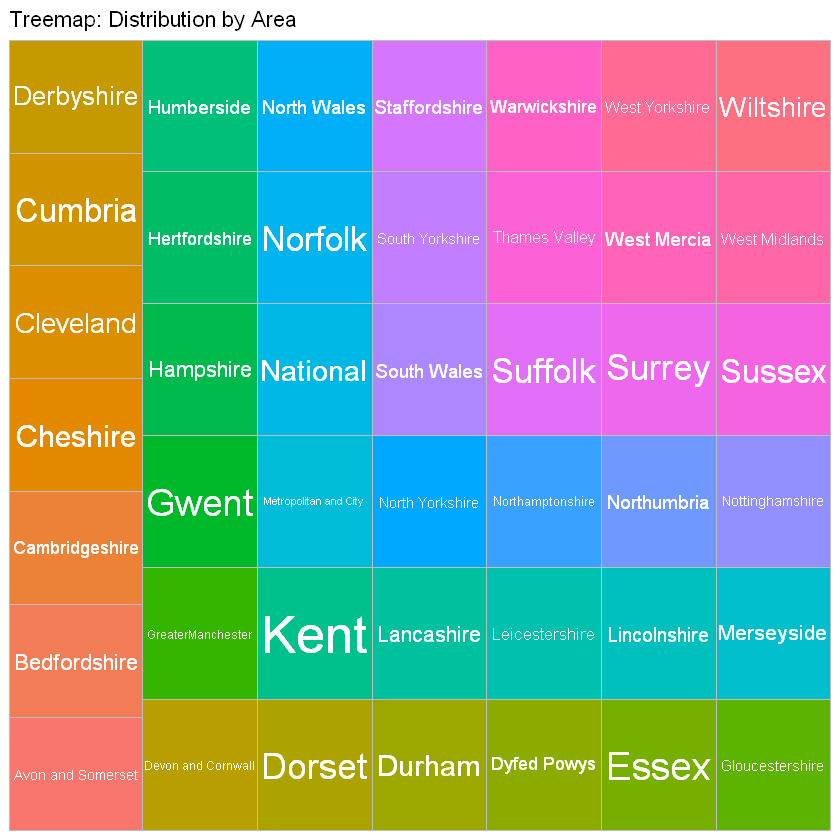

In [16]:
# Visualisation of categorical feature 'Areas'

library(treemapify)

data %>%
  count(Areas) %>%
  ggplot(aes(area = n, fill = Areas, label = Areas)) +
  geom_treemap() +
  geom_treemap_text(colour = "white", place = "centre", grow = TRUE) +
  labs(title = "Treemap: Distribution by Area") +
  theme(legend.position = "none")

## 1.2 Handling missing values

In [17]:
# Total missing values

sum(is.na(data))

[1] 607

In [18]:
# Missing values per column

# Show columns with missing values in a readable format
na_summary <- colSums(is.na(data))
na_summary <- na_summary[na_summary > 0]

# Print one column at a time
for (col in names(na_summary)) {
  cat(paste0("Column: ", col, " | Missing values: ", na_summary[col], "\n"))
}

Column: percentage_of_homicide_convictions | Missing values: 302
Column: percentage_of_homicide_unsuccessful | Missing values: 302
Column: percentage_of_l_motoring_offences_unsuccessful | Missing values: 3


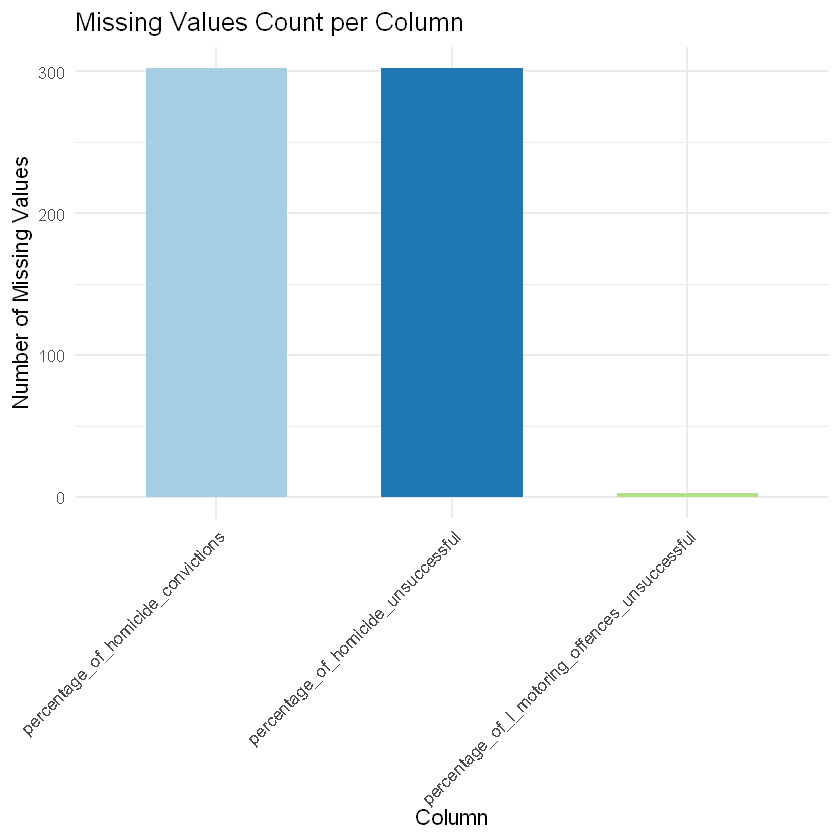

In [19]:
# Visualization of missing values

# Calculate missing value counts for all columns
missing_df <- data %>%
  summarise(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(everything(), names_to = "column", values_to = "missing_count") %>%
  filter(missing_count > 0)  # Only include columns with missing values

# Plot
ggplot(missing_df, aes(x = reorder(column, -missing_count), y = missing_count, fill = column)) +
  geom_bar(stat = "identity", width = 0.6) +
  labs(
    title = "Missing Values Count per Column",
    x = "Column",
    y = "Number of Missing Values"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none"
  ) +
  scale_fill_brewer(palette = "Paired")


In [20]:
# Handling missing values

# Impute missing values in percentage_of_l_motoring_offences_unsuccessful using median
median_val <- median(data$percentage_of_l_motoring_offences_unsuccessful, na.rm = TRUE)

data$percentage_of_l_motoring_offences_unsuccessful[
  is.na(data$percentage_of_l_motoring_offences_unsuccessful)
] <- median_val

In [21]:
# Check how many rows have NA in the count columns
sum(is.na(data$number_of_homicide_convictions))
sum(is.na(data$number_of_homicide_unsuccessful))

# Check how many rows have both conviction and unsuccessful as NA
sum(is.na(data$number_of_homicide_convictions) & is.na(data$number_of_homicide_unsuccessful))

# Check how many rows have total = 0
sum((data$number_of_homicide_convictions + data$number_of_homicide_unsuccessful) == 0, na.rm = TRUE)


[1] 0

[1] 0

[1] 0

[1] 302

In [22]:
# Fill missing percentage_of_homicide_convictions and unsuccessful

# Replace NA with 0 only for specific percentage columns
data <- data %>%
  mutate(across(
    c("percentage_of_homicide_convictions", "percentage_of_homicide_unsuccessful"),
    ~ replace_na(., 0)
  ))

In [23]:
colSums(is.na(data[, c("percentage_of_homicide_convictions", "percentage_of_homicide_unsuccessful")]))
colSums(is.na(data[, c("percentage_of_l_motoring_offences_unsuccessful")]))

percentage_of_homicide_convictions percentage_of_homicide_unsuccessful 
                                  0                                   0

percentage_of_l_motoring_offences_unsuccessful 
                                             0

In [24]:
data_time <- data # for later time based analysis

## 1.3 Outlier Detection


Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths


Warning message:
"package 'repr' was built under R version 4.4.3"


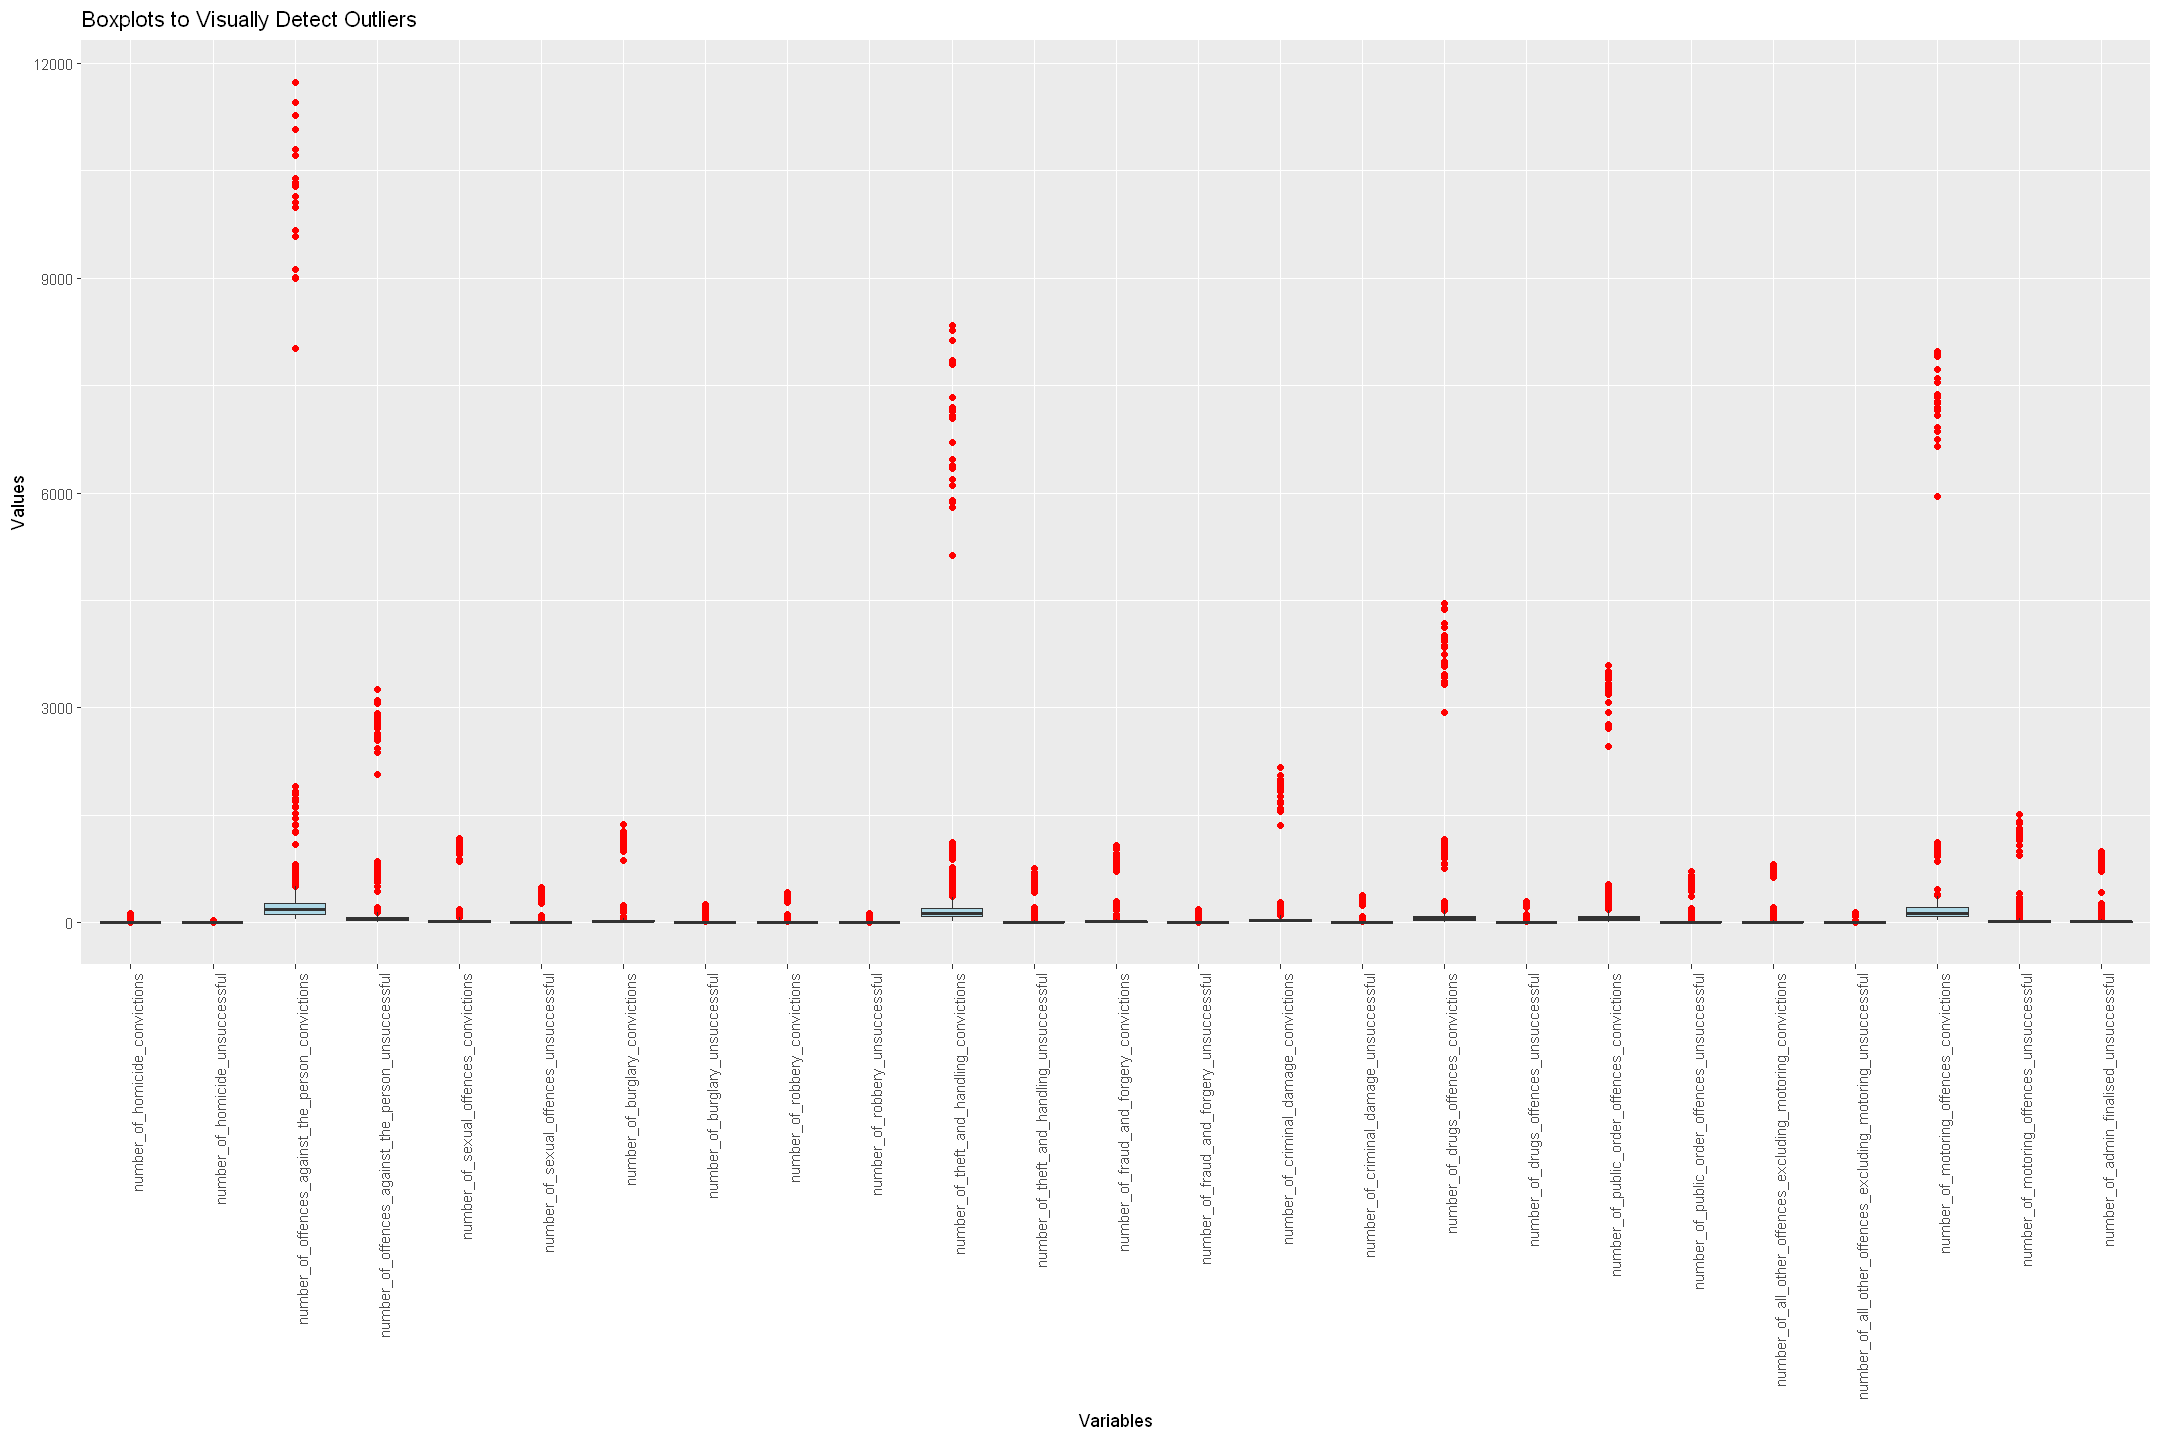

In [25]:
# Barplot visualization of all numeric features

# Load required libraries
library(ggplot2)
library(reshape2)
library(dplyr)
library(repr)

# Select numeric columns
numeric_data <- data %>%
  select(where(is.numeric)) %>%
  select(-contains("percentage"))

# Melt data for plotting
melted_numeric <- melt(numeric_data,id.vars = NULL)

# Set desired plot size 
options(repr.plot.width = 18, repr.plot.height = 12)

# Boxplot to visually detect outliers
ggplot(melted_numeric, aes(x = variable, y = value)) +
  geom_boxplot(outlier.colour = "red", outlier.shape = 16, fill = "lightblue") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Boxplots to Visually Detect Outliers", x = "Variables", y = "Values")


In [26]:
# Outlier Detection

library(knitr)
# Function to detect number of outliers using IQR
detect_outliers_iqr <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR_value
  upper_bound <- Q3 + 1.5 * IQR_value
  sum(x < lower_bound | x > upper_bound, na.rm = TRUE)
}

# Apply the function to all numeric columns
outlier_counts <- sapply(numeric_data, detect_outliers_iqr)

# Create a clean data frame and remove row names
outlier_df <- data.frame(
  Variable = names(outlier_counts),
  Outlier_Count = as.vector(outlier_counts),
  row.names = NULL
)

# Display sorted result
outlier <- outlier_df[order(-outlier_df$Outlier_Count), ]
rownames(outlier) <- NULL
print(outlier)

Warning message:
"package 'knitr' was built under R version 4.4.3"


                                                       Variable Outlier_Count
1                                 number_of_robbery_convictions           107
2                  number_of_public_order_offences_unsuccessful           106
3                          number_of_drugs_offences_convictions           105
4   number_of_all_other_offences_excluding_motoring_convictions           104
5                     number_of_theft_and_handling_unsuccessful            98
6                        number_of_sexual_offences_unsuccessful            96
7  number_of_all_other_offences_excluding_motoring_unsuccessful            95
8             number_of_offences_against_the_person_convictions            93
9                               number_of_burglary_unsuccessful            93
10                       number_of_admin_finalised_unsuccessful            93
11                      number_of_fraud_and_forgery_convictions            88
12                     number_of_fraud_and_forgery_unsuccessful 

## 1.4 Skewness Transformation

Warning message:
"package 'e1071' was built under R version 4.4.3"


# A tibble: 25 × 2
   Variable                                          Skewness
   <chr>                                                <dbl>
 1 number_of_theft_and_handling_convictions              6.31
 2 number_of_homicide_convictions                        6.31
 3 number_of_criminal_damage_convictions                 6.26
 4 number_of_motoring_offences_convictions               6.20
 5 number_of_criminal_damage_unsuccessful                6.19
 6 number_of_public_order_offences_convictions           6.17
 7 number_of_offences_against_the_person_convictions     6.16
 8 number_of_burglary_convictions                        6.15
 9 number_of_burglary_unsuccessful                       6.13
10 number_of_sexual_offences_convictions                 6.10
# ℹ 15 more rows


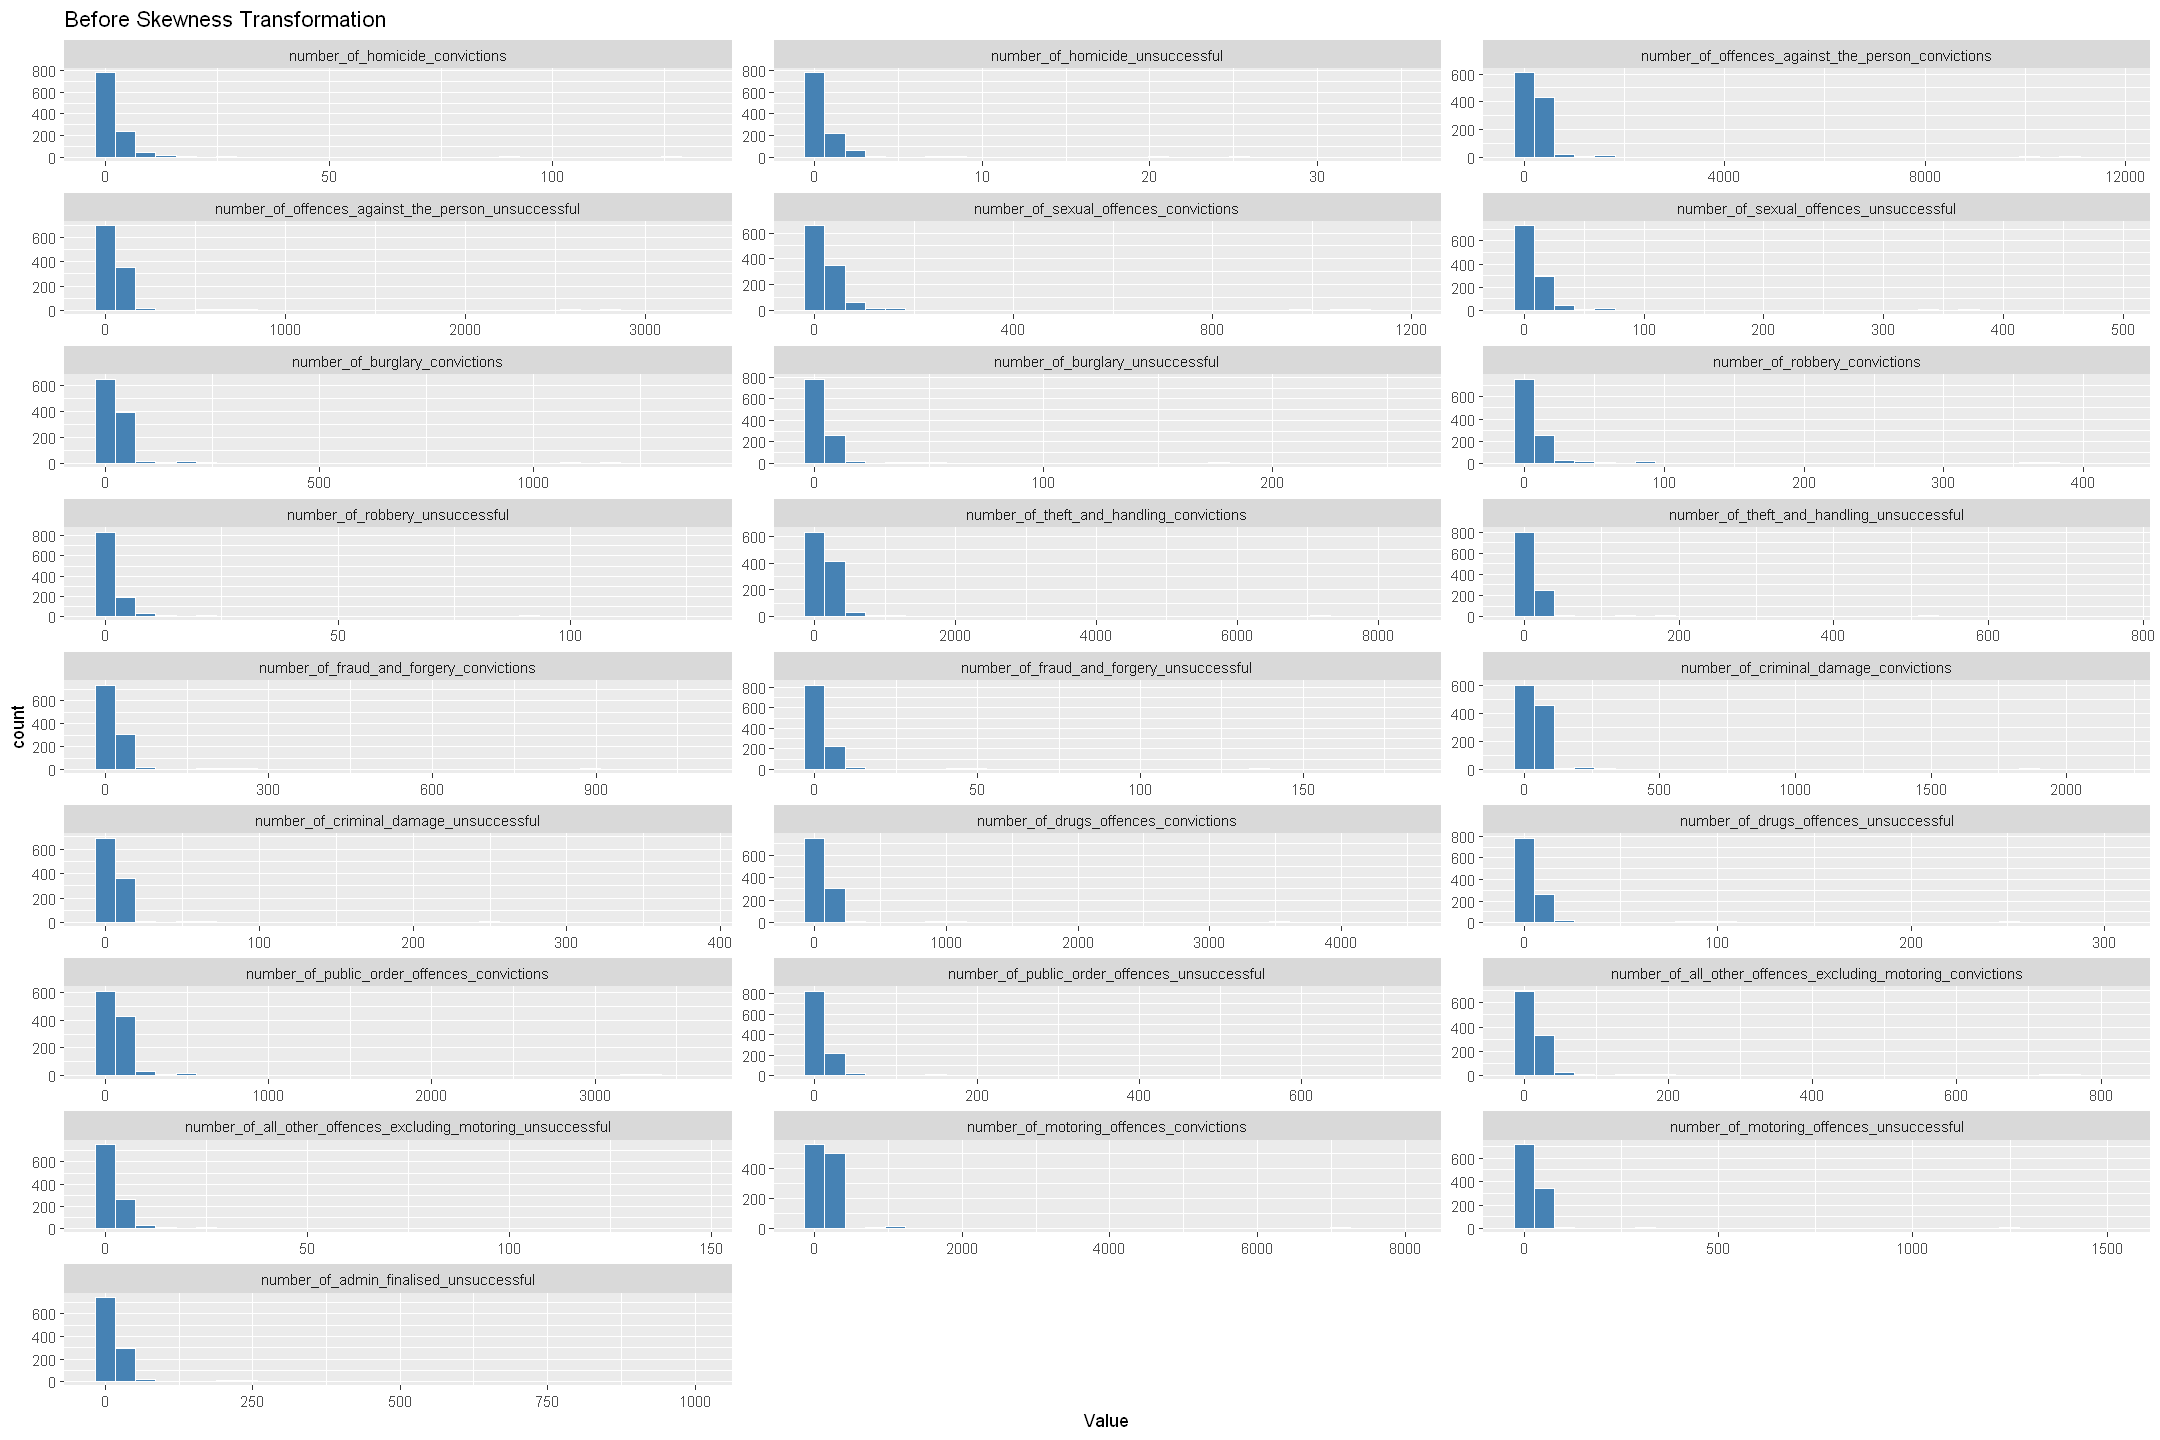

In [27]:
# Skewness before transformation

library(e1071)
library(tibble)

# Select only numeric columns (excluding percentages)
numeric_data <- data %>%
  select(where(is.numeric)) %>%
  select(-contains("percentage"))

# Calculate skewness
skew_vals <- sapply(numeric_data, function(x) skewness(x, na.rm = TRUE))
skew_df <- tibble(
  Variable = names(skew_vals),
  Skewness = skew_vals
)

# Print sorted skewness (absolute value descending), with clean output
print(skew_df[order(-abs(skew_df$Skewness)), ], row.names = FALSE)

# Visualise original distributions
melted_original <- melt(numeric_data, variable.name = "Variable", value.name = "Value", id.vars = NULL)

ggplot(melted_original, aes(x = Value)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "white") +
  facet_wrap(~Variable, scales = "free", ncol = 3) +
  ggtitle("Before Skewness Transformation")

In [28]:
# Applying Skewness Transformation

# Apply log1p (log(x + 1)) to avoid issues with zeros
numeric_data_transformed <- numeric_data %>%
  mutate(across(everything(), ~ log1p(.)))


data[names(numeric_data_transformed)] <- numeric_data_transformed


# A tibble: 25 × 2
   Variable                                           Skewness
   <chr>                                                 <dbl>
 1 number_of_homicide_unsuccessful                        2.61
 2 number_of_motoring_offences_convictions                2.56
 3 number_of_offences_against_the_person_convictions      2.23
 4 number_of_criminal_damage_convictions                  2.09
 5 number_of_theft_and_handling_convictions               2.03
 6 number_of_drugs_offences_convictions                   1.87
 7 number_of_offences_against_the_person_unsuccessful     1.79
 8 number_of_public_order_offences_convictions            1.77
 9 number_of_robbery_unsuccessful                         1.69
10 number_of_fraud_and_forgery_convictions                1.66
# ℹ 15 more rows


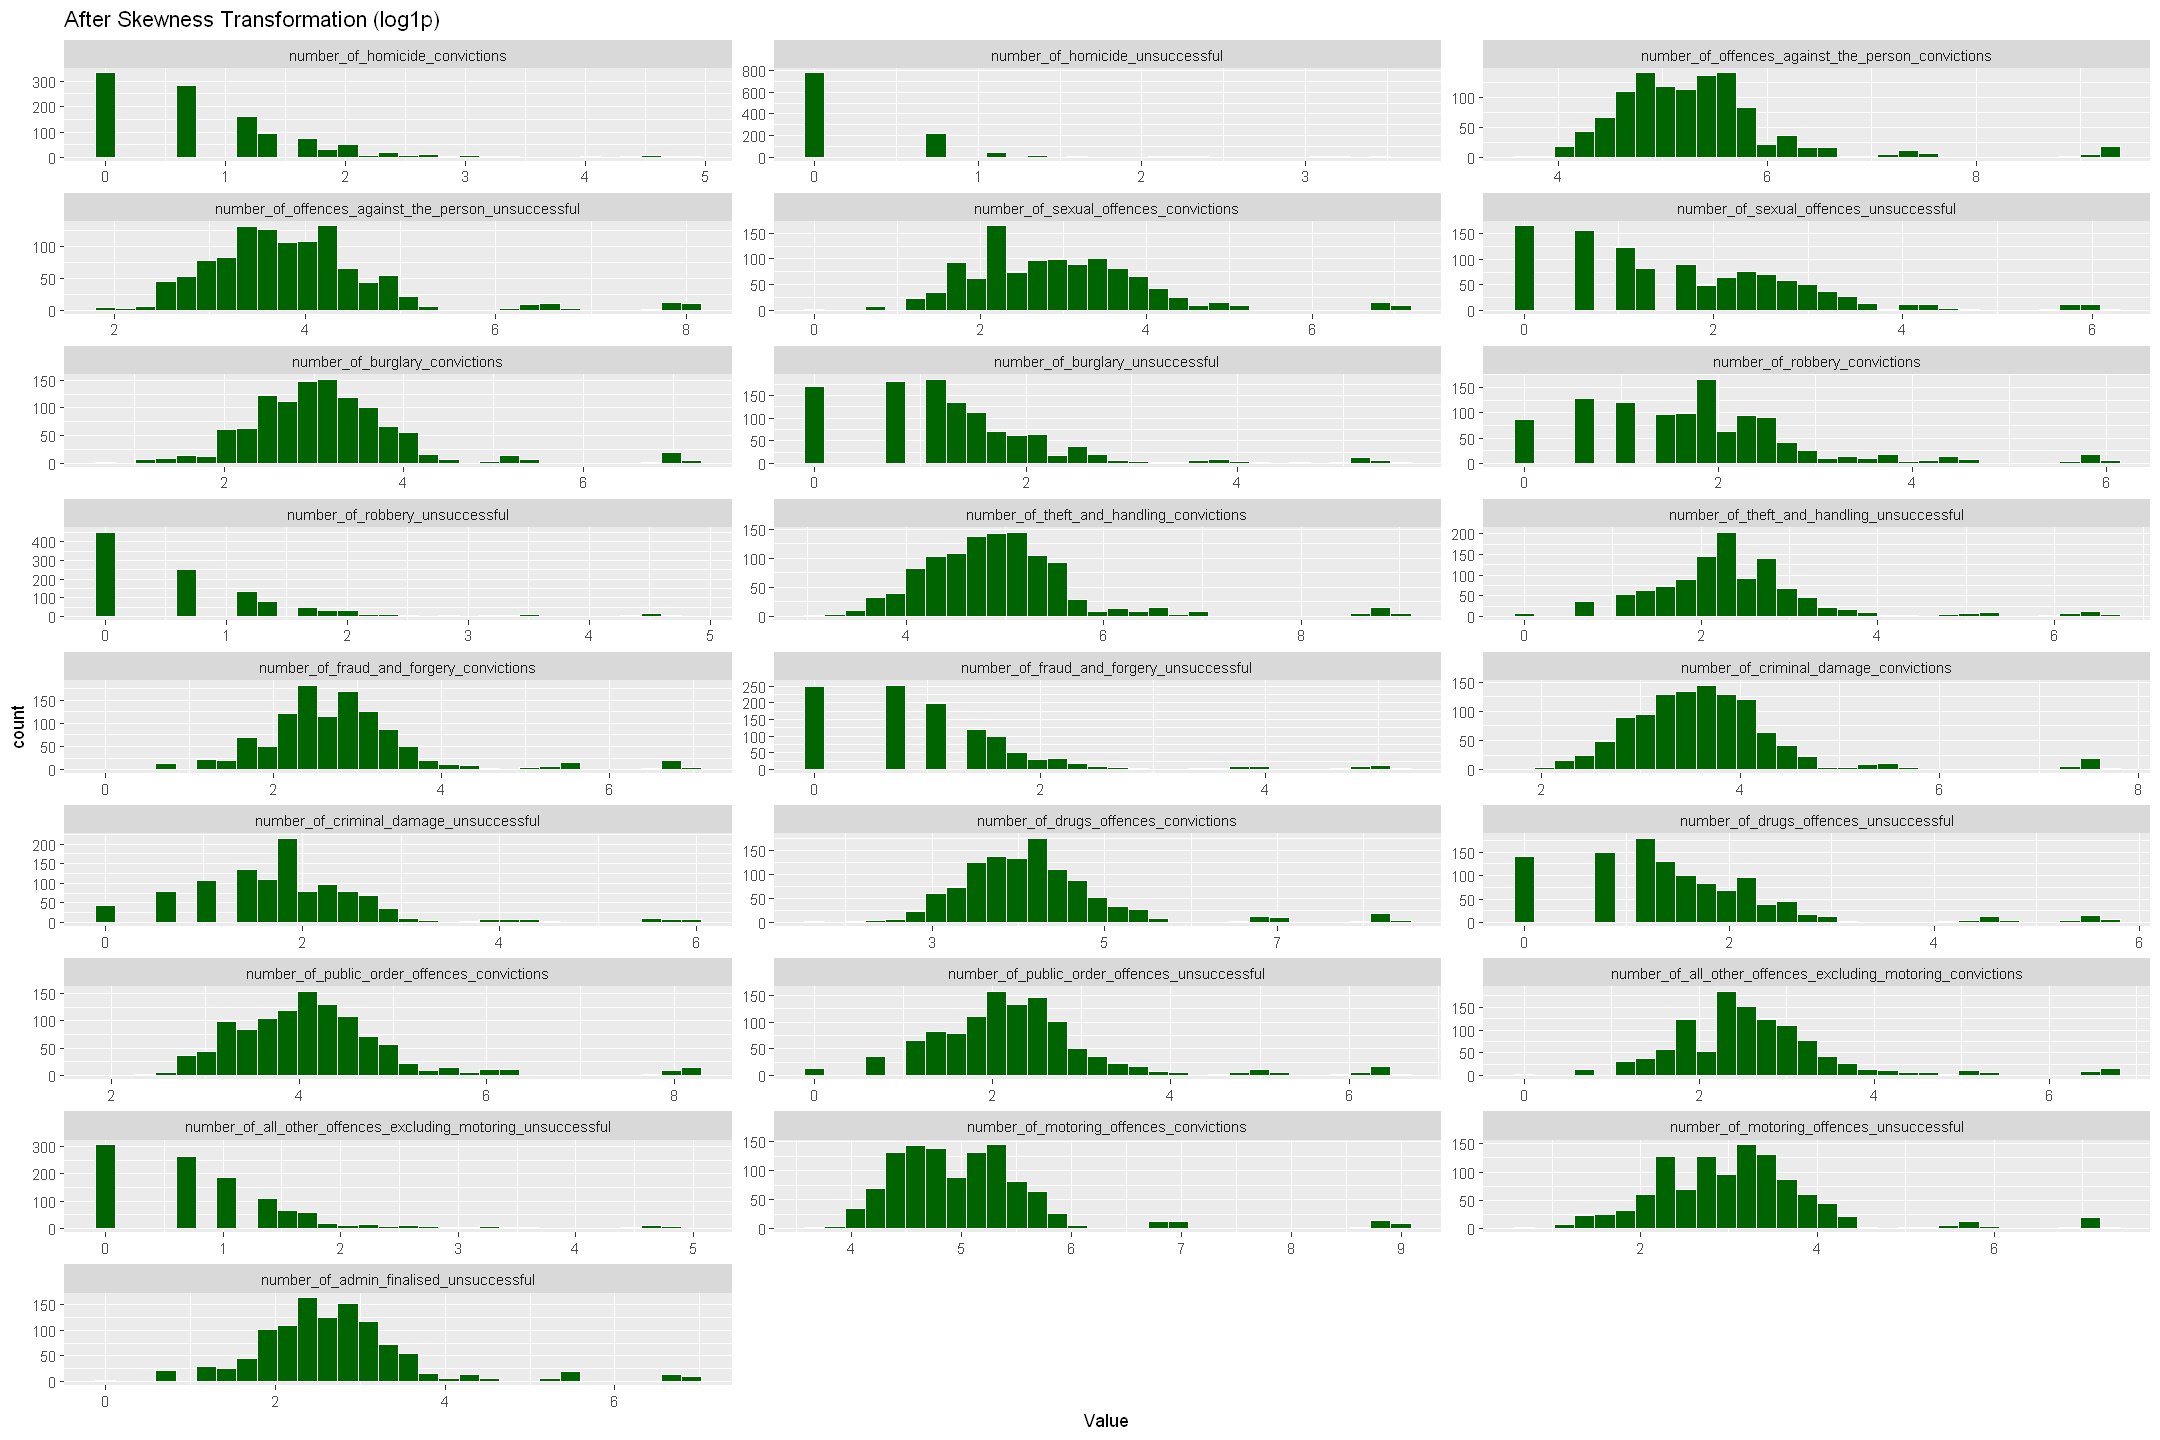

In [29]:
# Skewness after transformation

# Recalculate skewness
skew_after <- sapply(numeric_data_transformed, function(x) skewness(x, na.rm = TRUE))
skew_df_after <- tibble(
  Variable = names(skew_after),
  Skewness = skew_after
)

# Print sorted skewness (absolute value descending), with clean output
print(skew_df_after[order(-abs(skew_df_after$Skewness)), ], row.names = FALSE)

# Visualise transformed distributions
melted_transformed <- melt(numeric_data_transformed, variable.name = "Variable", value.name = "Value", id.vars = NULL)

ggplot(melted_transformed, aes(x = Value)) +
  geom_histogram(bins = 30, fill = "darkgreen", color = "white") +
  facet_wrap(~Variable, scales = "free", ncol = 3) +
  ggtitle("After Skewness Transformation (log1p)")

## 1.5 Encoding and Scaling

In [30]:
# Label Encoding  

library(caret)

#  Label encode categorical columns

categorical_cols <- data %>% select(where(is.character)) %>% colnames()

# Copy original data into a new data frame
encoded_data <- data

# Apply label encoding using factor levels
for (col in categorical_cols) {
  encoded_data[[col]] <- as.numeric(as.factor(encoded_data[[col]]))
}
print("Encoding completed")

Warning message:
"package 'caret' was built under R version 4.4.3"
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




[1] "Encoding completed"


In [31]:
# Feature Scaling

#  Scale numeric columns
numeric_cols <- data %>%
  select(where(is.numeric)) %>%
  select(-contains("percentage"))

# Copy original data into a new data frame
scaled_data <- data

# Apply standard scaling: mean = 0, sd = 1
scaled_numeric <- scale(numeric_cols)

# Replace scaled values into the dataset
scaled_data[names(numeric_cols)] <- scaled_numeric
print("Scaling completed")

[1] "Scaling completed"


## Feature Engineering

In [32]:
# Feature engineering

# Define column groups based on patterns
conviction_count_cols <- grep("number_of_.*_convictions$", names(data), value = TRUE)
unsuccessful_count_cols <- grep("number_of_.*_unsuccessful$", names(data), value = TRUE)
conviction_percent_cols <- grep("percentage_of_.*_convictions$", names(data), value = TRUE)
unsuccessful_percent_cols <- grep("percentage_of_.*_unsuccessful$", names(data), value = TRUE)

# Create aggregate features
data_featured <- data %>%
  select(-source_file) %>%
  mutate(
    total_conviction_count = rowSums(across(all_of(conviction_count_cols)), na.rm = TRUE),
    total_unsuccessful_count = rowSums(across(all_of(unsuccessful_count_cols)), na.rm = TRUE),
    total_crime_cases = total_conviction_count + total_unsuccessful_count,
    total_conviction_percent = rowMeans(across(all_of(conviction_percent_cols)), na.rm = TRUE),
    total_unsuccessful_percent = rowMeans(across(all_of(unsuccessful_percent_cols)), na.rm = TRUE),
    conviction_rate = ifelse(total_crime_cases == 0, NA, total_conviction_count / total_crime_cases)
  )

In [33]:
# After adding engineered feature

colnames(data_featured)

[1] "Areas"                                                           
 [2] "number_of_homicide_convictions"                                  
 [3] "percentage_of_homicide_convictions"                              
 [4] "number_of_homicide_unsuccessful"                                 
 [5] "percentage_of_homicide_unsuccessful"                             
 [6] "number_of_offences_against_the_person_convictions"               
 [7] "percentage_of_offences_against_the_person_convictions"           
 [8] "number_of_offences_against_the_person_unsuccessful"              
 [9] "percentage_of_offences_against_the_person_unsuccessful"          
[10] "number_of_sexual_offences_convictions"                           
[11] "percentage_of_sexual_offences_convictions"                       
[12] "number_of_sexual_offences_unsuccessful"                          
[13] "percentage_of_sexual_offences_unsuccessful"                      
[14] "number_of_burglary_convictions"                                  
[15] "percentage_of_burglary_convictions"                              
[16] "number_of_burglary_unsuccessful"                                 
[17] "percentage_of_burglary_unsuccessful"                             
[18] "number_of_robbery_convictions"                                   
[19] "percentage_of_robbery_convictions"                               
[20] "number_of_robbery_unsuccessful"                                  
[21] "percentage_of_robbery_unsuccessful"                              
[22] "number_of_theft_and_handling_convictions"                        
[23] "percentage_of_theft_and_handling_convictions"                    
[24] "number_of_theft_and_handling_unsuccessful"                       
[25] "percentage_of_theft_and_handling_unsuccessful"                   
[26] "number_of_fraud_and_forgery_convictions"                         
[27] "percentage_of_fraud_and_forgery_convictions"                     
[28] "number_of_fraud_and_forgery_unsuccessful"                        
[29] "percentage_of_fraud_and_forgery_unsuccessful"                    
[30] "number_of_criminal_damage_convictions"                           
[31] "percentage_of_criminal_damage_convictions"                       
[32] "number_of_criminal_damage_unsuccessful"                          
[33] "percentage_of_criminal_damage_unsuccessful"                      
[34] "number_of_drugs_offences_convictions"                            
[35] "percentage_of_drugs_offences_convictions"                        
[36] "number_of_drugs_offences_unsuccessful"                           
[37] "percentage_of_drugs_offences_unsuccessful"                       
[38] "number_of_public_order_offences_convictions"                     
[39] "percentage_of_public_order_offences_convictions"                 
[40] "number_of_public_order_offences_unsuccessful"                    
[41] "percentage_of_public_order_offences_unsuccessful"                
[42] "number_of_all_other_offences_excluding_motoring_convictions"     
[43] "percentage_of_all_other_offences_excluding_motoring_convictions" 
[44] "number_of_all_other_offences_excluding_motoring_unsuccessful"    
[45] "percentage_of_all_other_offences_excluding_motoring_unsuccessful"
[46] "number_of_motoring_offences_convictions"                         
[47] "percentage_of_motoring_offences_convictions"                     
[48] "number_of_motoring_offences_unsuccessful"                        
[49] "percentage_of_motoring_offences_unsuccessful"                    
[50] "number_of_admin_finalised_unsuccessful"                          
[51] "percentage_of_l_motoring_offences_unsuccessful"                  
[52] "total_conviction_count"                                          
[53] "total_unsuccessful_count"                                        
[54] "total_crime_cases"                                               
[55] "total_conviction_percent"                                        
[56] "total_unsuccessful_percent"        

### Time Analysis based Features

In [34]:
# Incorporating month and time features

data_month <- data_time %>%
  mutate(
    year = str_extract(source_file, "\\d{4}"),
    month = str_extract(source_file, "(?i)(jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)")
  ) %>%
  mutate(
    month = str_to_title(month),             # Capitalize first letter
    year = as.integer(year)
  )


In [35]:
# Combining data frame data_month (year and month columns) with data_featured

data_trend_analysis <- bind_cols(data_month, data_featured)

clean <- names(data_trend_analysis) %>%
  str_remove_all("\\.\\.\\.\\d+") %>%       # remove ...numbers
  str_remove_all("''") %>%                  # remove double apostrophes
  make.names(unique = TRUE)                 # ensure valid and unique column names

# Assign cleaned names back
names(data_trend_analysis) <- clean


New names:
• `Areas` -> `Areas...1`
• `number_of_homicide_convictions` -> `number_of_homicide_convictions...2`
• `percentage_of_homicide_convictions` ->
  `percentage_of_homicide_convictions...3`
• `number_of_homicide_unsuccessful` -> `number_of_homicide_unsuccessful...4`
• `percentage_of_homicide_unsuccessful` ->
  `percentage_of_homicide_unsuccessful...5`
• `number_of_offences_against_the_person_convictions` ->
  `number_of_offences_against_the_person_convictions...6`
• `percentage_of_offences_against_the_person_convictions` ->
  `percentage_of_offences_against_the_person_convictions...7`
• `number_of_offences_against_the_person_unsuccessful` ->
  `number_of_offences_against_the_person_unsuccessful...8`
• `percentage_of_offences_against_the_person_unsuccessful` ->
  `percentage_of_offences_against_the_person_unsuccessful...9`
• `number_of_sexual_offences_convictions` ->
  `number_of_sexual_offences_convictions...10`
• `percentage_of_sexual_offences_convictions` ->
  `percentage_of_se

## Task 2 Descriptive Analytics:

## 2.1 Feature Distributions

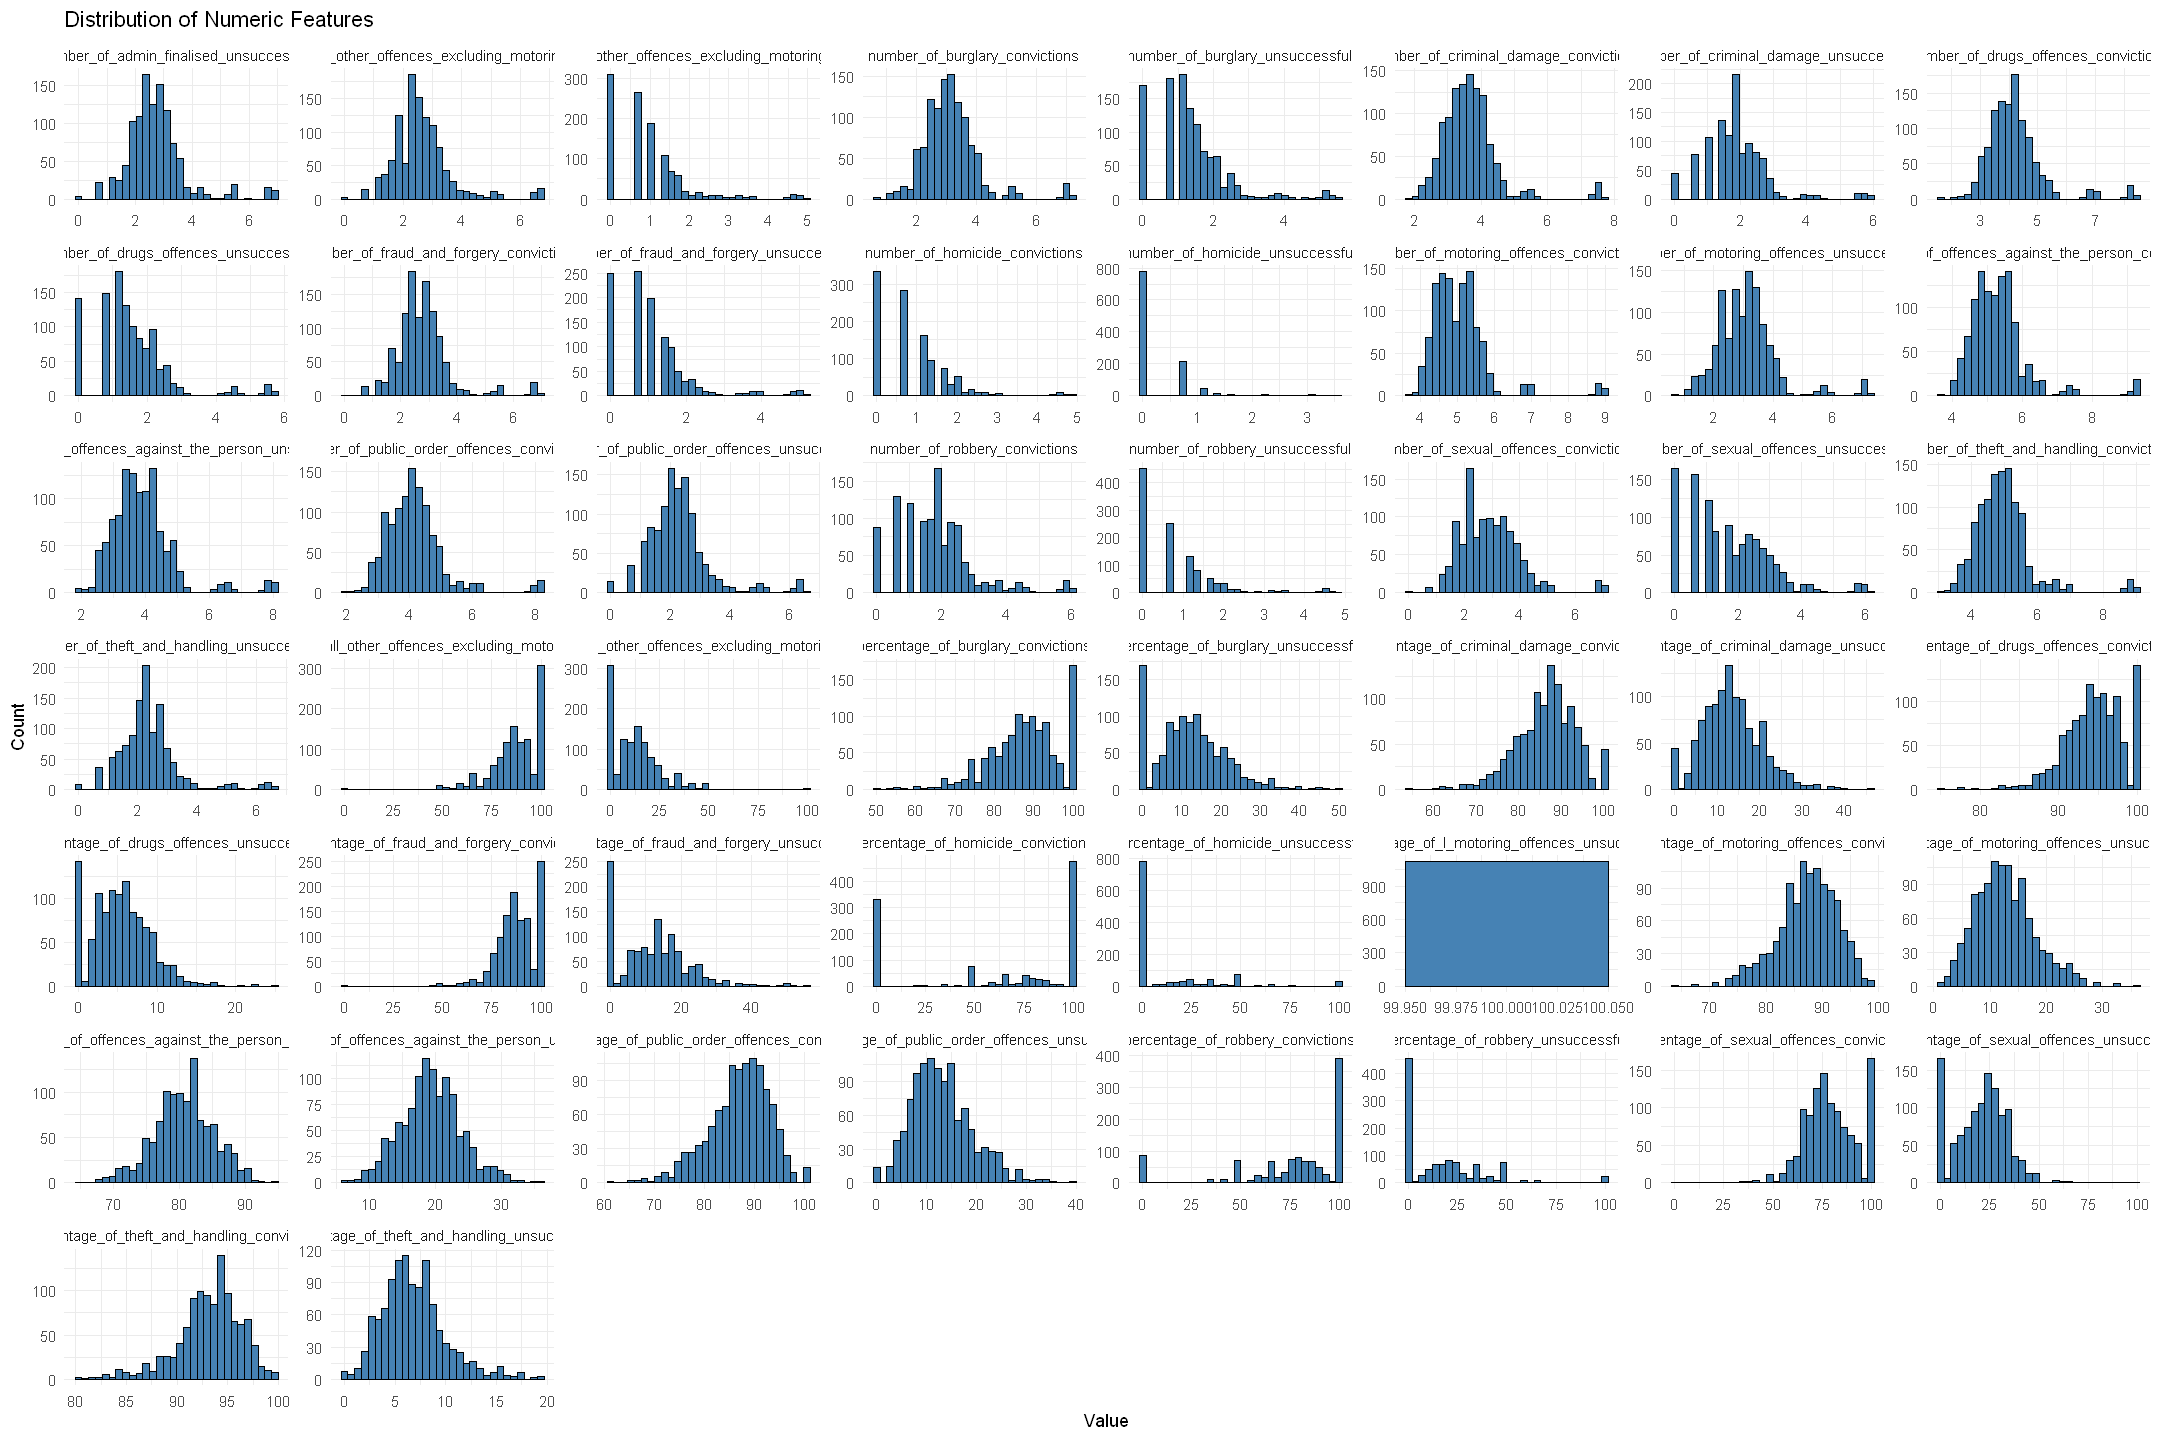

In [36]:
# Distribution of numeric features

# Load necessary libraries
library(ggplot2)
library(tidyr)
library(dplyr)

# Pivot to long format for ggplot2
data_long <- data %>%
  select(where(is.numeric)) %>%
  pivot_longer(cols = everything(), names_to = "Feature", values_to = "Value")

# Plot histograms for all numeric features
ggplot(data_long, aes(x = Value)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "black") +
  facet_wrap(~ Feature, scales = "free") +
  theme_minimal() +
  labs(title = "Distribution of Numeric Features", x = "Value", y = "Count")


`geom_smooth()` using formula = 'y ~ x'


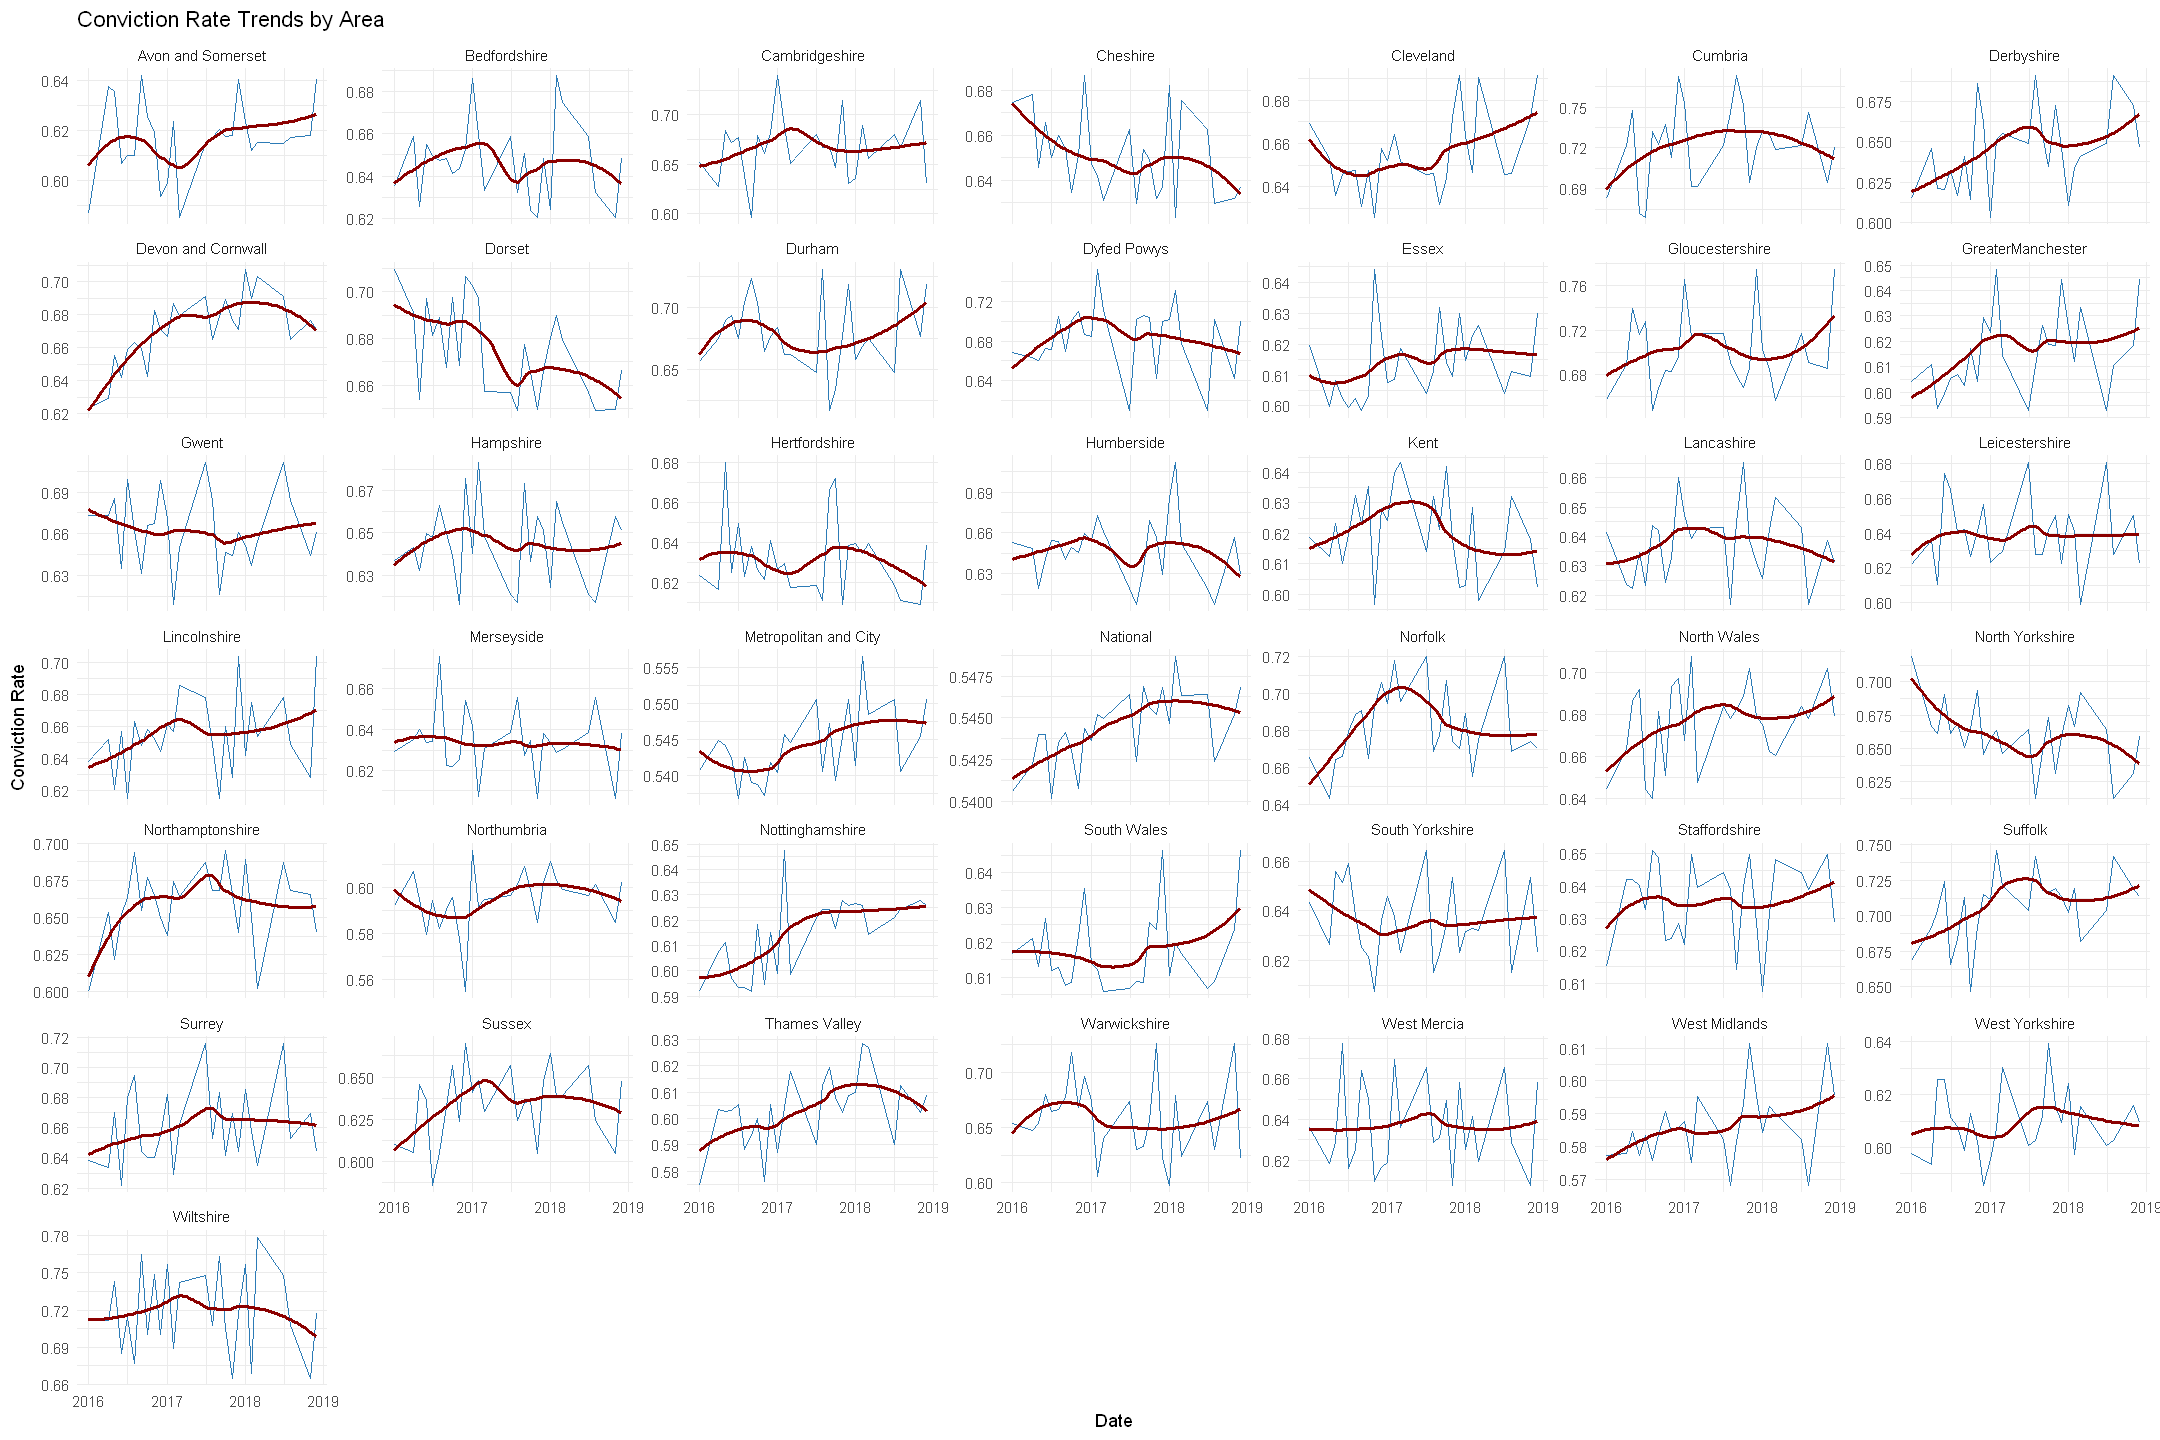

In [37]:
# Conviction rate trends over Area

# Clean month names and create a proper date column
time <- data_trend_analysis %>%
  mutate(
    month = str_trim(month),                         # Remove extra whitespace
    month_num = match(month, month.abb),             # Convert month to numeric
    date = as.Date(paste(year, month_num, "01", sep = "-")) # Create date column
  ) %>%
  filter(!is.na(date))                               # Drop invalid dates just in case

# Facet by area 
selected_areas <- time %>%
  group_by(`Areas`) %>%
  summarise(n = n()) %>%
  filter(n >= 5) %>%
  pull(`Areas`)

ggplot(filter(time, `Areas` %in% selected_areas),
       aes(x = date, y = conviction_rate)) +
  geom_line(color = "#2c7bb6") +
  geom_smooth(method = "loess", se = FALSE, color = "darkred") +
  facet_wrap(~`Areas`, scales = "free_y") +
  labs(title = "Conviction Rate Trends by Area",
       x = "Date", y = "Conviction Rate") +
  theme_minimal(base_size = 11)

## 2.2 Correlation Analysis

Warning message:
"package 'ggcorrplot' was built under R version 4.4.3"


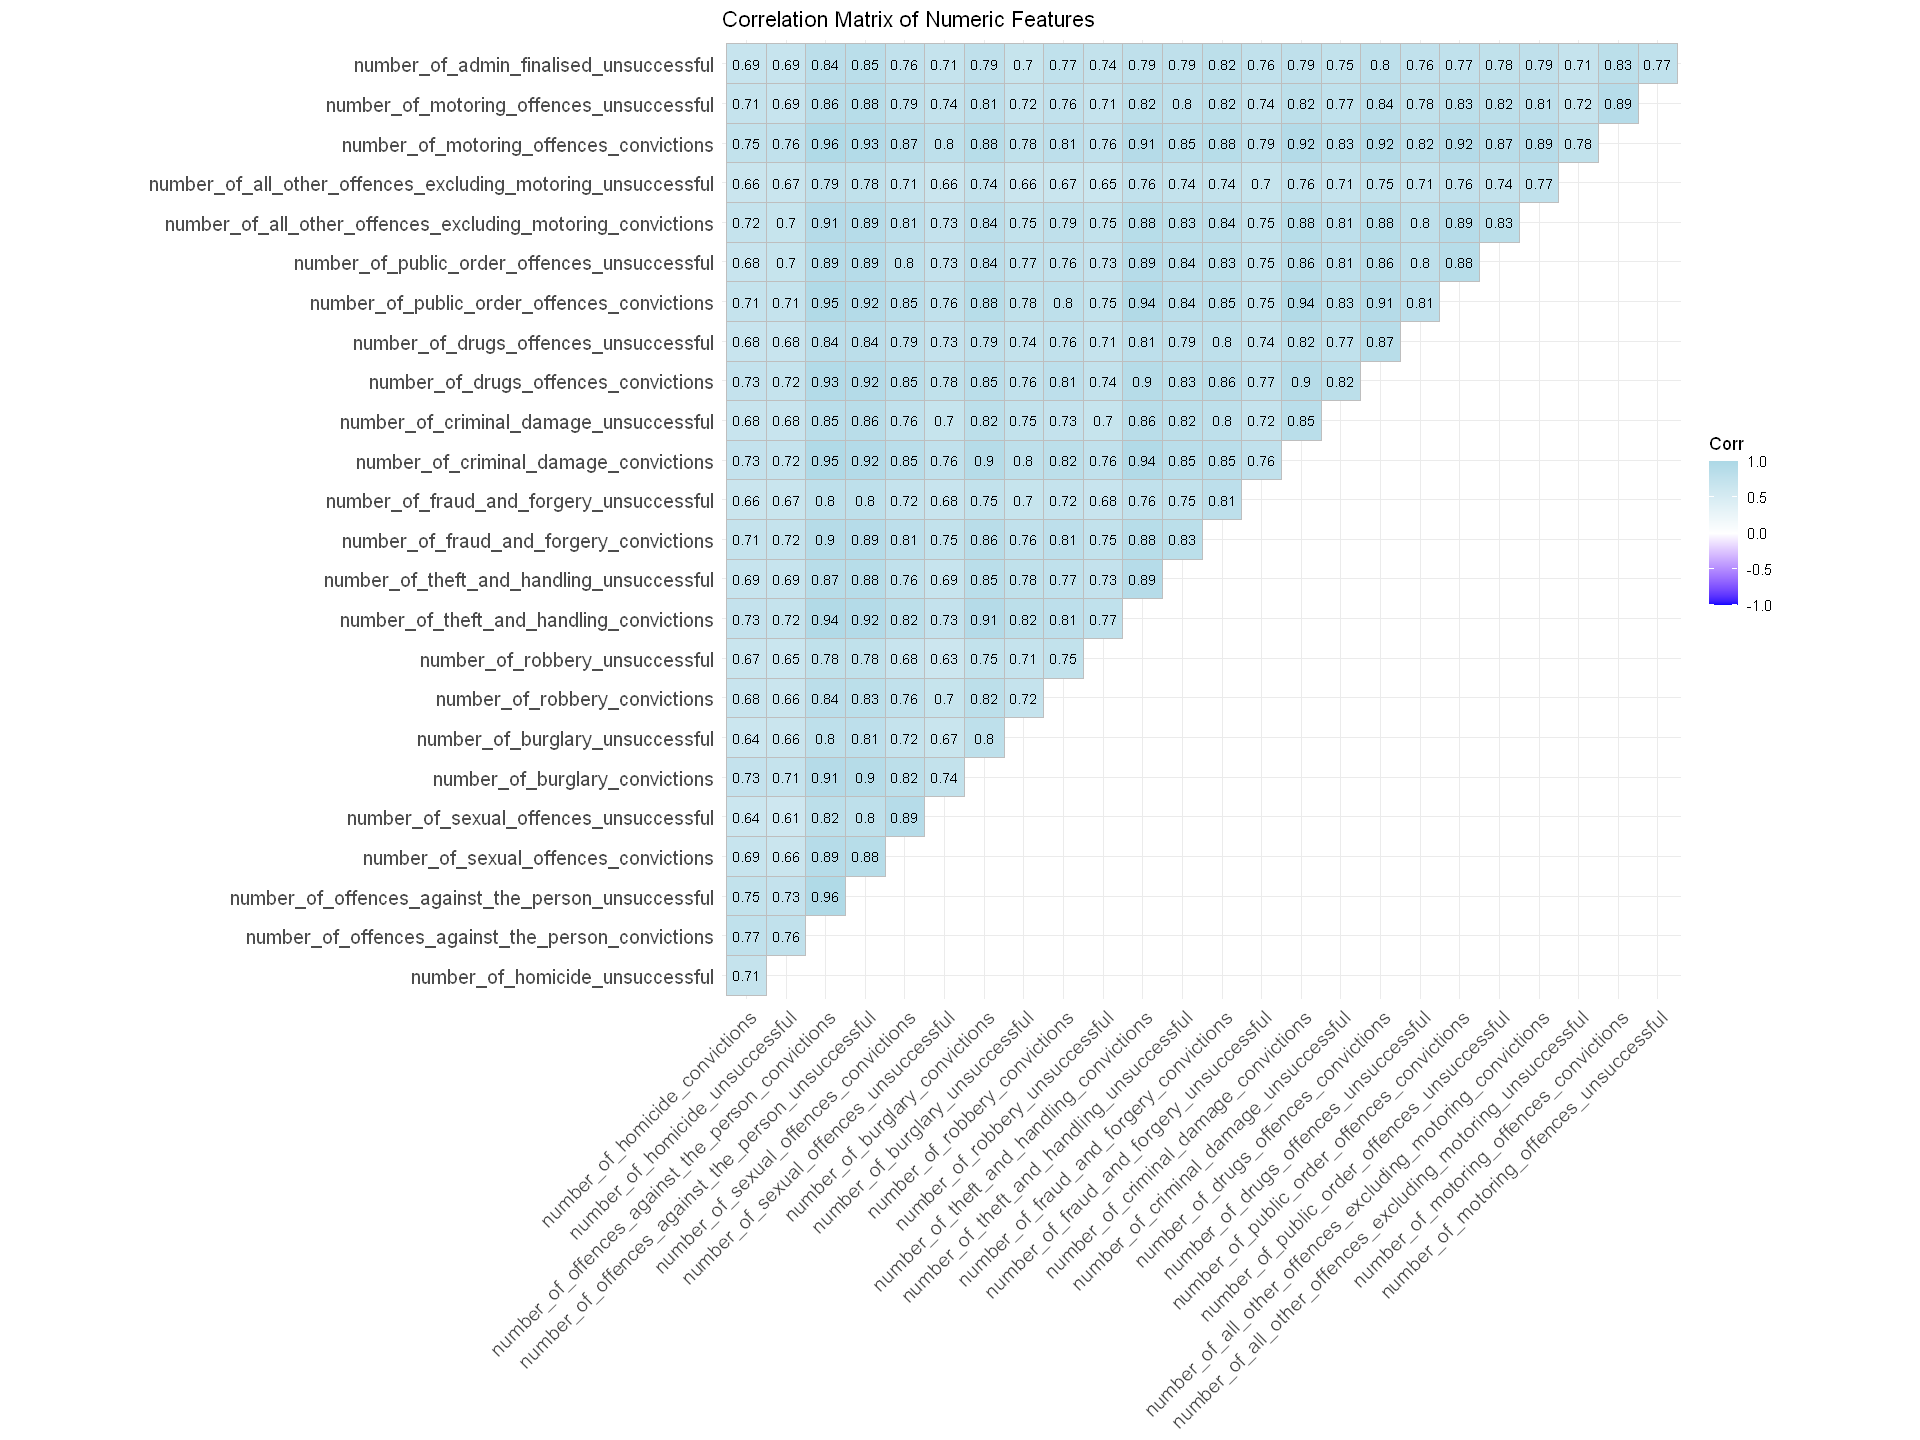

In [38]:
# Correlation Analysis

library(ggcorrplot)
library(repr)  # For plot size

# Set large plot dimensions 
options(repr.plot.width = 16, repr.plot.height = 12)

# Select numeric columns (excluding percentage columns)
numeric_cols <- scaled_data %>%
  select(where(is.numeric)) %>%
  select(-contains("percentage"))

# Compute correlation matrix
cor_matrix <- cor(numeric_cols, use = "complete.obs")

# Create the correlation heatmap
ggcorrplot(cor_matrix, 
           method = "square", 
           type = "upper", 
           lab = TRUE, 
           lab_size = 3, 
           colors = c("blue", "white", "light blue"),
           title = "Correlation Matrix of Numeric Features",
           ggtheme = ggplot2::theme_minimal())

In [39]:
# correlation matrix

# Display the matrix
print(cor_matrix)


                                                             number_of_homicide_convictions
number_of_homicide_convictions                                                    1.0000000
number_of_homicide_unsuccessful                                                   0.7114525
number_of_offences_against_the_person_convictions                                 0.7671352
number_of_offences_against_the_person_unsuccessful                                0.7532004
number_of_sexual_offences_convictions                                             0.6888961
number_of_sexual_offences_unsuccessful                                            0.6416598
number_of_burglary_convictions                                                    0.7264949
number_of_burglary_unsuccessful                                                   0.6415974
number_of_robbery_convictions                                                     0.6848834
number_of_robbery_unsuccessful                                                  

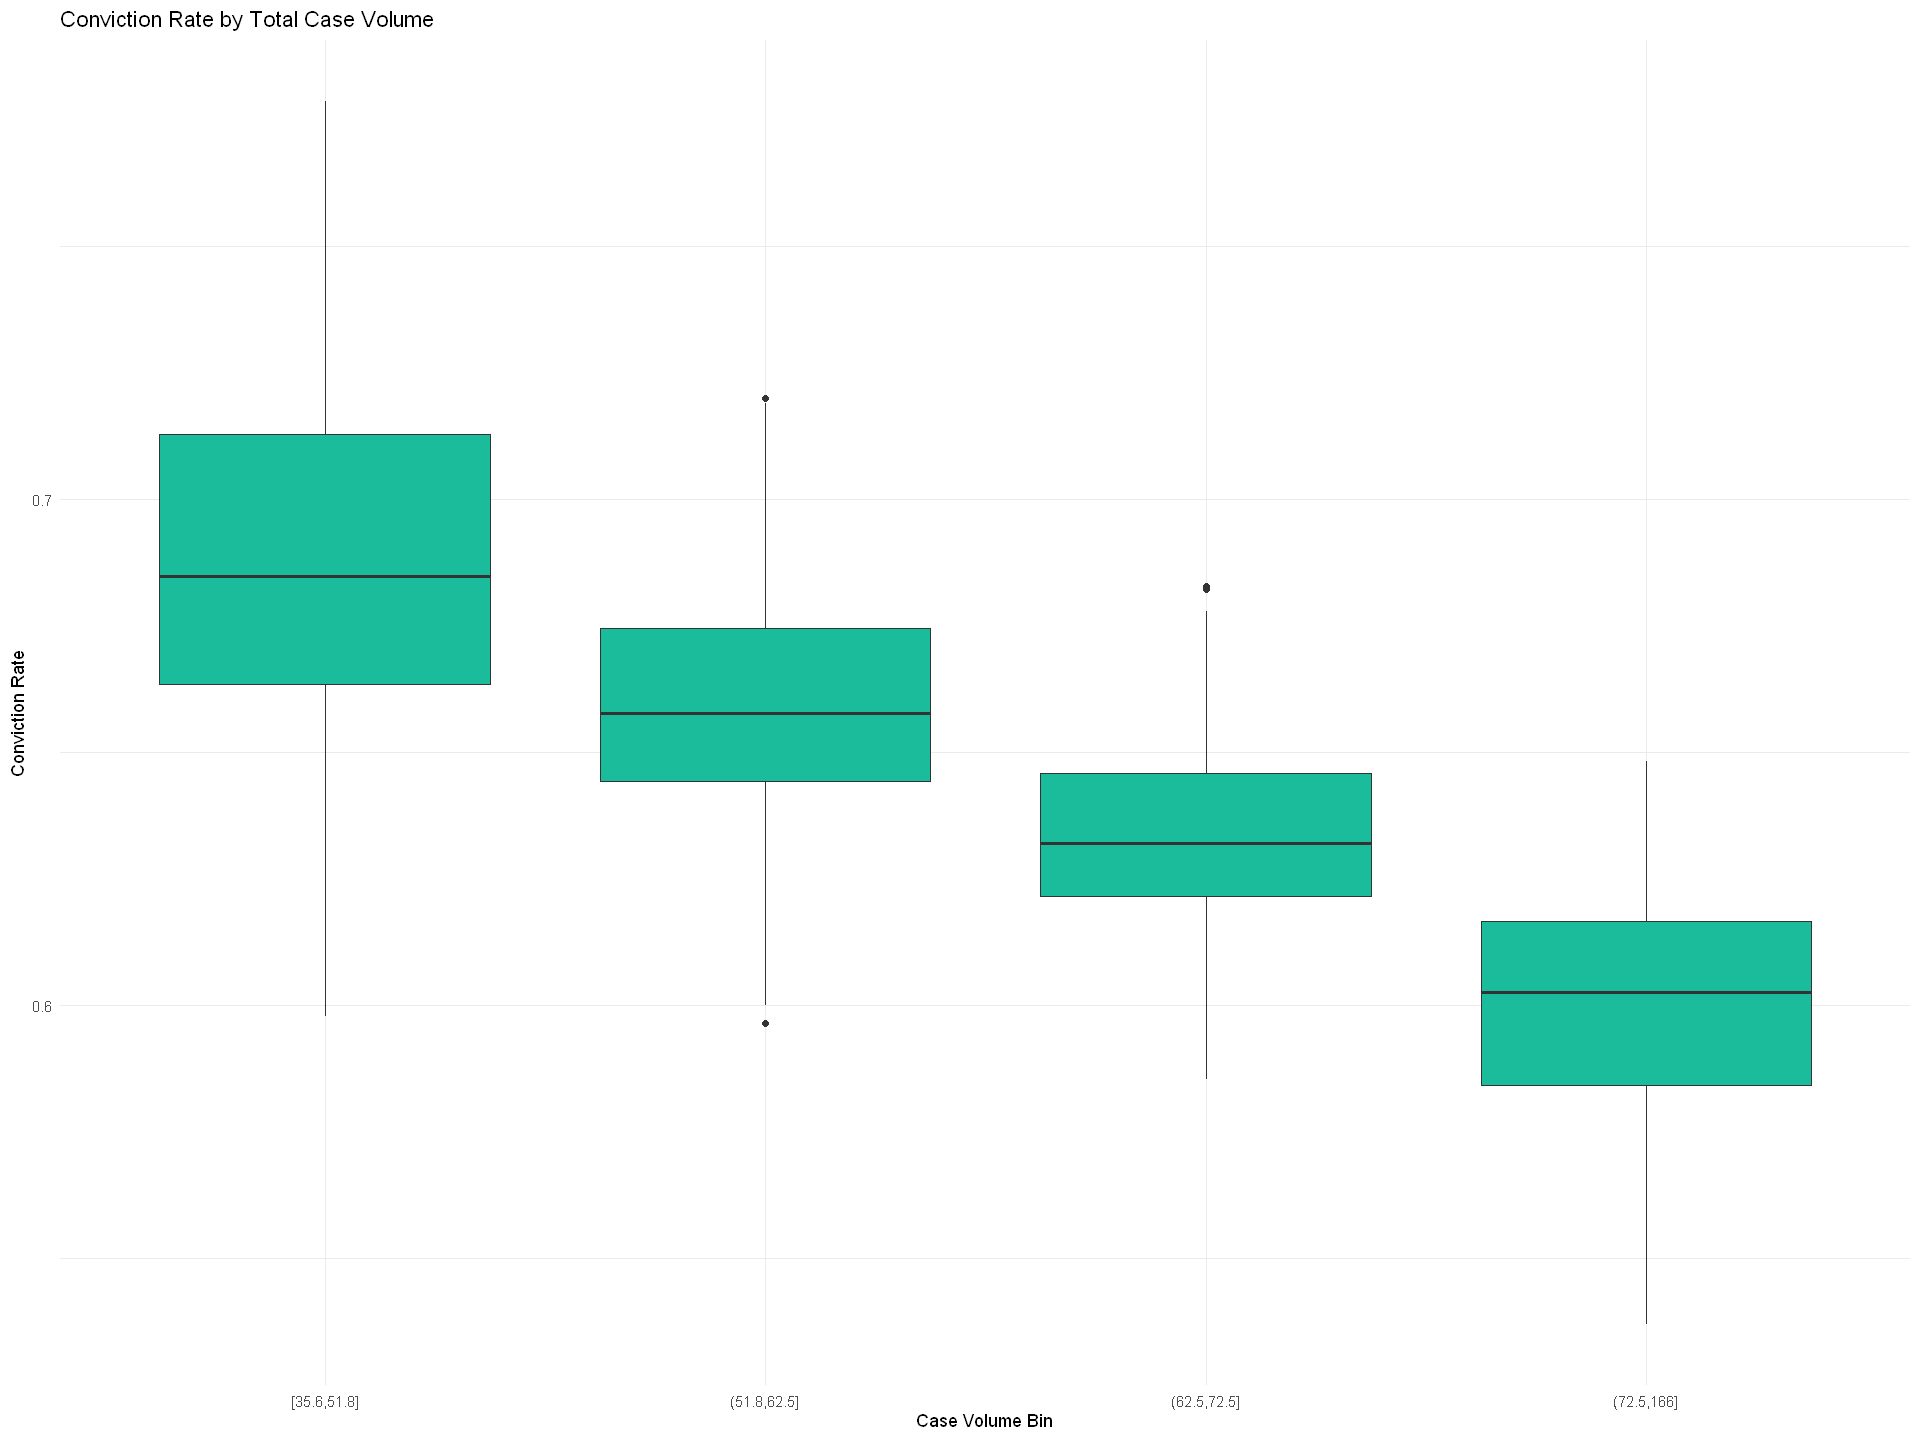

In [40]:
# Conviction Rate by Total Case Volume (Binned Boxplot)

data_volume <- data_featured %>%
  mutate(case_volume_bin = cut(total_crime_cases, breaks = quantile(total_crime_cases, probs = seq(0, 1, 0.25), na.rm = TRUE), include.lowest = TRUE))

ggplot(data_volume, aes(x = case_volume_bin, y = conviction_rate)) +
  geom_boxplot(fill = "#1ABC9C") +
  labs(title = "Conviction Rate by Total Case Volume",
       x = "Case Volume Bin", y = "Conviction Rate") +
  theme_minimal()

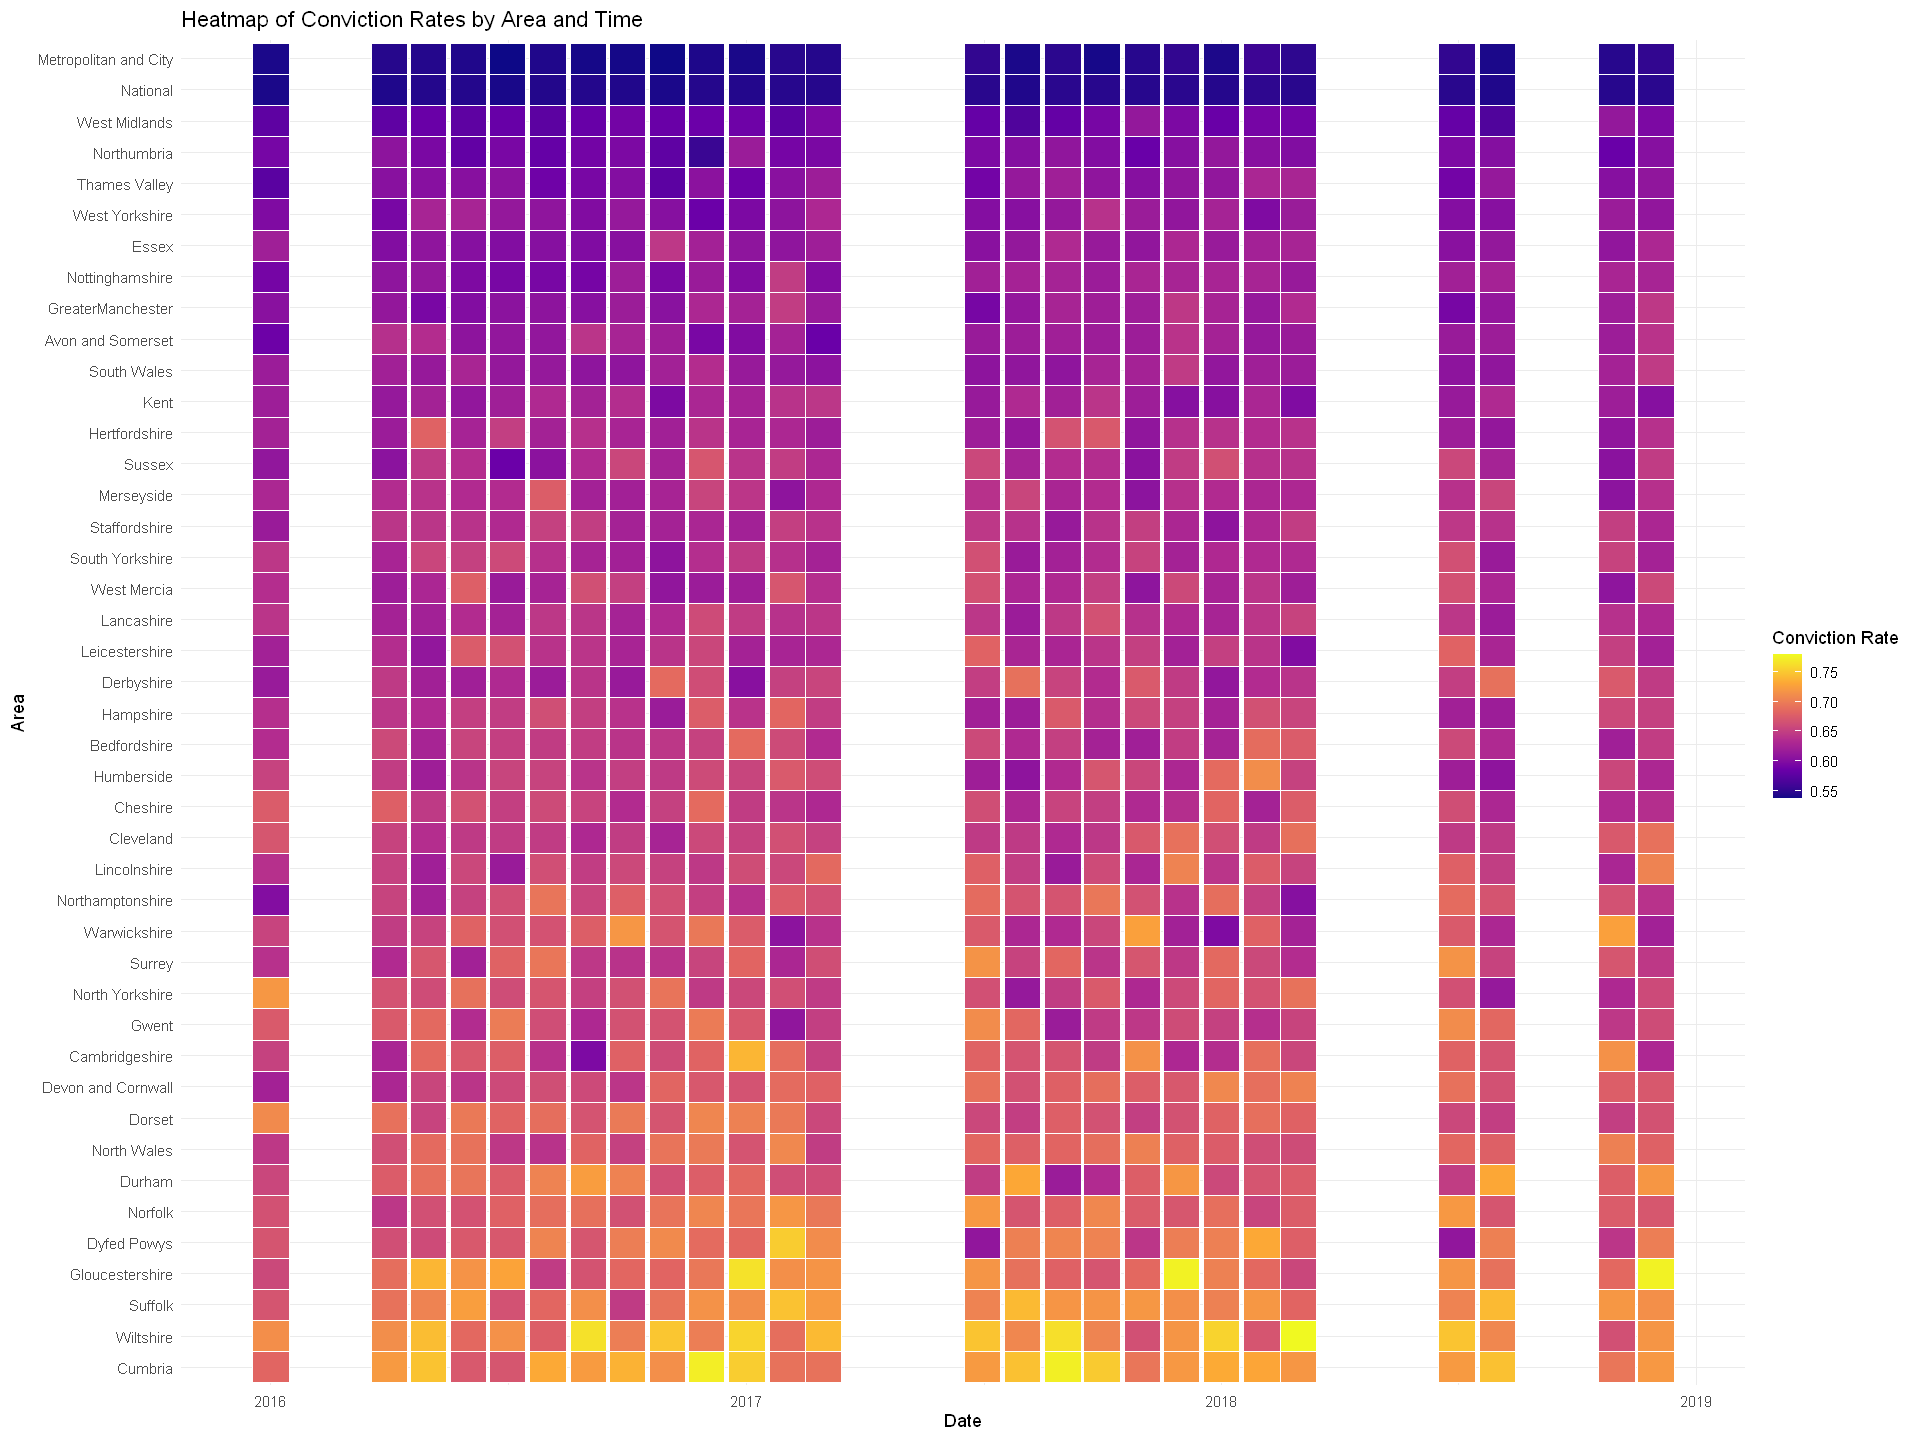

In [41]:
# Heatmap: Conviction Rate by Area and Month-Year

data_trend_analysis %>%
  mutate(
    month_num = match(month, month.abb),
    date = as.Date(paste(year, month_num, "01", sep = "-"))
  ) %>%
  ggplot(aes(x = date, y = reorder(Areas, -conviction_rate))) +
  geom_tile(aes(fill = conviction_rate), color = "white") +
  scale_fill_viridis_c(option = "C", name = "Conviction Rate") +
  labs(
    title = "Heatmap of Conviction Rates by Area and Time",
    x = "Date", y = "Area"
  ) +
  theme_minimal()


## 2.3 Layout Integration


Warning message:
"Removed 25 rows containing missing values or values outside the scale range
(`geom_bar()`)."


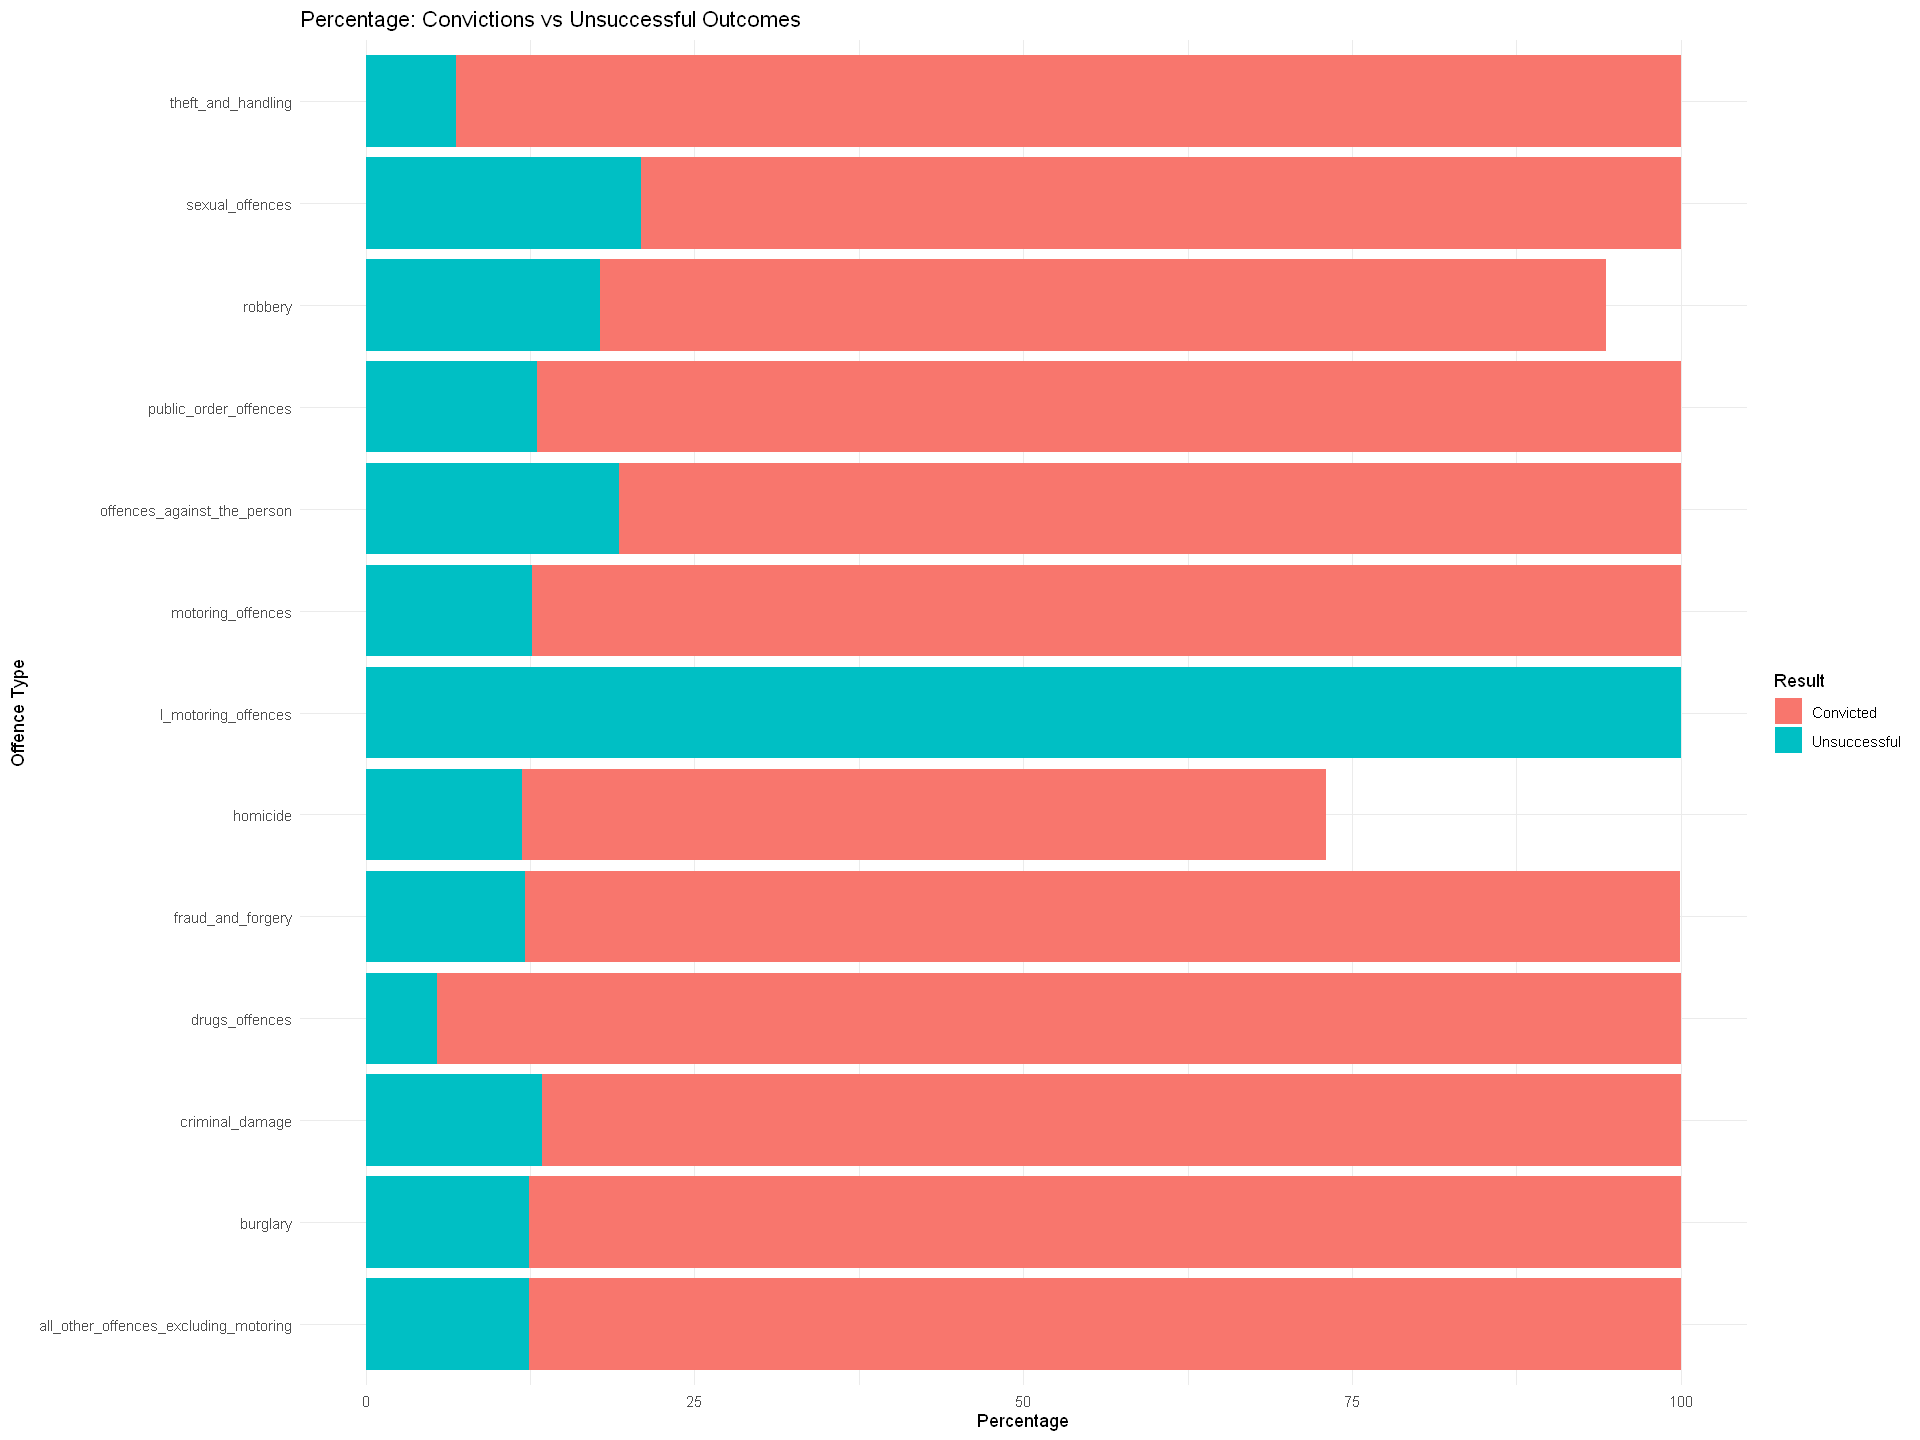

In [43]:
# Stacked Bar Chart - Convicted vs Unsuccessful by Offence Group

# Extract and pivot percentage-based "convictions" and "unsuccessful" columns
percentage_convictions <- data %>%
  summarise(across(starts_with("percentage") & contains("convictions"), mean, na.rm = TRUE)) %>%
  pivot_longer(everything(), names_to = "Offence", values_to = "Convicted")

percentage_unsuccessful <- data %>%
  summarise(across(starts_with("percentage") & contains("unsuccessful"), mean, na.rm = TRUE)) %>%
  pivot_longer(everything(), names_to = "Offence", values_to = "Unsuccessful")

# Combine both into long format for stacked bar chart
outcome_merged <- full_join(percentage_convictions, percentage_unsuccessful, by = "Offence") %>%
  pivot_longer(cols = c("Convicted", "Unsuccessful"), names_to = "Result", values_to = "Percentage")

# Clean offence names for readability
outcome_merged$Offence <- gsub("percentage_of_", "", outcome_merged$Offence)
outcome_merged$Offence <- gsub("_(convictions|unsuccessful)", "", outcome_merged$Offence)

# Plot
ggplot(outcome_merged, aes(x = reorder(Offence, -Percentage), y = Percentage, fill = Result)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Percentage: Convictions vs Unsuccessful Outcomes",
       x = "Offence Type", y = "Percentage") +
  theme_minimal()


Warning message:
"package 'patchwork' was built under R version 4.4.3"


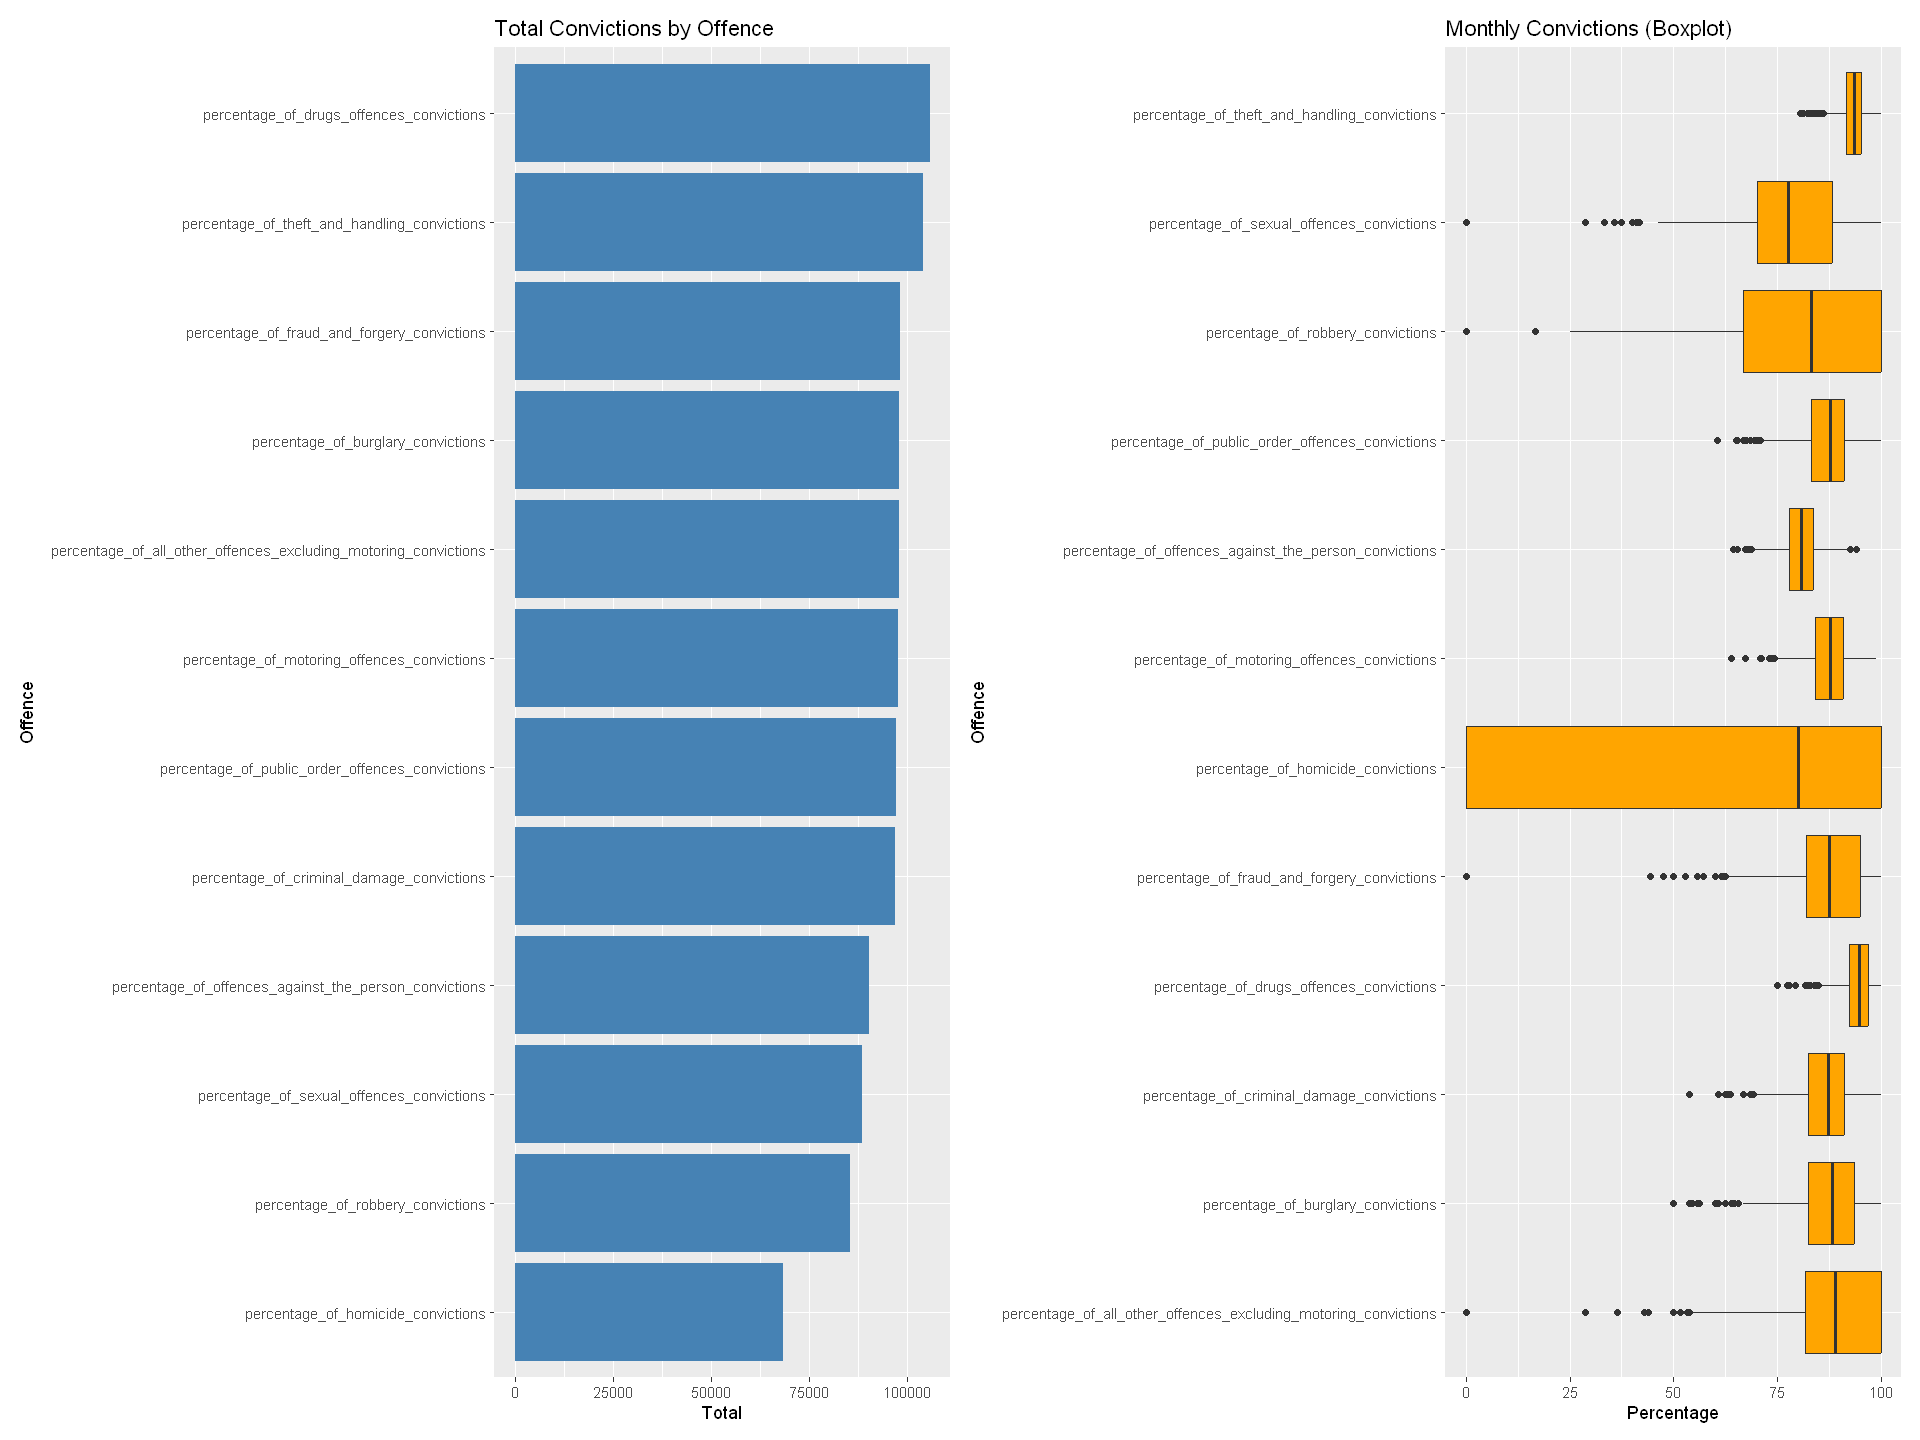

In [44]:
# Combined view (Patchwork layout)

library(ggplot2)
library(patchwork)
# Select columns starting with 'percentage' and ending with 'convictions'
conviction_cols <- grep("^percentage.*convictions$", names(data), value = TRUE)

# Summarize total convictions per offence
conviction_totals <- data %>%
  summarise(across(all_of(conviction_cols), sum, na.rm = TRUE)) %>%
  pivot_longer(everything(), names_to = "Offence", values_to = "TotalConvictions")

# Long format for boxplot
conviction_long <- data %>%
  select(all_of(conviction_cols)) %>%
  pivot_longer(cols = everything(), names_to = "variable", values_to = "value")

# Bar chart of total convictions
p1 <- ggplot(conviction_totals, aes(x = reorder(Offence, TotalConvictions), y = TotalConvictions)) +
  geom_col(fill = "steelblue") + coord_flip() +
  labs(title = "Total Convictions by Offence", x = "Offence", y = "Total")

# Boxplot of monthly convictions
p2 <- ggplot(conviction_long, aes(x = variable, y = value)) +
  geom_boxplot(fill = "orange") + coord_flip() +
  labs(title = "Monthly Convictions (Boxplot)", x = "Offence", y = "Percentage")

# Combine plots
p1 + p2

## 2.4 Time Series Analysis


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
`geom_smooth()` using formula = 'y ~ x'


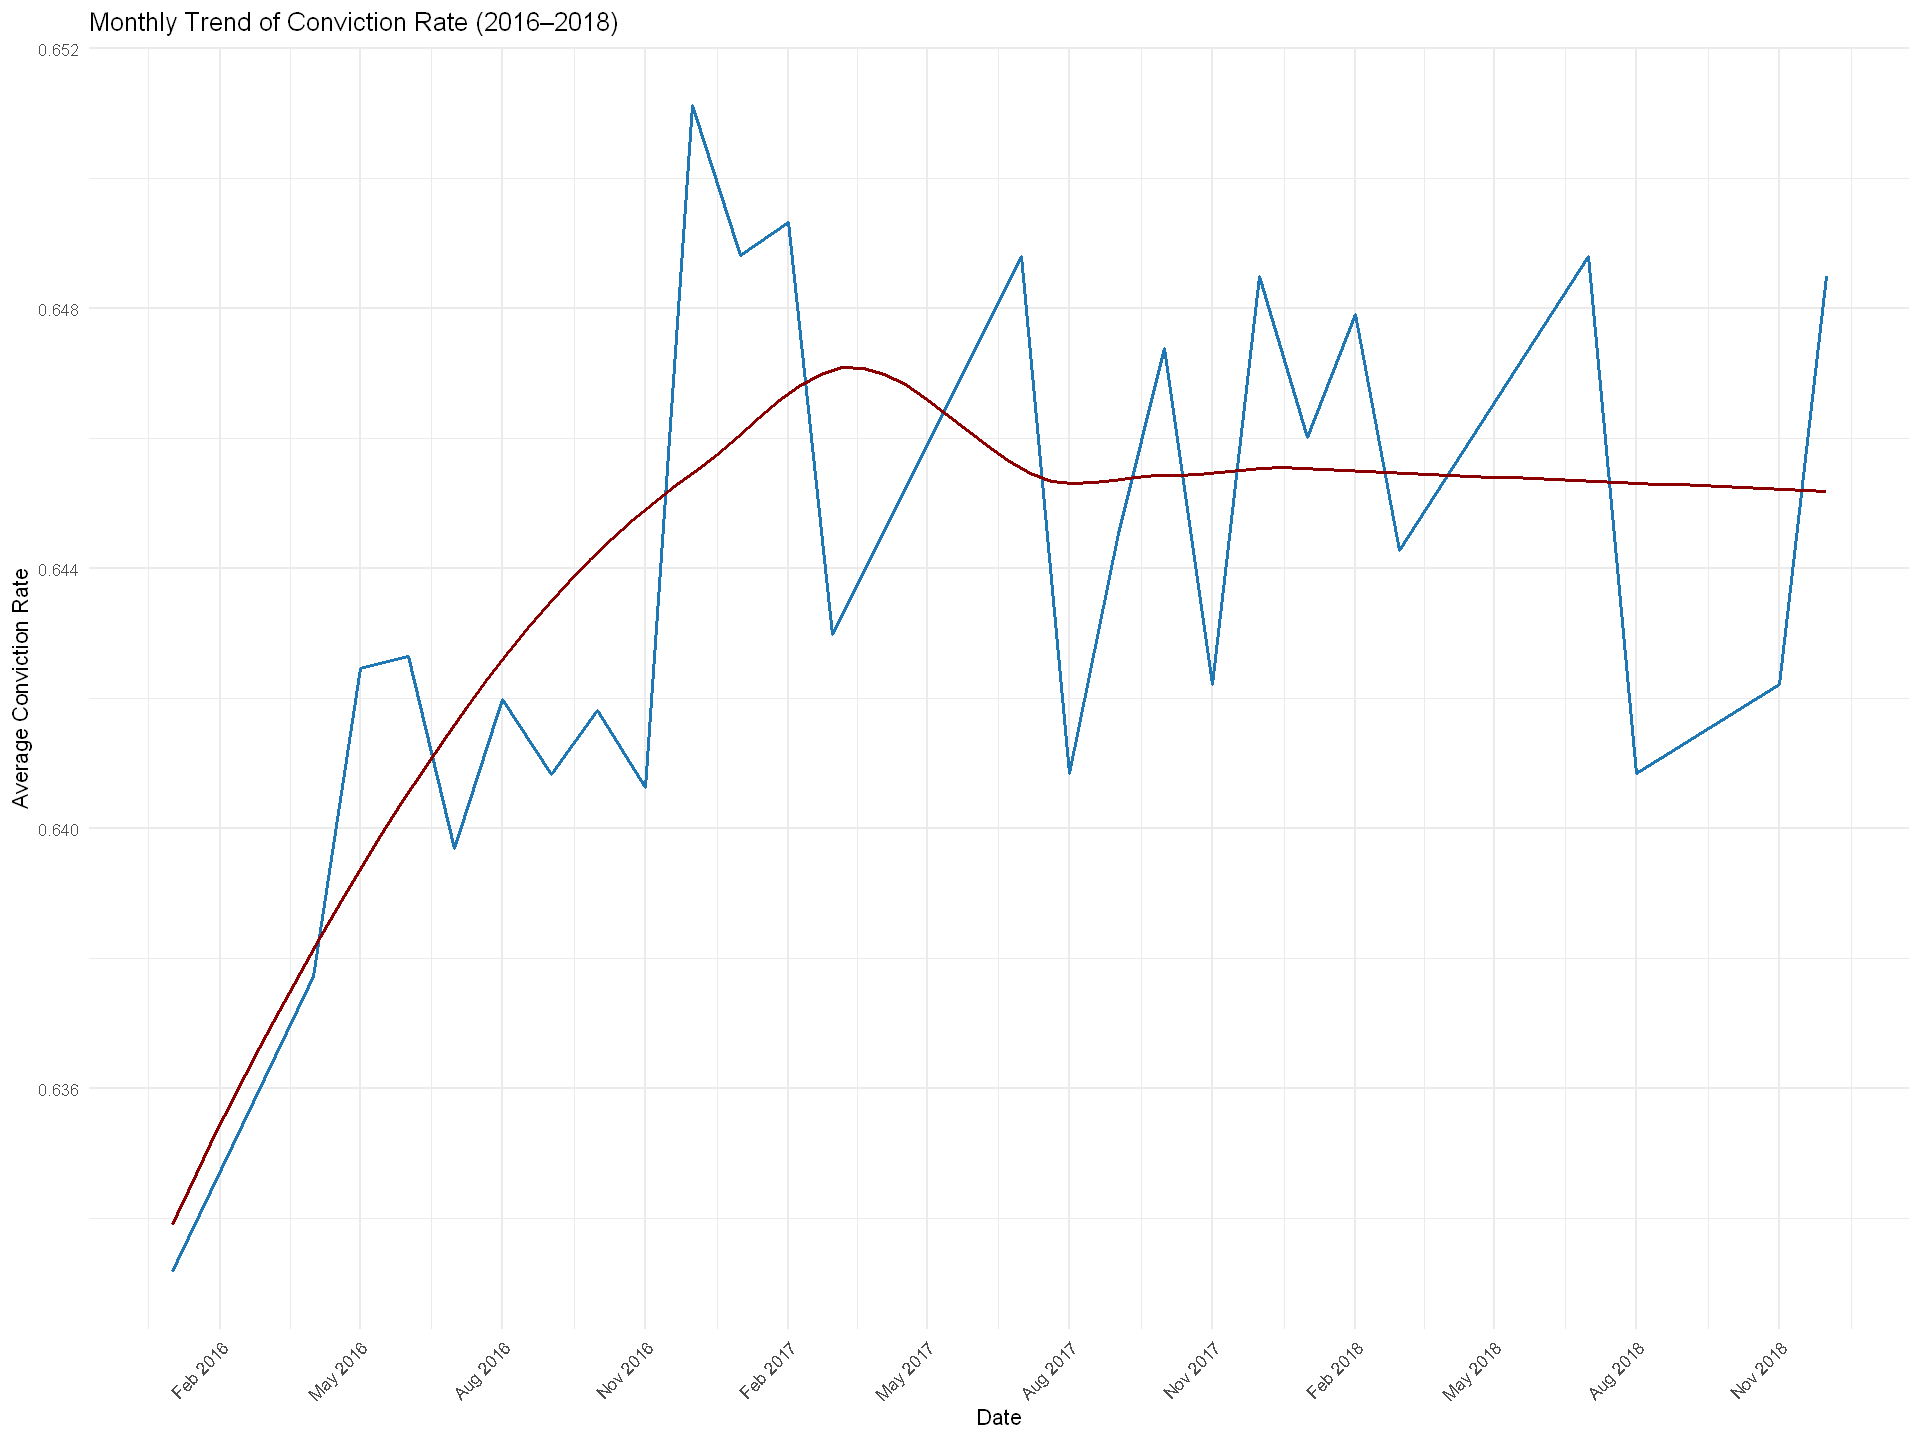

In [45]:
# Time Series Visualisation
# Conviction Rate Over Time

# Clean month names and create a proper date column
time <- data_trend_analysis %>%
  mutate(
    month = str_trim(month),                         # Remove extra whitespace
    month_num = match(month, month.abb),             # Convert month to numeric
    date = as.Date(paste(year, month_num, "01", sep = "-")) # Create date column
  ) %>%
  filter(!is.na(date))                               # Drop invalid dates just in case

# Aggregate conviction_rate across all areas (mean by month)
monthly_trend <- time %>%
  group_by(date) %>%
  summarise(
    mean_conviction_rate = mean(conviction_rate, na.rm = TRUE),
    .groups = "drop"
  )

# Plot the trend over time
ggplot(monthly_trend, aes(x = date, y = mean_conviction_rate)) +
  geom_line(color = "#1f77b4", size = 1) +
  geom_smooth(method = "loess", se = FALSE, color = "darkred", linewidth = 1) +
  labs(title = "Monthly Trend of Conviction Rate (2016–2018)",
       x = "Date", y = "Average Conviction Rate") +
  scale_x_date(date_labels = "%b %Y", date_breaks = "3 months") +
  theme_minimal(base_size = 13) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Warning message:
"package 'forecast' was built under R version 4.4.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



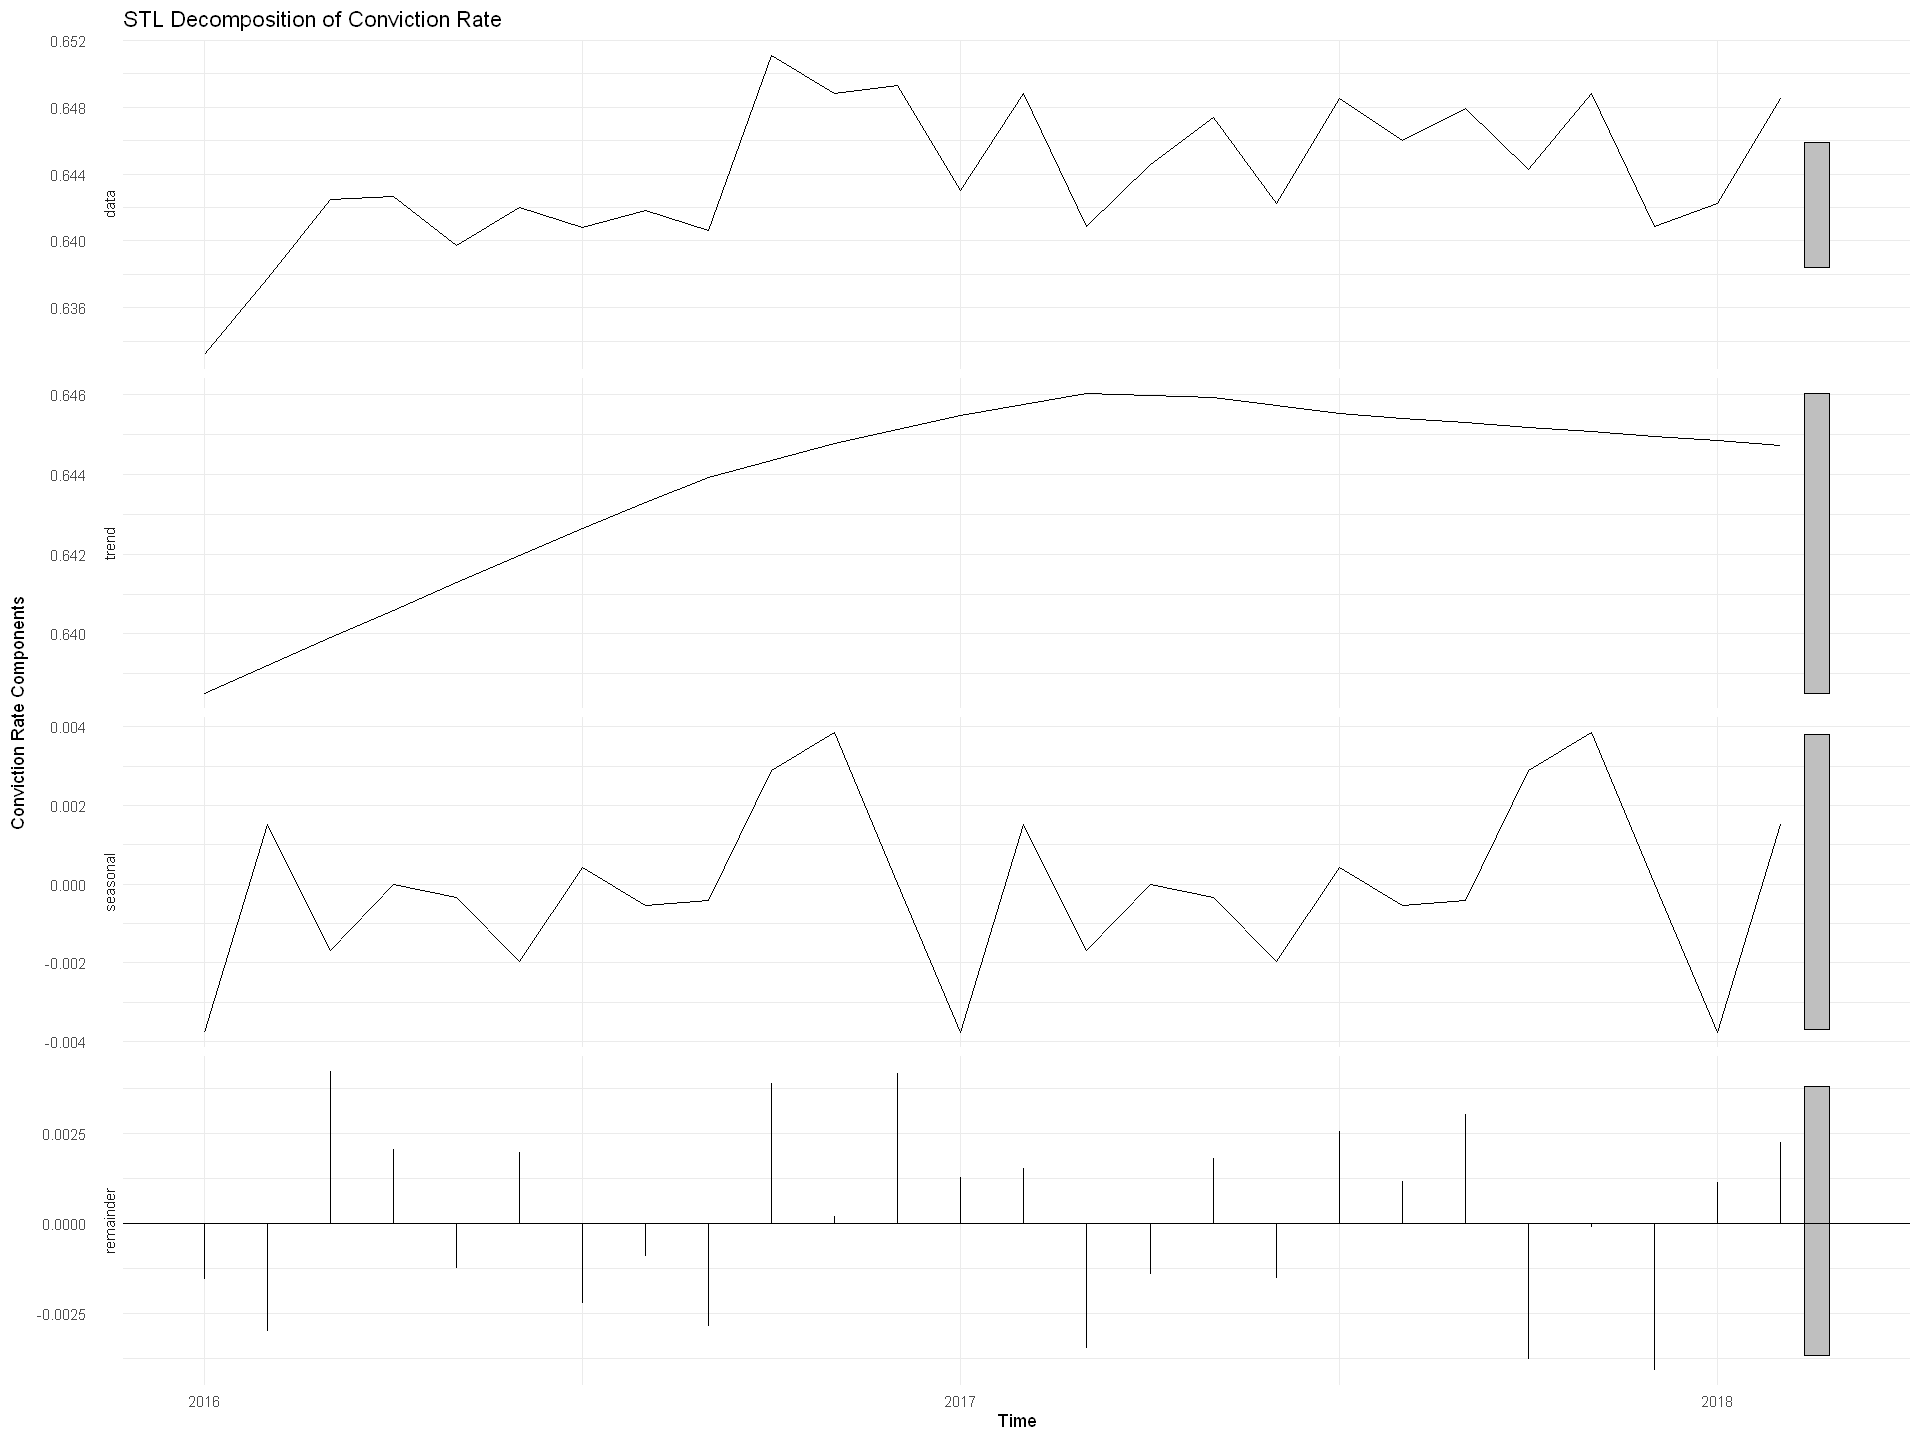

In [46]:
# Time Series Decomposition
# Seasonal-Trend decomposition

# Load necessary libraries
library(dplyr)
library(ggplot2)
library(forecast)
library(tibble)
library(lubridate)

# Preprocess data
# Aggregate conviction rate at national level by date
ts_data <- data_trend_analysis %>%
  mutate(
    month_num = match(month, month.abb),
    date = as.Date(paste(year, month_num, "01", sep = "-"))
  ) %>%
  group_by(date) %>%
  summarise(conviction_rate = mean(conviction_rate, na.rm = TRUE)) %>%
  arrange(date)

# Create time series object
# Frequency = 12 for monthly data, start from the first year/month
ts_obj <- ts(ts_data$conviction_rate,
             start = c(year(min(ts_data$date)), month(min(ts_data$date))),
             frequency = 12)

# Using STL
stl_decomp <- stl(ts_obj, s.window = "periodic")

autoplot(stl_decomp) +
  labs(title = "STL Decomposition of Conviction Rate",
       y = "Conviction Rate Components") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


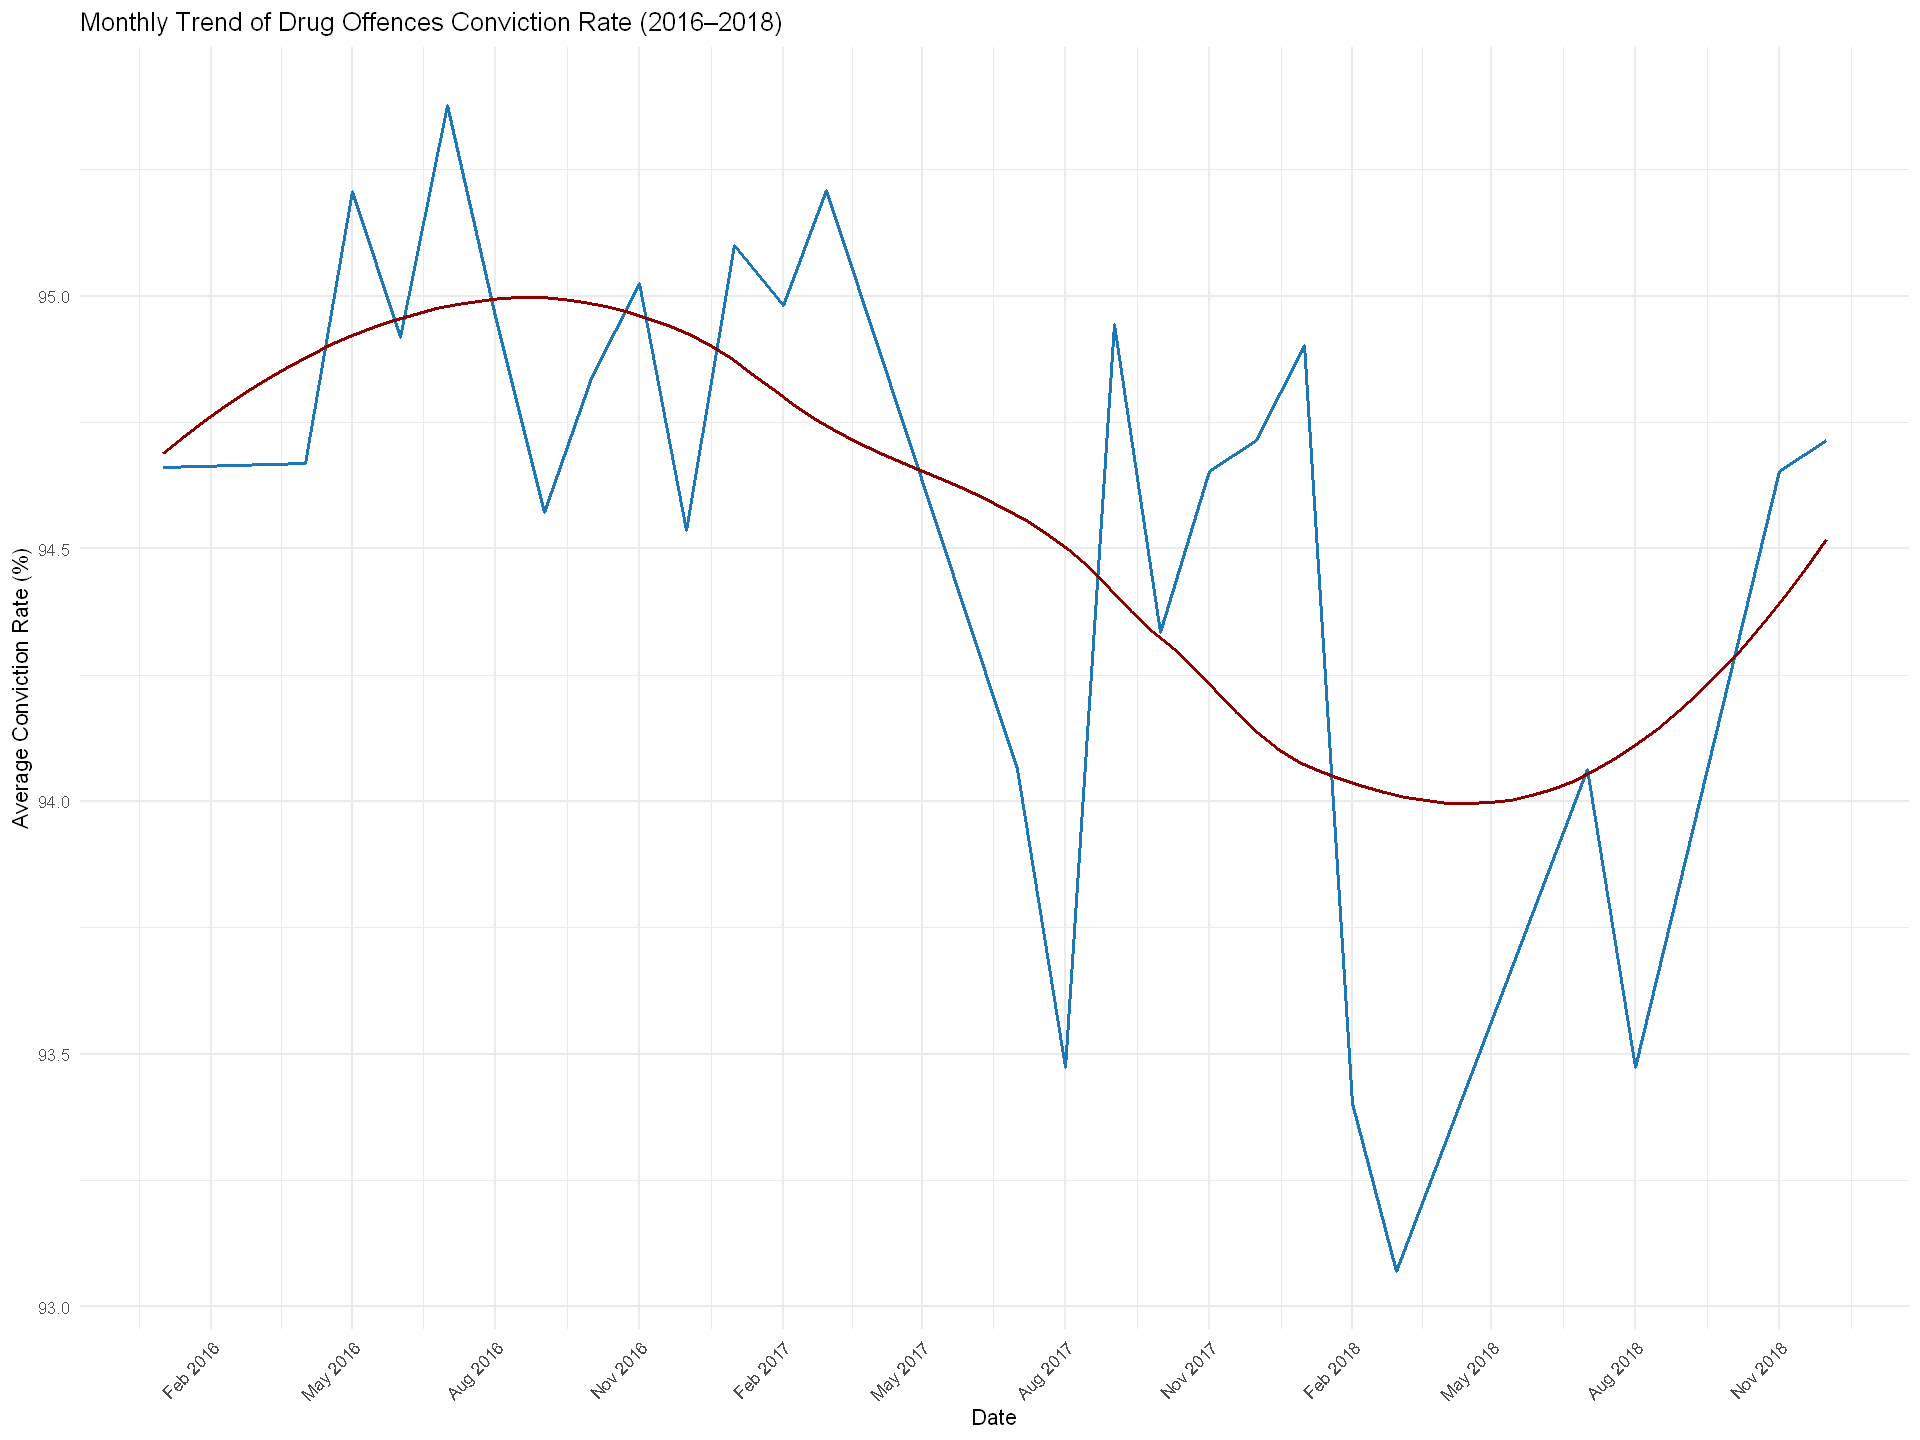

In [47]:
# Monthly trend of Drug offence

# Clean month names and create a proper date column
drugs_conviction <- data_trend_analysis %>%
  mutate(
    month = str_trim(month),                         # Remove extra whitespace
    month_num = match(month, month.abb),             # Convert month name to numeric
    date = as.Date(paste(year, month_num, "01", sep = "-")),  # Construct proper date
    percentage_clean = as.numeric(str_remove(percentage_of_drugs_offences_convictions, "%"))  # Clean %
  ) %>%
  filter(!is.na(date), !is.na(percentage_clean))     # Filter valid dates and values

# Aggregate: average conviction rate for drugs offences per month
monthly_drugs_trend <- drugs_conviction %>%
  group_by(date) %>%
  summarise(
    mean_drugs_conviction = mean(percentage_clean, na.rm = TRUE),
    .groups = "drop"
  )

# Plot the trend over time
ggplot(monthly_drugs_trend, aes(x = date, y = mean_drugs_conviction)) +
  geom_line(color = "#1f77b4", size = 1) +
  geom_smooth(method = "loess", se = FALSE, color = "darkred", linewidth = 1) +
  labs(title = "Monthly Trend of Drug Offences Conviction Rate (2016–2018)",
       x = "Date", y = "Average Conviction Rate (%)") +
  scale_x_date(date_labels = "%b %Y", date_breaks = "3 months") +
  theme_minimal(base_size = 13) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


# Task 3: Predictive Modelling

# REGRESSION

### Hypothesis:
**"Do Areas Significantly Influence Conviction Rates?"**

H₀ (Null): There is no significant difference in conviction rates across different areas.

H₁ (Alt):  There is a significant difference in conviction rates across different areas.

In [48]:
# Loading libraries

library(tidyr)
library(broom)
library(cluster)
library(factoextra)
library(caret)
library(ggpubr)
library(corrplot)
library(pROC)

Warning message:
"package 'broom' was built under R version 4.4.3"
Warning message:
"package 'cluster' was built under R version 4.4.3"
Warning message:
"package 'factoextra' was built under R version 4.4.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
"package 'ggpubr' was built under R version 4.4.3"

Attaching package: 'ggpubr'


The following object is masked from 'package:forecast':

    gghistogram


Warning message:
"package 'corrplot' was built under R version 4.4.3"
corrplot 0.95 loaded

Warning message:
"package 'pROC' was built under R version 4.4.3"
Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




In [49]:
# Data Preparation

set.seed(123)

# Remove potential leakage or irrelevant columns
data_cleaned <- data_featured %>%
  select(-total_conviction_count, -total_unsuccessful_count, -total_crime_cases, -percentage_of_l_motoring_offences_unsuccessful)

# Remove duplicate rows
data_cleaned <- distinct(data_cleaned)

# Label Encode 'Areas' before splitting to keep encoding consistent
data_cleaned$Areas <- as.integer(as.factor(data_cleaned$Areas))

# Add a row_id column for overlap checking (optional)
data_cleaned$row_id <- 1:nrow(data_cleaned)

# Train-Test Split (80/20)
splitIndex <- createDataPartition(data_cleaned$conviction_rate, p = 0.8, list = FALSE)
train_data <- data_cleaned[splitIndex, ]
test_data <- data_cleaned[-splitIndex, ]

#  Ensure no overlapping rows by row_id
train_data <- train_data[!train_data$row_id %in% test_data$row_id, ]
test_data <- test_data[!test_data$row_id %in% train_data$row_id, ]

# Drop the row_id column
train_data <- subset(train_data, select = -row_id)
test_data <- subset(test_data, select = -row_id)

# Scale numeric columns (excluding the target)
numeric_cols <- sapply(train_data, is.numeric)
numeric_cols["conviction_rate"] <- FALSE  # exclude target from scaling

scaler <- preProcess(train_data[, numeric_cols], method = c("center", "scale"))
train_scaled <- predict(scaler, train_data[, numeric_cols])
test_scaled <- predict(scaler, test_data[, numeric_cols])

# Add back encoded 'Areas' and target column
train_scaled$Areas <- train_data$Areas
train_scaled$conviction_rate <- train_data$conviction_rate

test_scaled$Areas <- test_data$Areas
test_scaled$conviction_rate <- test_data$conviction_rate

# Final Overlap Check
any(duplicated(rbind(train_scaled, test_scaled)))


[1] FALSE

In [50]:
# Create a unique row signature for each row in both datasets
train_keys <- apply(train_scaled, 1, paste, collapse = "_")
test_keys <- apply(test_scaled, 1, paste, collapse = "_")

# Check for intersection
overlapping_rows <- intersect(train_keys, test_keys)

# How many rows overlap?
length(overlapping_rows)


[1] 0

## Hypothesis Testing for Regression

In [51]:
# One-way ANOVA

anova_result <- aov(conviction_rate ~ Areas, data = data_featured)
anova_summary <- summary(anova_result)
p_value <- anova_summary[[1]]["Pr(>F)"][1, 1]

if (p_value < 0.05) {
  cat("Reject H₀: Significant difference in conviction rates across Areas.\n")
} else {
  cat("Fail to reject H₀.\n")
}
print(anova_summary)

Reject H₀: Significant difference in conviction rates across Areas.
              Df Sum Sq Mean Sq F value Pr(>F)    
Areas         42 1.6089 0.03831   85.98 <2e-16 ***
Residuals   1075 0.4789 0.00045                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [52]:
# Linear regression coefficient significance

model_lr <- lm(conviction_rate ~ Areas, data = data_featured)
summary_model <- summary(model_lr)

# Interpretation
if (any(summary_model$coefficients[-1, 4] < 0.05)) {
  cat("Reject H₀: At least one area significantly predicts conviction rate.\n")
} else {
  cat("Fail to reject H₀.\n")
}
summary_model

Reject H₀: At least one area significantly predicts conviction rate.



Call:
lm(formula = conviction_rate ~ Areas, data = data_featured)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.074380 -0.011866 -0.000064  0.010969  0.073495 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.6171099  0.0041395 149.077  < 2e-16 ***
AreasBedfordshire           0.0296762  0.0058542   5.069 4.70e-07 ***
AreasCambridgeshire         0.0494244  0.0058542   8.443  < 2e-16 ***
AreasCheshire               0.0339116  0.0058542   5.793 9.09e-09 ***
AreasCleveland              0.0373118  0.0058542   6.374 2.74e-10 ***
AreasCumbria                0.1049894  0.0058542  17.934  < 2e-16 ***
AreasDerbyshire             0.0274099  0.0058542   4.682 3.20e-06 ***
AreasDevon and Cornwall     0.0535284  0.0058542   9.144  < 2e-16 ***
AreasDorset                 0.0580365  0.0058542   9.914  < 2e-16 ***
AreasDurham                 0.0624817  0.0058542  10.673  < 2e-16 ***
AreasDyfed Powys            0.0668

## Regression Predictive Modelling

In [53]:
# Evaluation Function

evaluate_model <- function(actual, predicted, model_name) {
  rmse <- RMSE(predicted, actual)
  r2 <- R2(predicted, actual)
  cat(paste0(model_name, ":\n"))
  cat(paste0("RMSE: ", round(rmse, 6), "\n"))
  cat(paste0("R²: ", round(r2, 4), "\n\n"))
  
  # Visualization
  ggplot(data = data.frame(actual, predicted), aes(x = actual, y = predicted)) +
    geom_point(alpha = 0.5) +
    geom_abline(color = 'blue', linetype = 'dashed') +
    ggtitle(paste("Predicted vs Actual -", model_name)) +
    xlab("Actual Conviction Rate") + ylab("Predicted Conviction Rate") +
    theme_minimal()
}


Linear Regression:
RMSE: 0.011029
R²: 0.9365



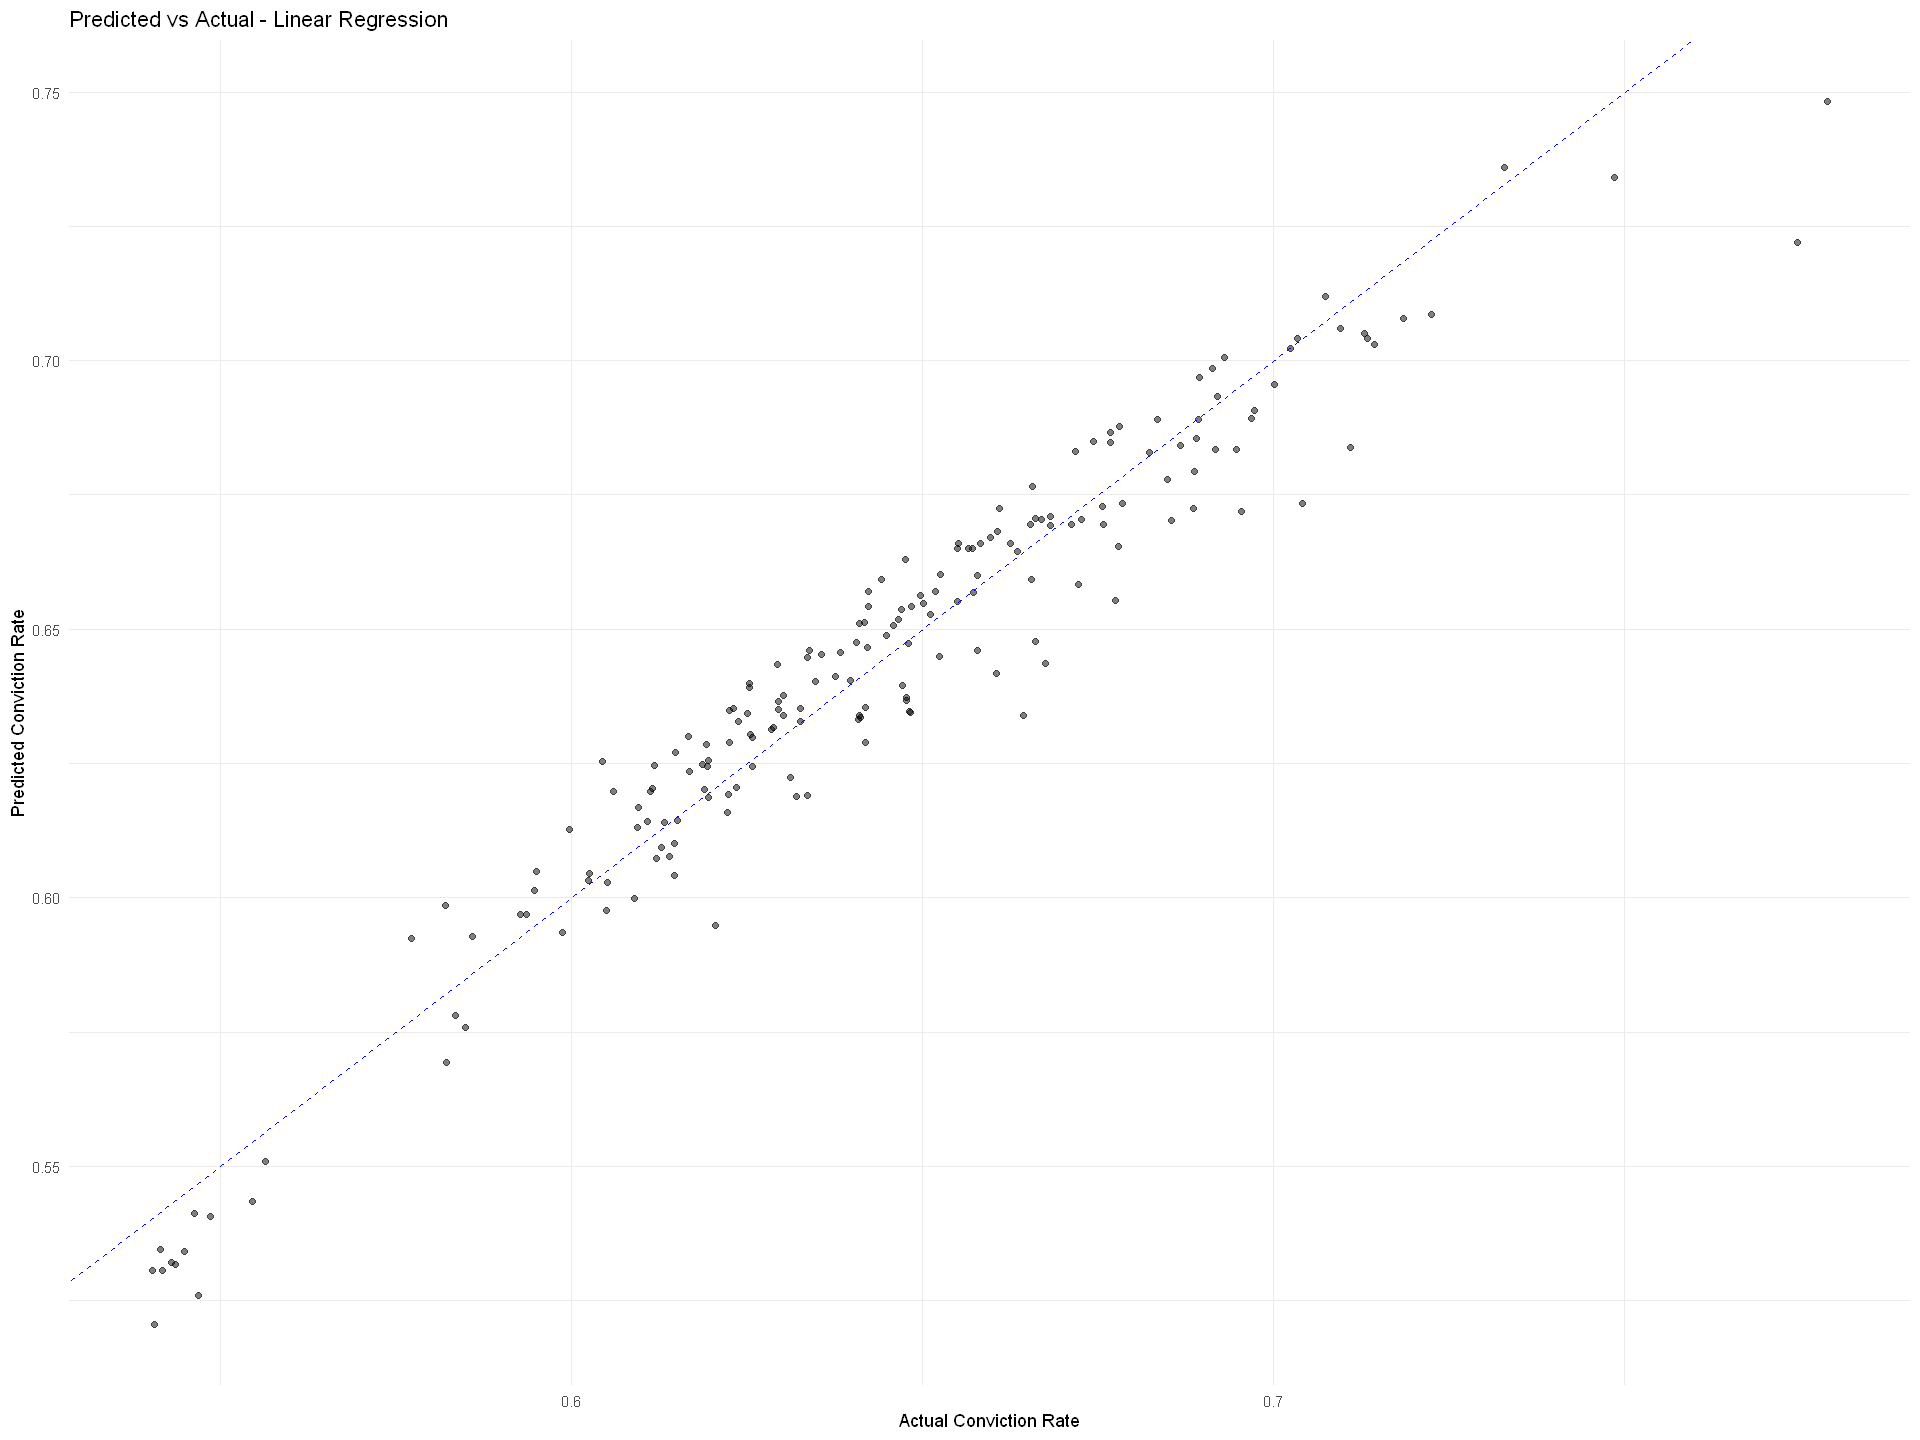

In [54]:
# Linear Regression

lm_model <- lm(conviction_rate ~ ., data = train_scaled)
lm_pred <- predict(lm_model, test_scaled)

# Evaluation
evaluate_model(test_scaled$conviction_rate, lm_pred, "Linear Regression")

Warning message:
"package 'rpart' was built under R version 4.4.3"


Decision Tree:
RMSE: 0.020994
R²: 0.7747



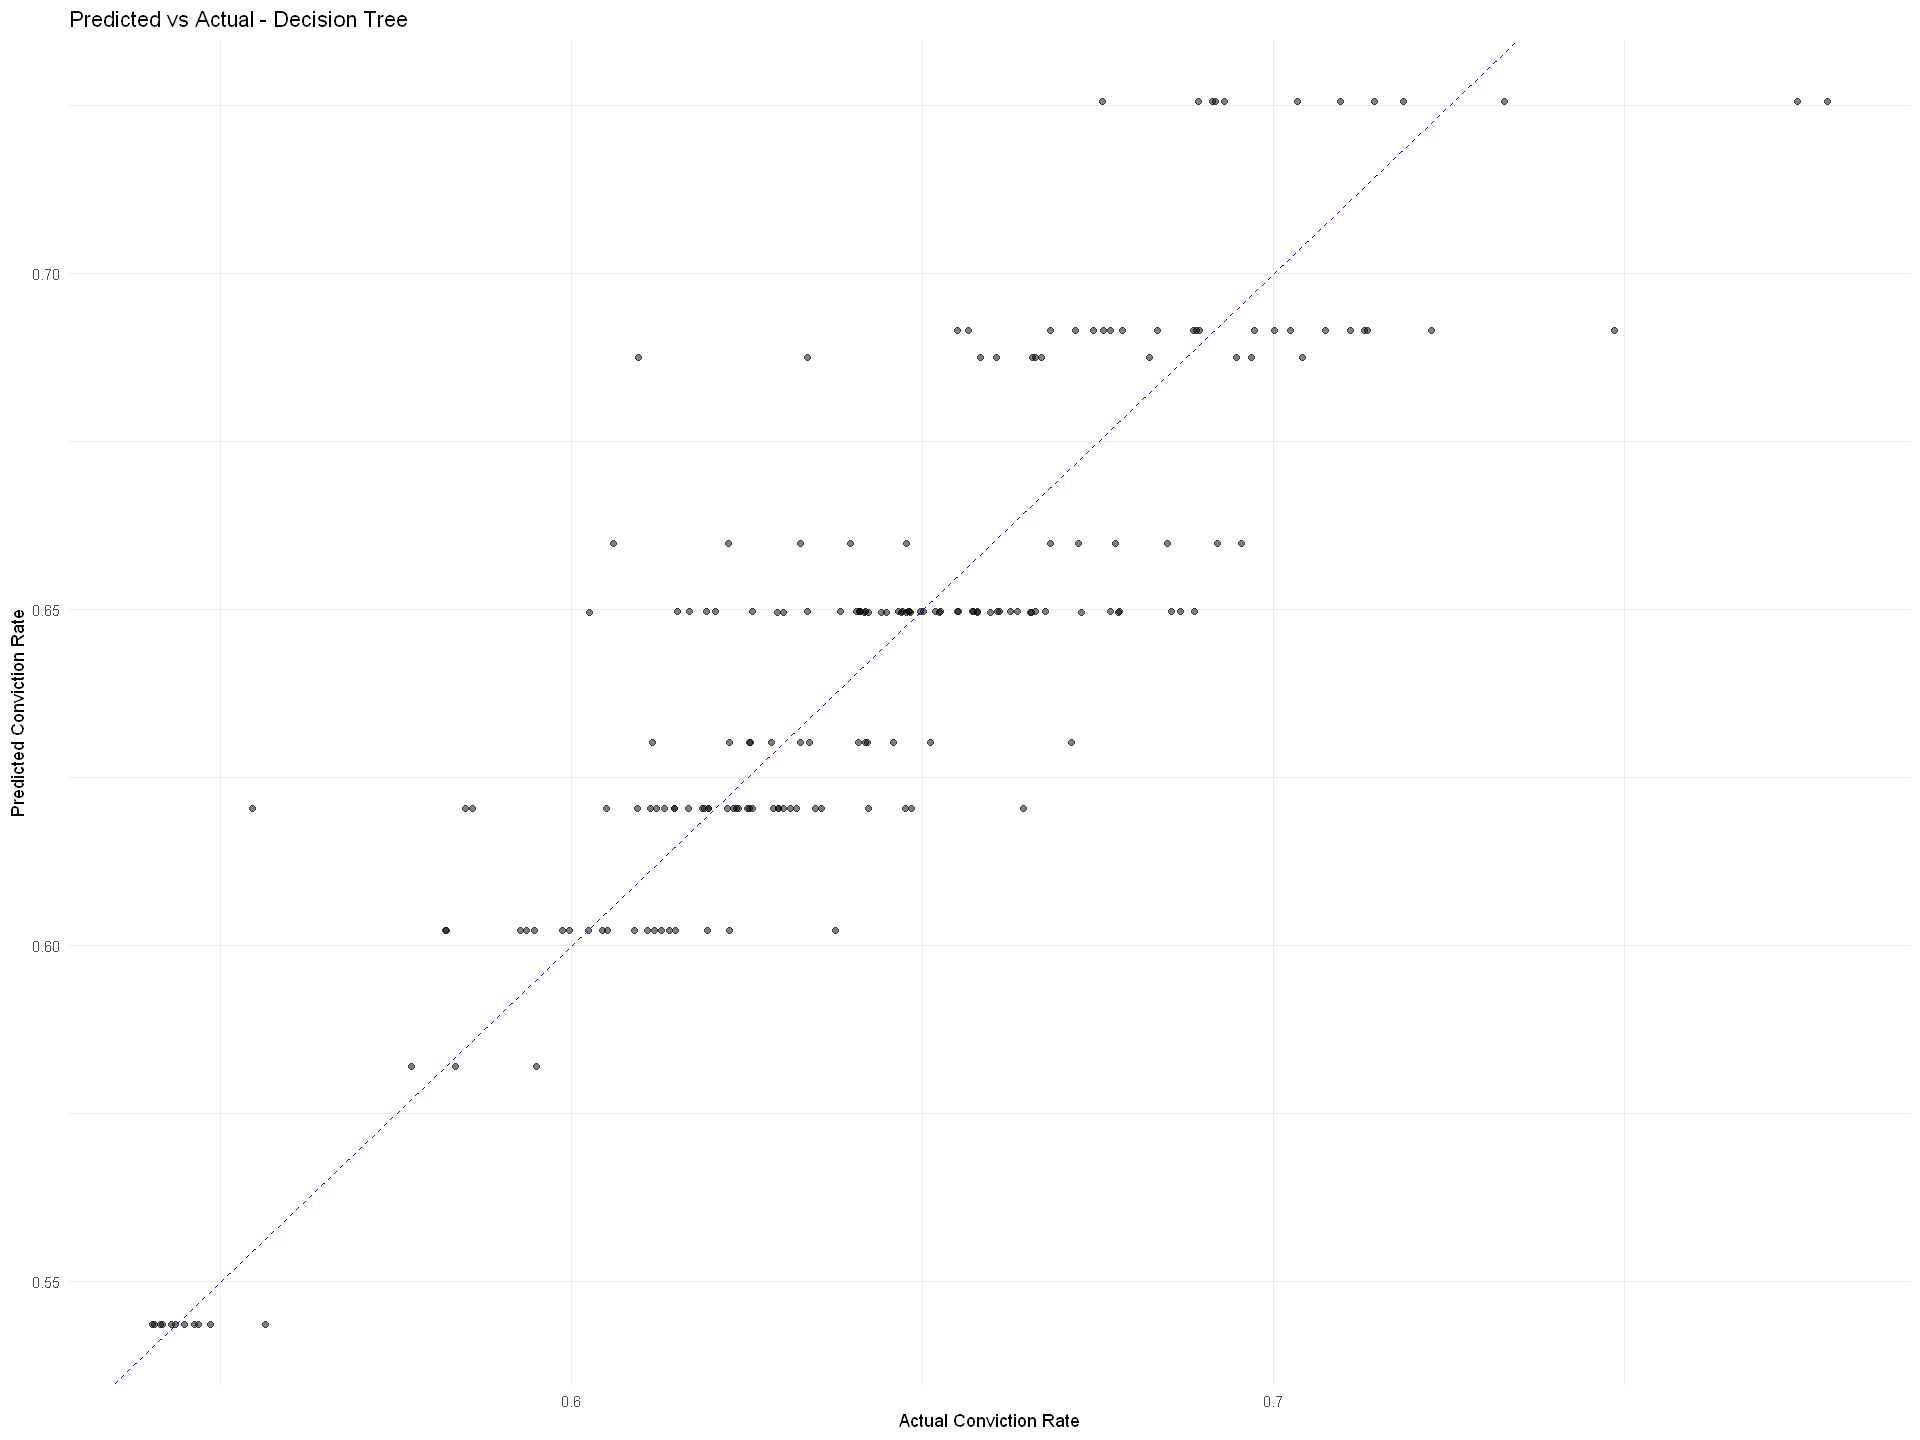

In [55]:
# Decision tree

library(rpart)
# Decision Tree model
tree_model <- rpart(conviction_rate ~ ., data = train_scaled, method = "anova")
tree_pred <- predict(tree_model, test_scaled)

# Evaluation
evaluate_model(test_scaled$conviction_rate, tree_pred, "Decision Tree")


Warning message:
"package 'randomForest' was built under R version 4.4.3"
randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin




Random Forest:
RMSE: 0.011013
R²: 0.9384



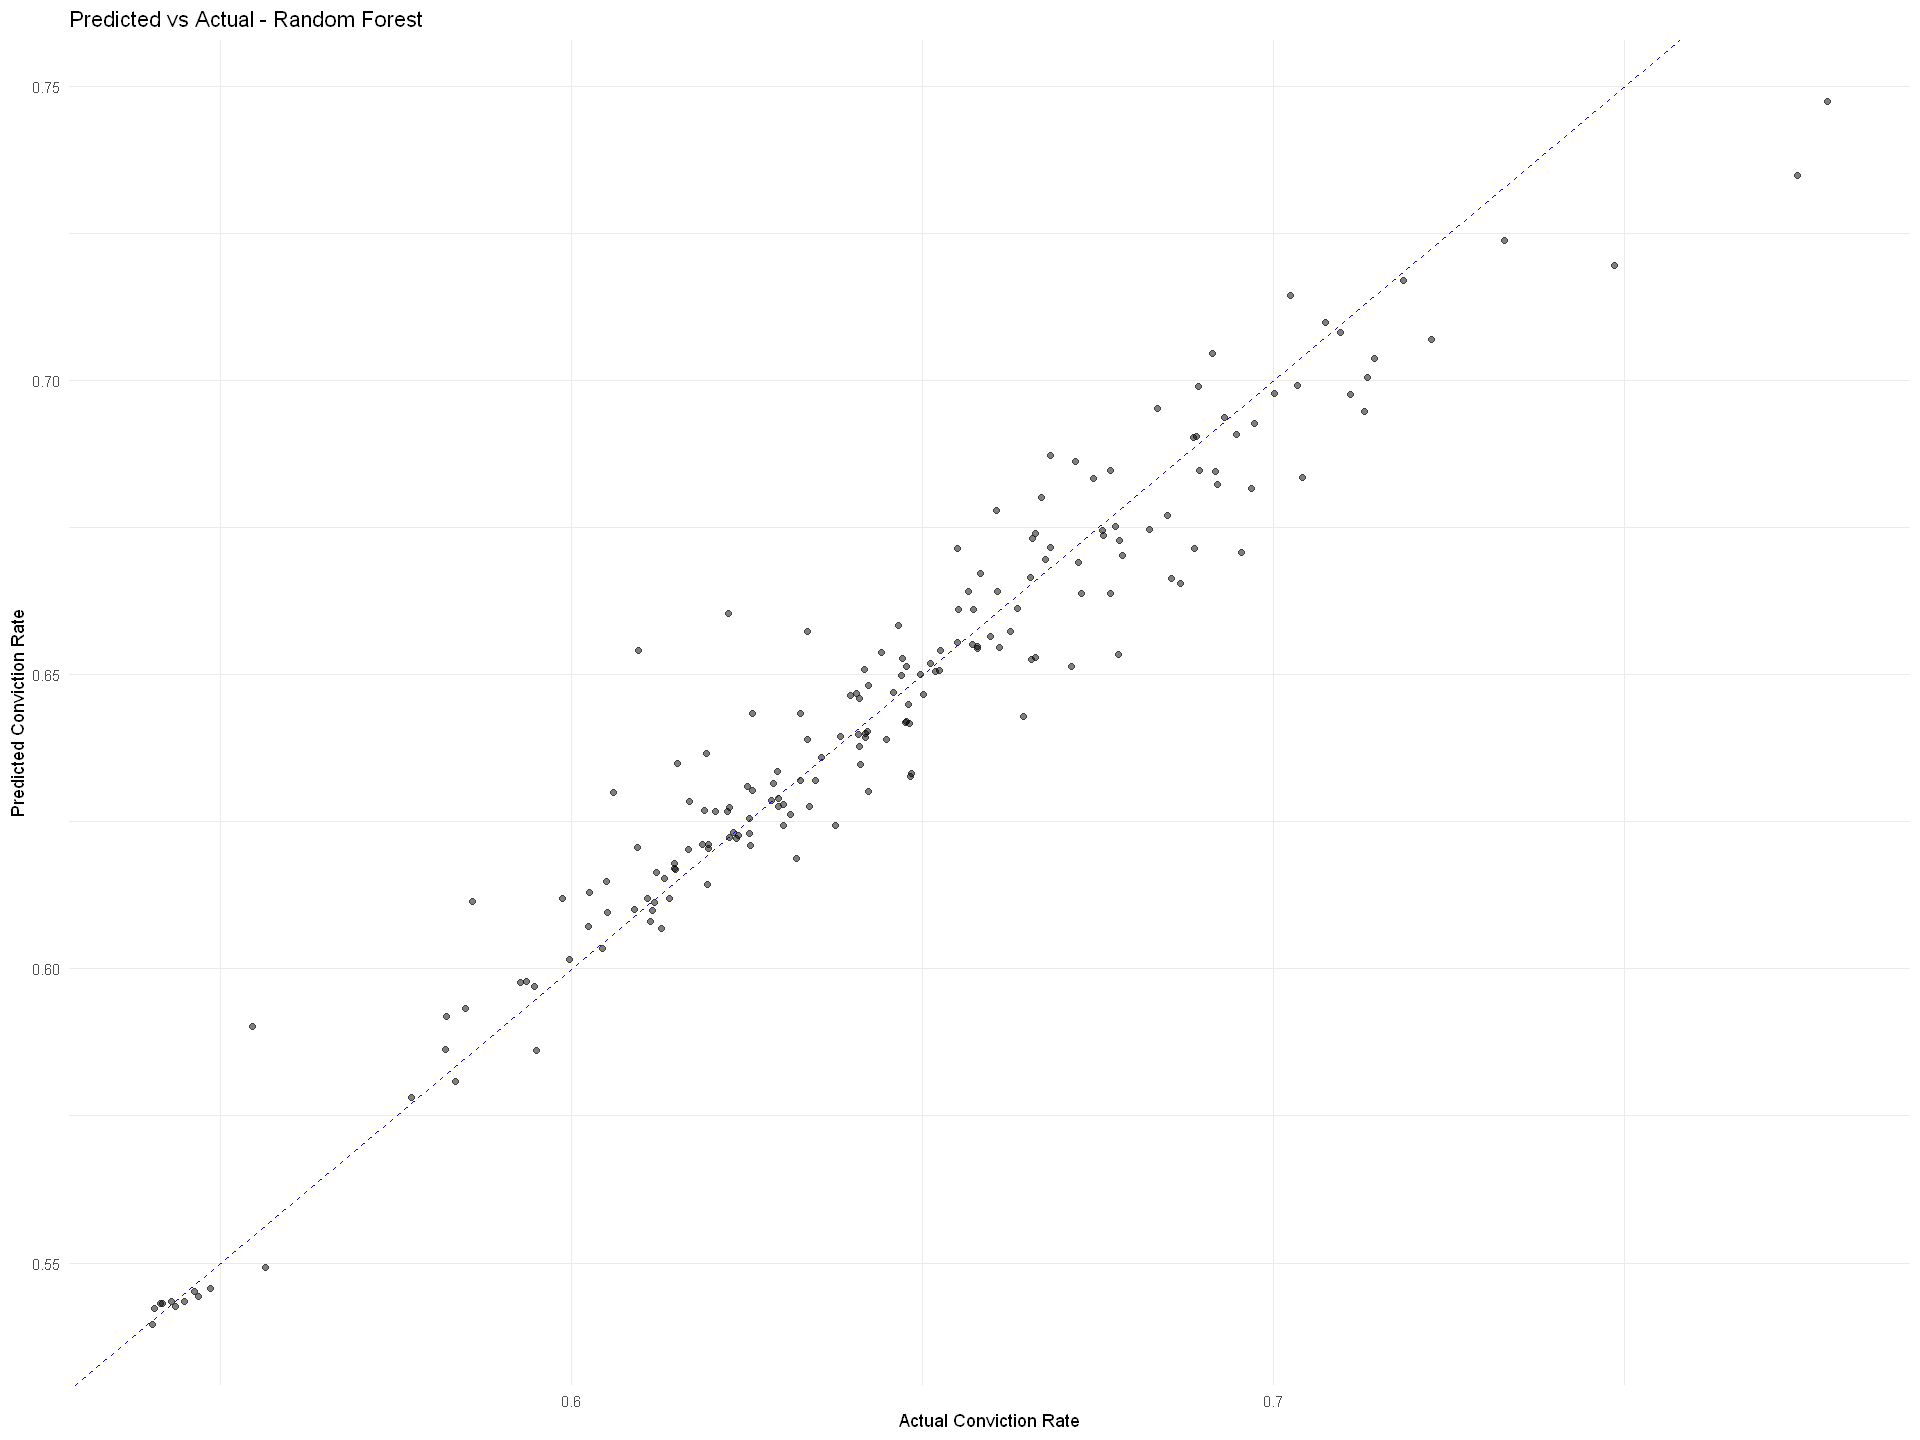

In [56]:
# Random forest

library(randomForest)

# Random Forest model
rf_model <- randomForest(conviction_rate ~ ., data = train_scaled, ntree = 100)
rf_pred <- predict(rf_model, test_scaled)

# Evaluation
evaluate_model(test_scaled$conviction_rate, rf_pred, "Random Forest")


[1] "IncNodePurity"


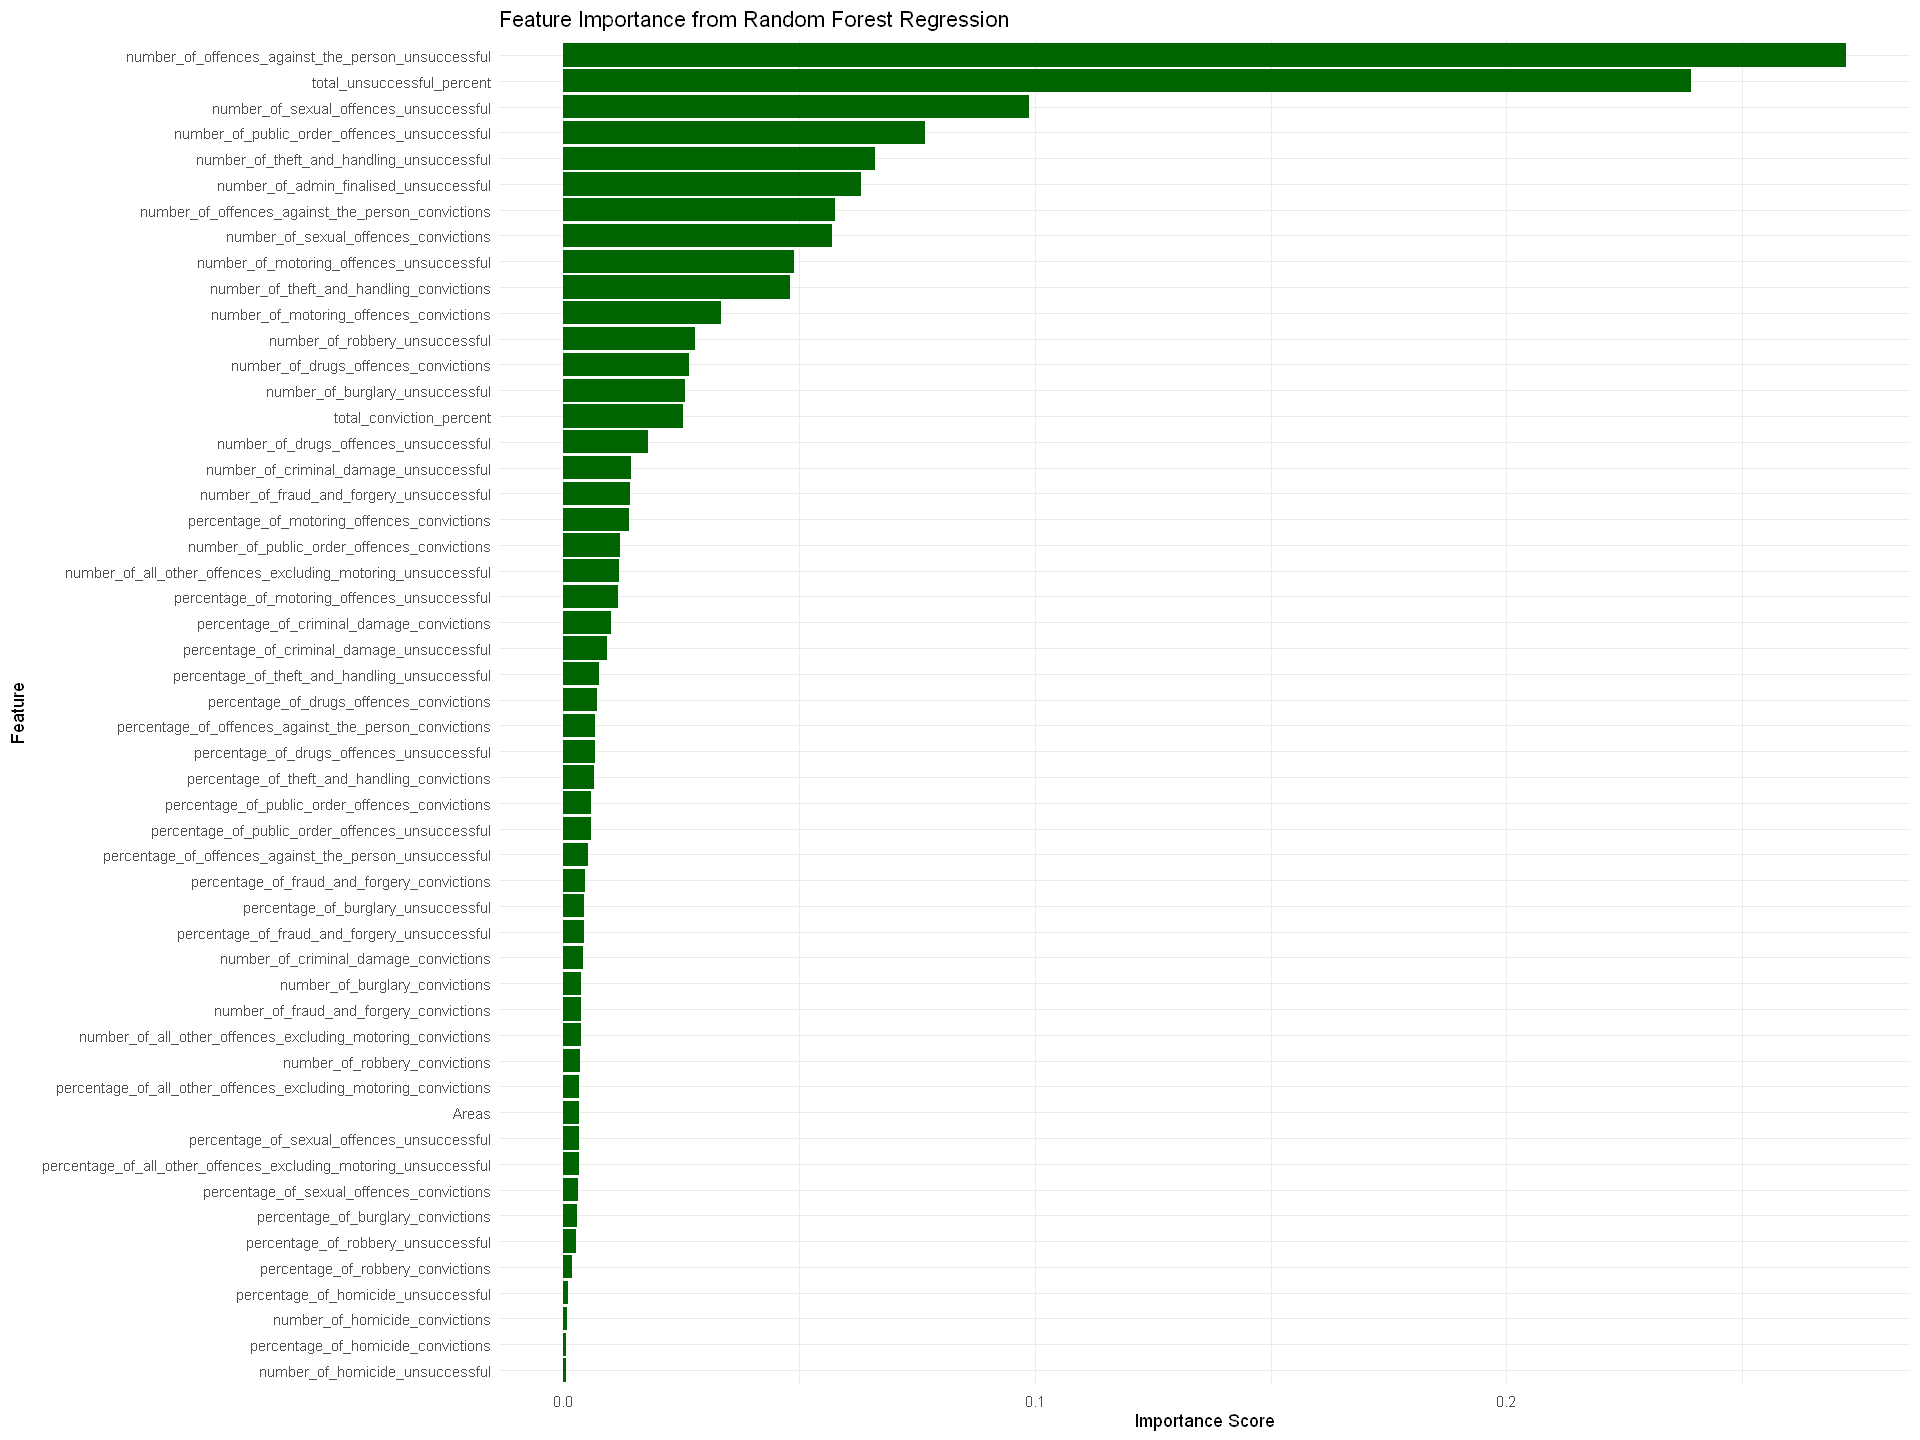

In [57]:
# Feature importance of Random Forest

# Load necessary libraries
library(randomForest)
library(ggplot2)

# Get variable importance
imp <- importance(rf_model)

# Check available columns
print(colnames(imp))

# Use appropriate importance metric
importance_df <- data.frame(
  Feature = rownames(imp),
  Importance = if ("IncMSE" %in% colnames(imp)) imp[, "IncMSE"] else imp[, "IncNodePurity"]
)

# Sort by importance
importance_df <- importance_df[order(importance_df$Importance, decreasing = TRUE), ]

# Plot
ggplot(importance_df, aes(x = reorder(Feature, Importance), y = Importance)) +
  geom_col(fill = "darkgreen") +
  coord_flip() +
  labs(
    title = "Feature Importance from Random Forest Regression",
    x = "Feature",
    y = "Importance Score"
  ) +
  theme_minimal()


Support Vector Regression:
RMSE: 0.009687
R²: 0.9515



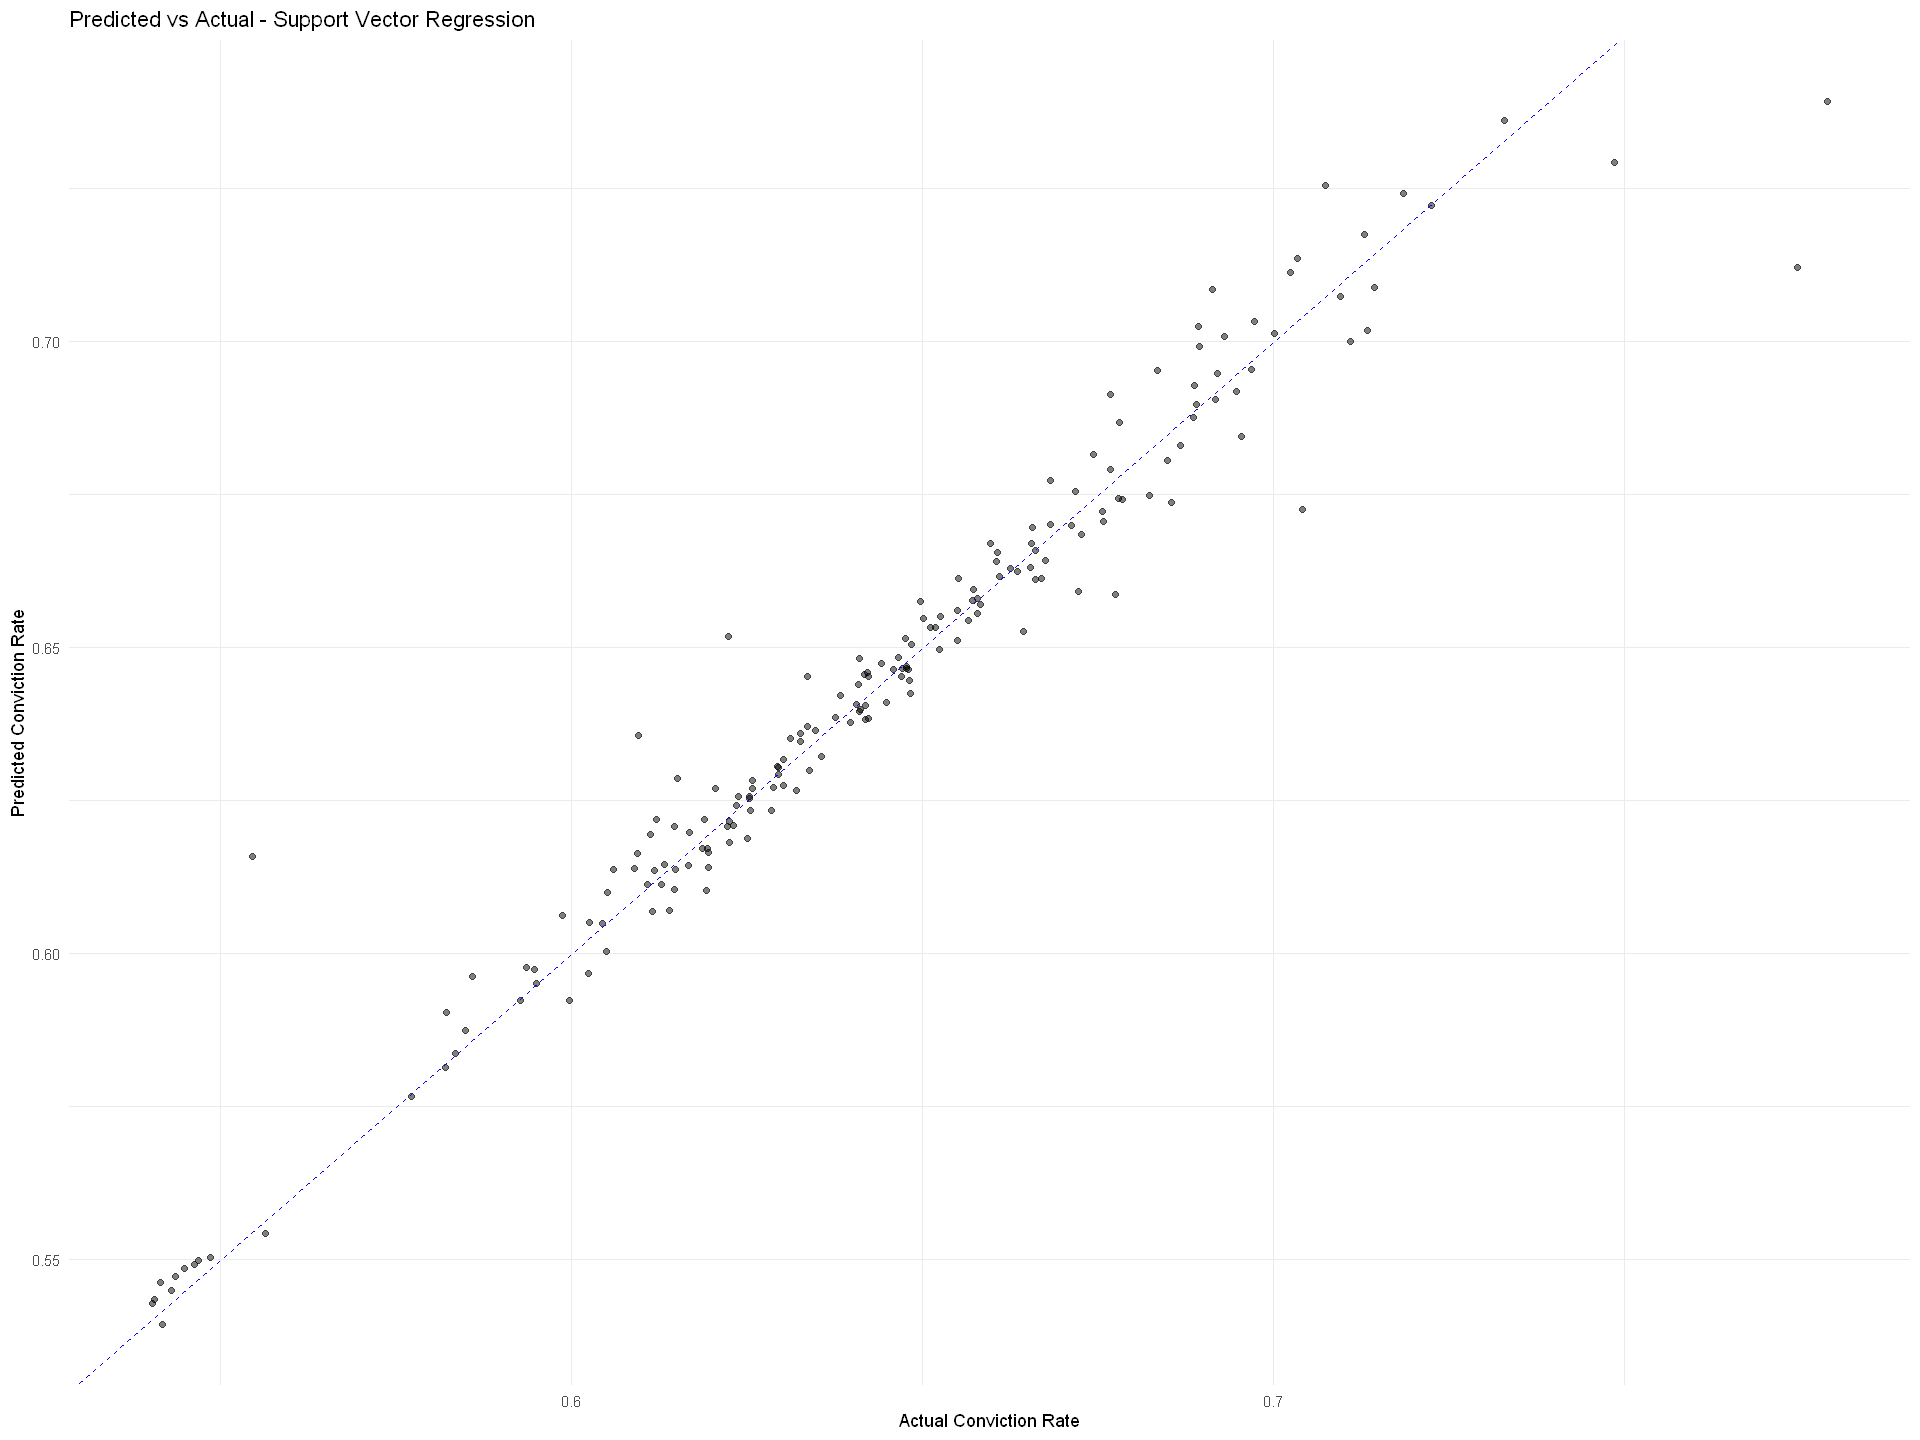

In [58]:
# Support Vector Regression (SVR)

library(e1071)

#svr model
svr_model <- svm(conviction_rate ~ ., data = train_scaled)
svr_pred <- predict(svr_model, test_scaled)

# Evaluation
evaluate_model(test_scaled$conviction_rate, svr_pred, "Support Vector Regression")


Warning message:
"package 'Metrics' was built under R version 4.4.3"

Attaching package: 'Metrics'


The following object is masked from 'package:pROC':

    auc


The following object is masked from 'package:forecast':

    accuracy


The following objects are masked from 'package:caret':

    precision, recall




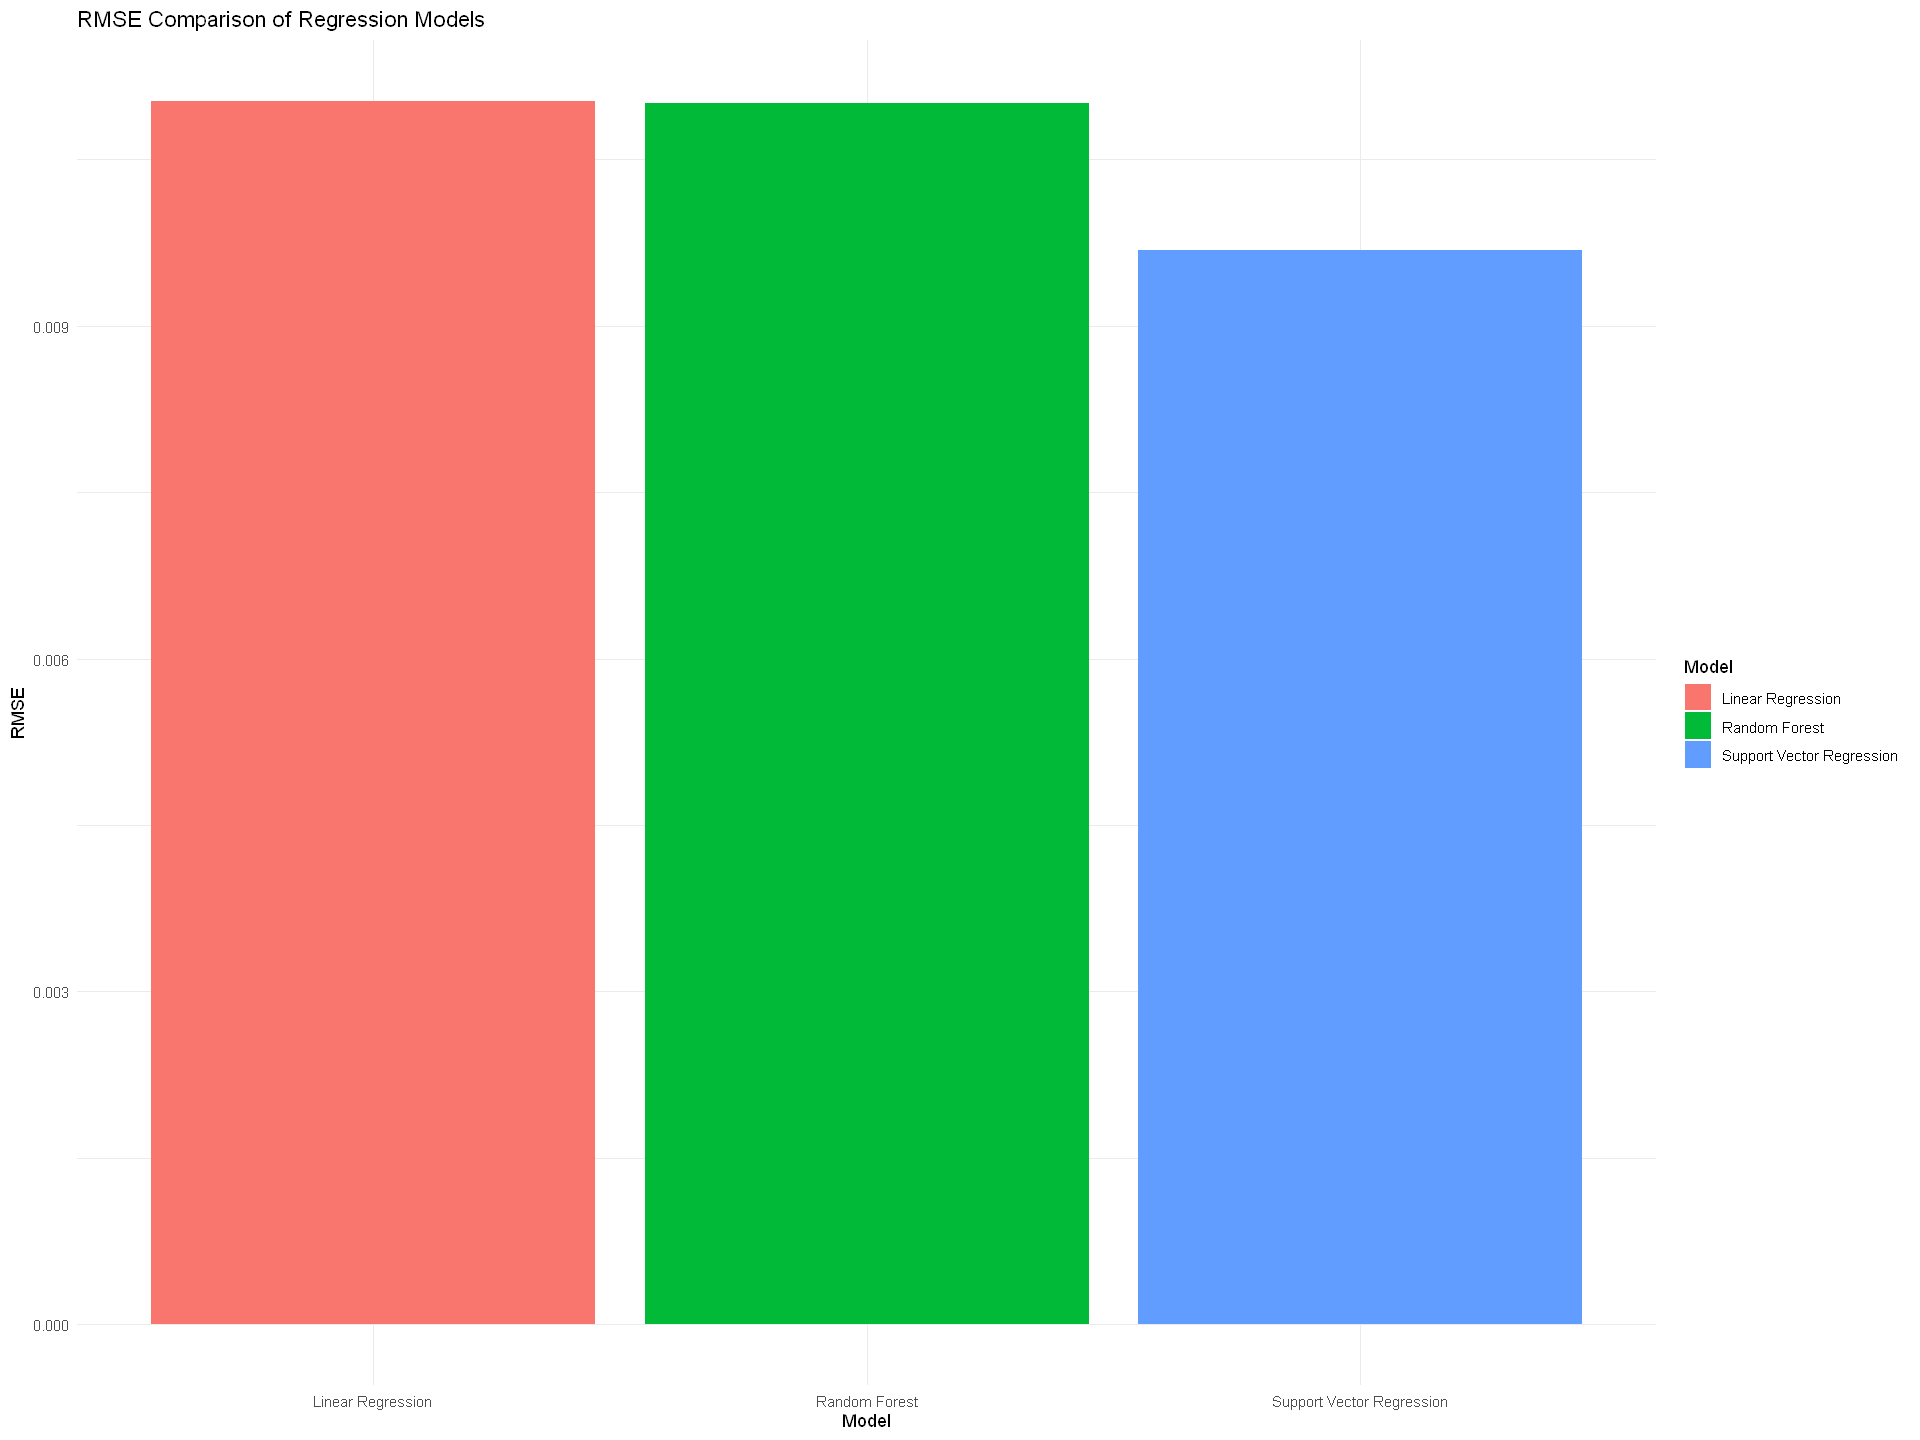

In [59]:
#  Comparing RMSE of Regression Models

library(Metrics)
rmse_lm <- rmse(test_scaled$conviction_rate, predict(lm_model, test_scaled))
rmse_rf <- rmse(test_scaled$conviction_rate, predict(rf_model, test_scaled))
rmse_svr <- rmse(test_scaled$conviction_rate, predict(svr_model, test_scaled))

rmse_values <- data.frame(
  Model = c("Linear Regression", "Random Forest", "Support Vector Regression"),
  RMSE = c(rmse_lm, rmse_rf, rmse_svr)
)

ggplot(rmse_values, aes(x = Model, y = RMSE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "RMSE Comparison of Regression Models", x = "Model", y = "RMSE") +
  theme_minimal()

# CLUSTERING 

### Hypothesis:

**"Can Crime Outcomes Be Grouped into Distinct Patterns Based on Case Results?"**

H₀ (Null): There are no distinct clusters among records when considering conviction and unsuccessful outcomes.

H₁ (Alt): There are distinct clusters based on conviction and unsuccessful outcomes.

In [60]:
# Data Preparation 

# Select clustering-relevant columns
clustering_data <- data_featured %>%
  select(total_conviction_count, total_unsuccessful_count) %>%
  distinct()

#  Scale data (Standardization)
clustering_data_scaled <- scale(clustering_data)

# Final check: No duplicates and rows are standardized
any(duplicated(clustering_data_scaled))
summary(clustering_data_scaled)


[1] FALSE

 total_conviction_count total_unsuccessful_count
 Min.   :-1.6573        Min.   :-1.4275         
 1st Qu.:-0.6695        1st Qu.:-0.6011         
 Median :-0.1379        Median :-0.1899         
 Mean   : 0.0000        Mean   : 0.0000         
 3rd Qu.: 0.3425        3rd Qu.: 0.2993         
 Max.   : 4.5892        Max.   : 4.5907         

## Hypothesis Testing for Clustering

Average Silhouette Width: 0.5579 
 Interpretation: Clusters are well-separated and have a strong structure.
  cluster size ave.sil.width
1       1   44          0.67
2       2  432          0.50
3       3  470          0.60


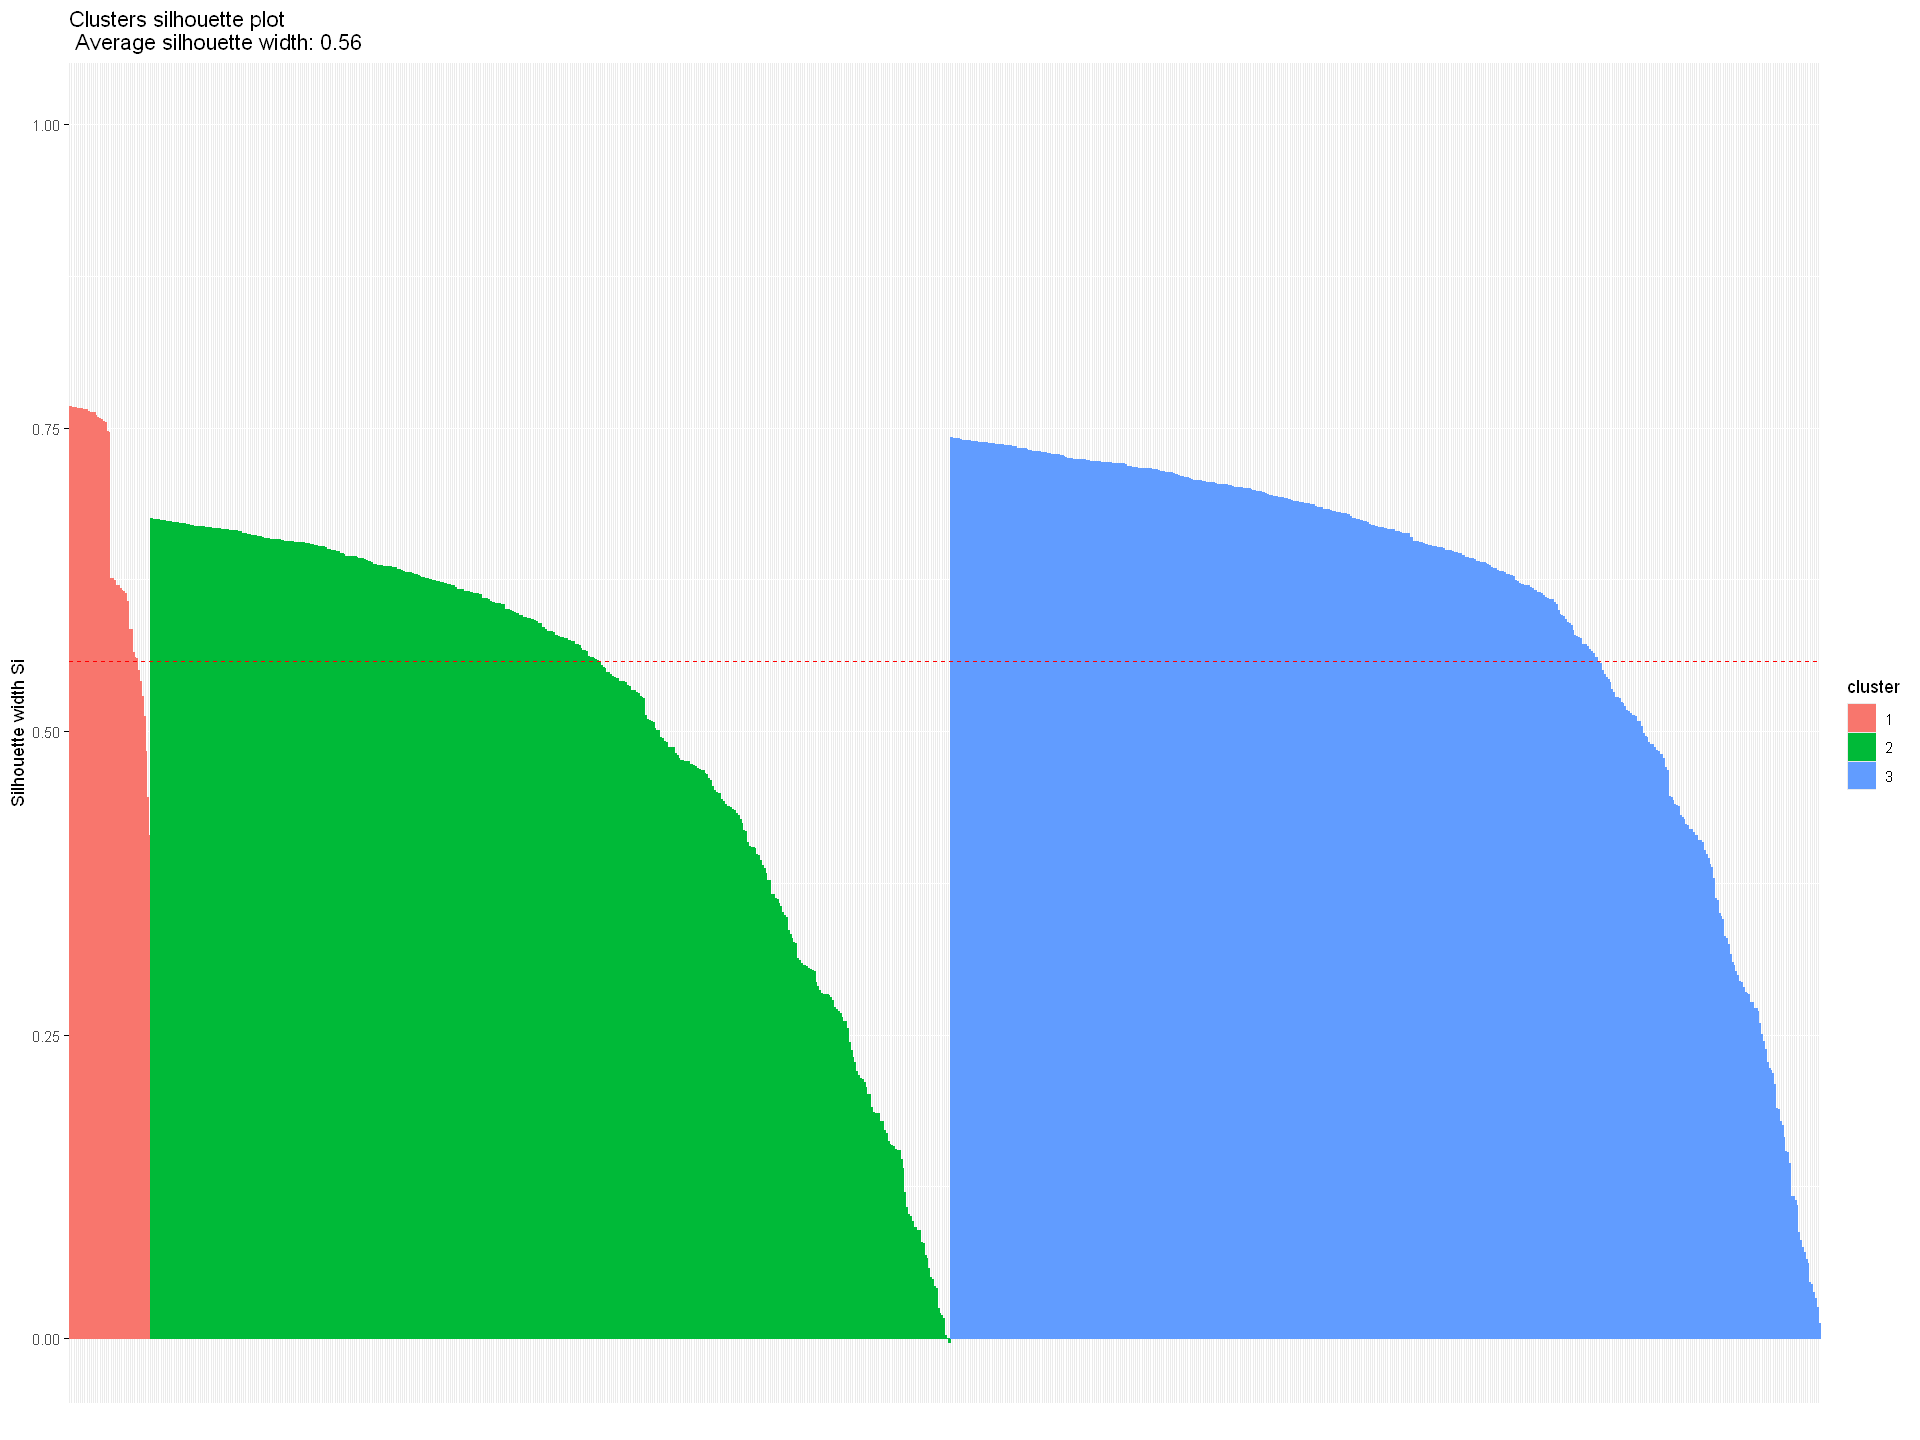

In [61]:
# Silhouette Score Analysis 

library(cluster)
library(factoextra)  # for fviz_silhouette

#  Calculate distance matrix
dist_matrix <- dist(clustering_data_scaled)

# Apply K-means clustering with 3 clusters
set.seed(123)
km <- kmeans(clustering_data_scaled, centers = 3, nstart = 25)

# Perform silhouette analysis
sil <- silhouette(km$cluster, dist_matrix)

# Calculate and print average silhouette width
avg_sil_width <- mean(sil[, 3])
cat("Average Silhouette Width:", round(avg_sil_width, 4), "\n")

# Interpret silhouette score
if (avg_sil_width >= 0.5) {
  cat(" Interpretation: Clusters are well-separated and have a strong structure.\n")
} else if (avg_sil_width >= 0.25 && avg_sil_width < 0.5) {
  cat(" Interpretation: Clusters are reasonable but may have some overlap.\n")
} else if (avg_sil_width < 0.25) {
  cat(" Interpretation: Clusters are weak or overlapping. Consider reviewing the features or changing the number of clusters.\n")
}

#  Visualize silhouette plot
fviz_silhouette(sil)


In [29]:
# Hopkins Statisic

library(clustertend)
library(hopkins)
# Set seed for reproducibility
set.seed(123)

# Compute Hopkins statistic 
hopkins_stat <- hopkins(clustering_data_scaled)

# Extract value
H <- hopkins_stat

# Print Hopkins statistic
cat("Hopkins Statistic:", round(H, 4), "\n")

# Interpret the result
if (H <= 0.5) {
  cat(" Interpretation: The dataset does not have a strong clustering tendency. Likely randomly distributed.\n")
} else if (H > 0.5 & H < 0.75) {
  cat(" Interpretation: The clustering tendency is moderate. Further validation needed.\n")
} else {
  cat(" Interpretation: Strong clustering tendency present. Suitable for clustering.\n")
}


Package `clustertend` is deprecated.  Use package `hopkins` instead.

Warning message:
"package 'hopkins' was built under R version 4.4.3"

Attaching package: 'hopkins'


The following object is masked from 'package:clustertend':

    hopkins




Hopkins Statistic: 0.9995 
 Interpretation: Strong clustering tendency present. Suitable for clustering.


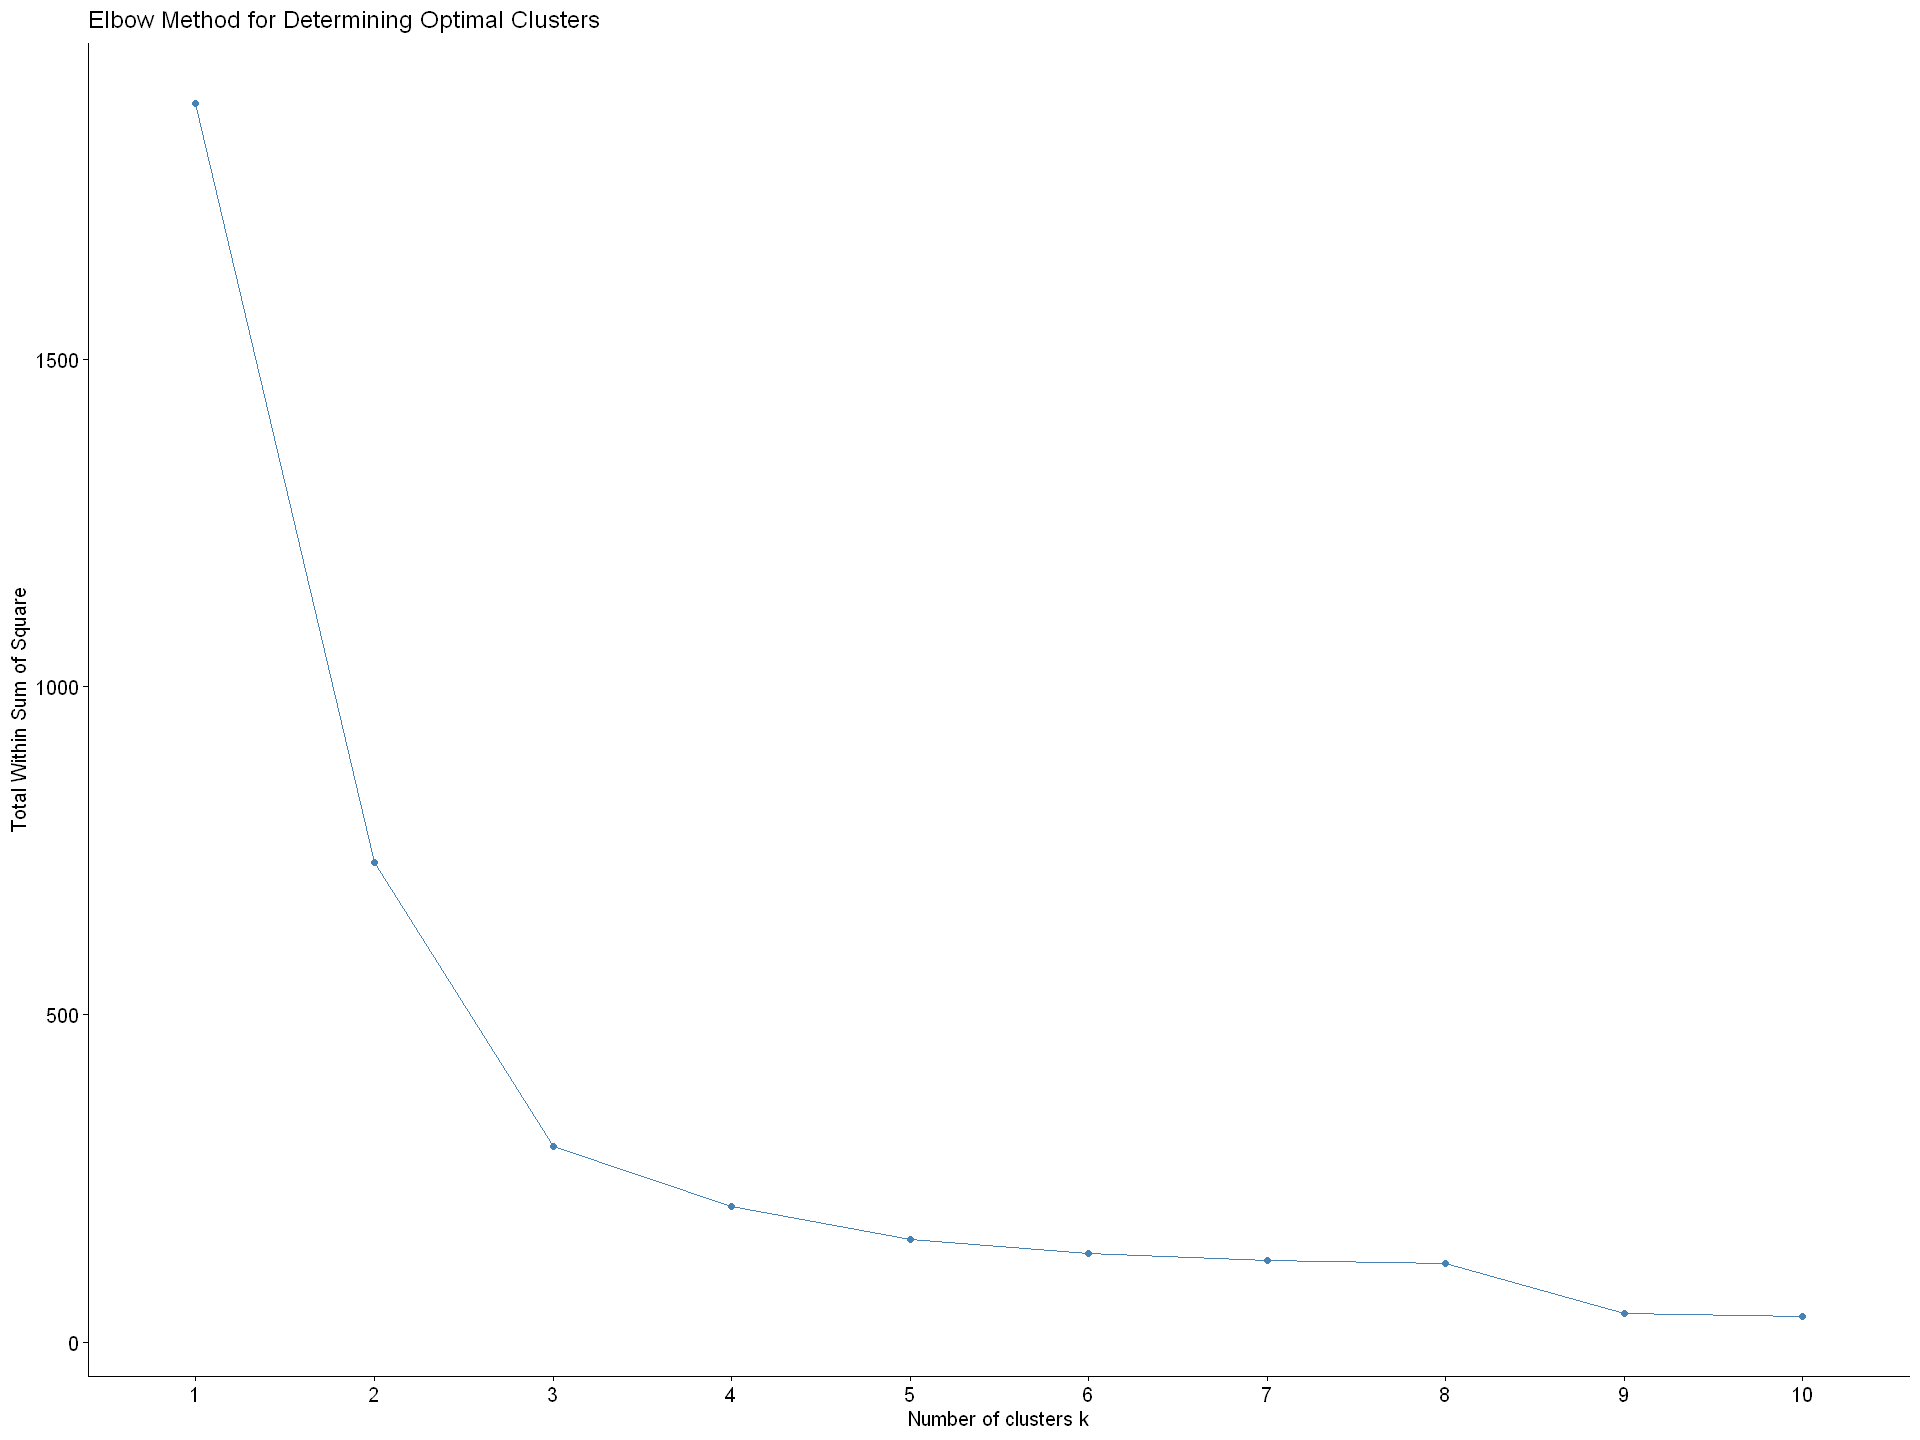

In [62]:
# Elbow method

library(factoextra)

# Elbow Method
fviz_nbclust(clustering_data_scaled, kmeans, method = "wss") +
  labs(title = "Elbow Method for Determining Optimal Clusters")

## Clustering Predictive Modelling

Warning message:
"package 'fpc' was built under R version 4.4.3"


KMeans - Clusters: 3 
Number of rows in each cluster:

  1   2   3 
 44 432 470 
KMeans - Avg Silhouette: 0.5579456 
KMeans - Calinski-Harabasz Index: 2517.465 


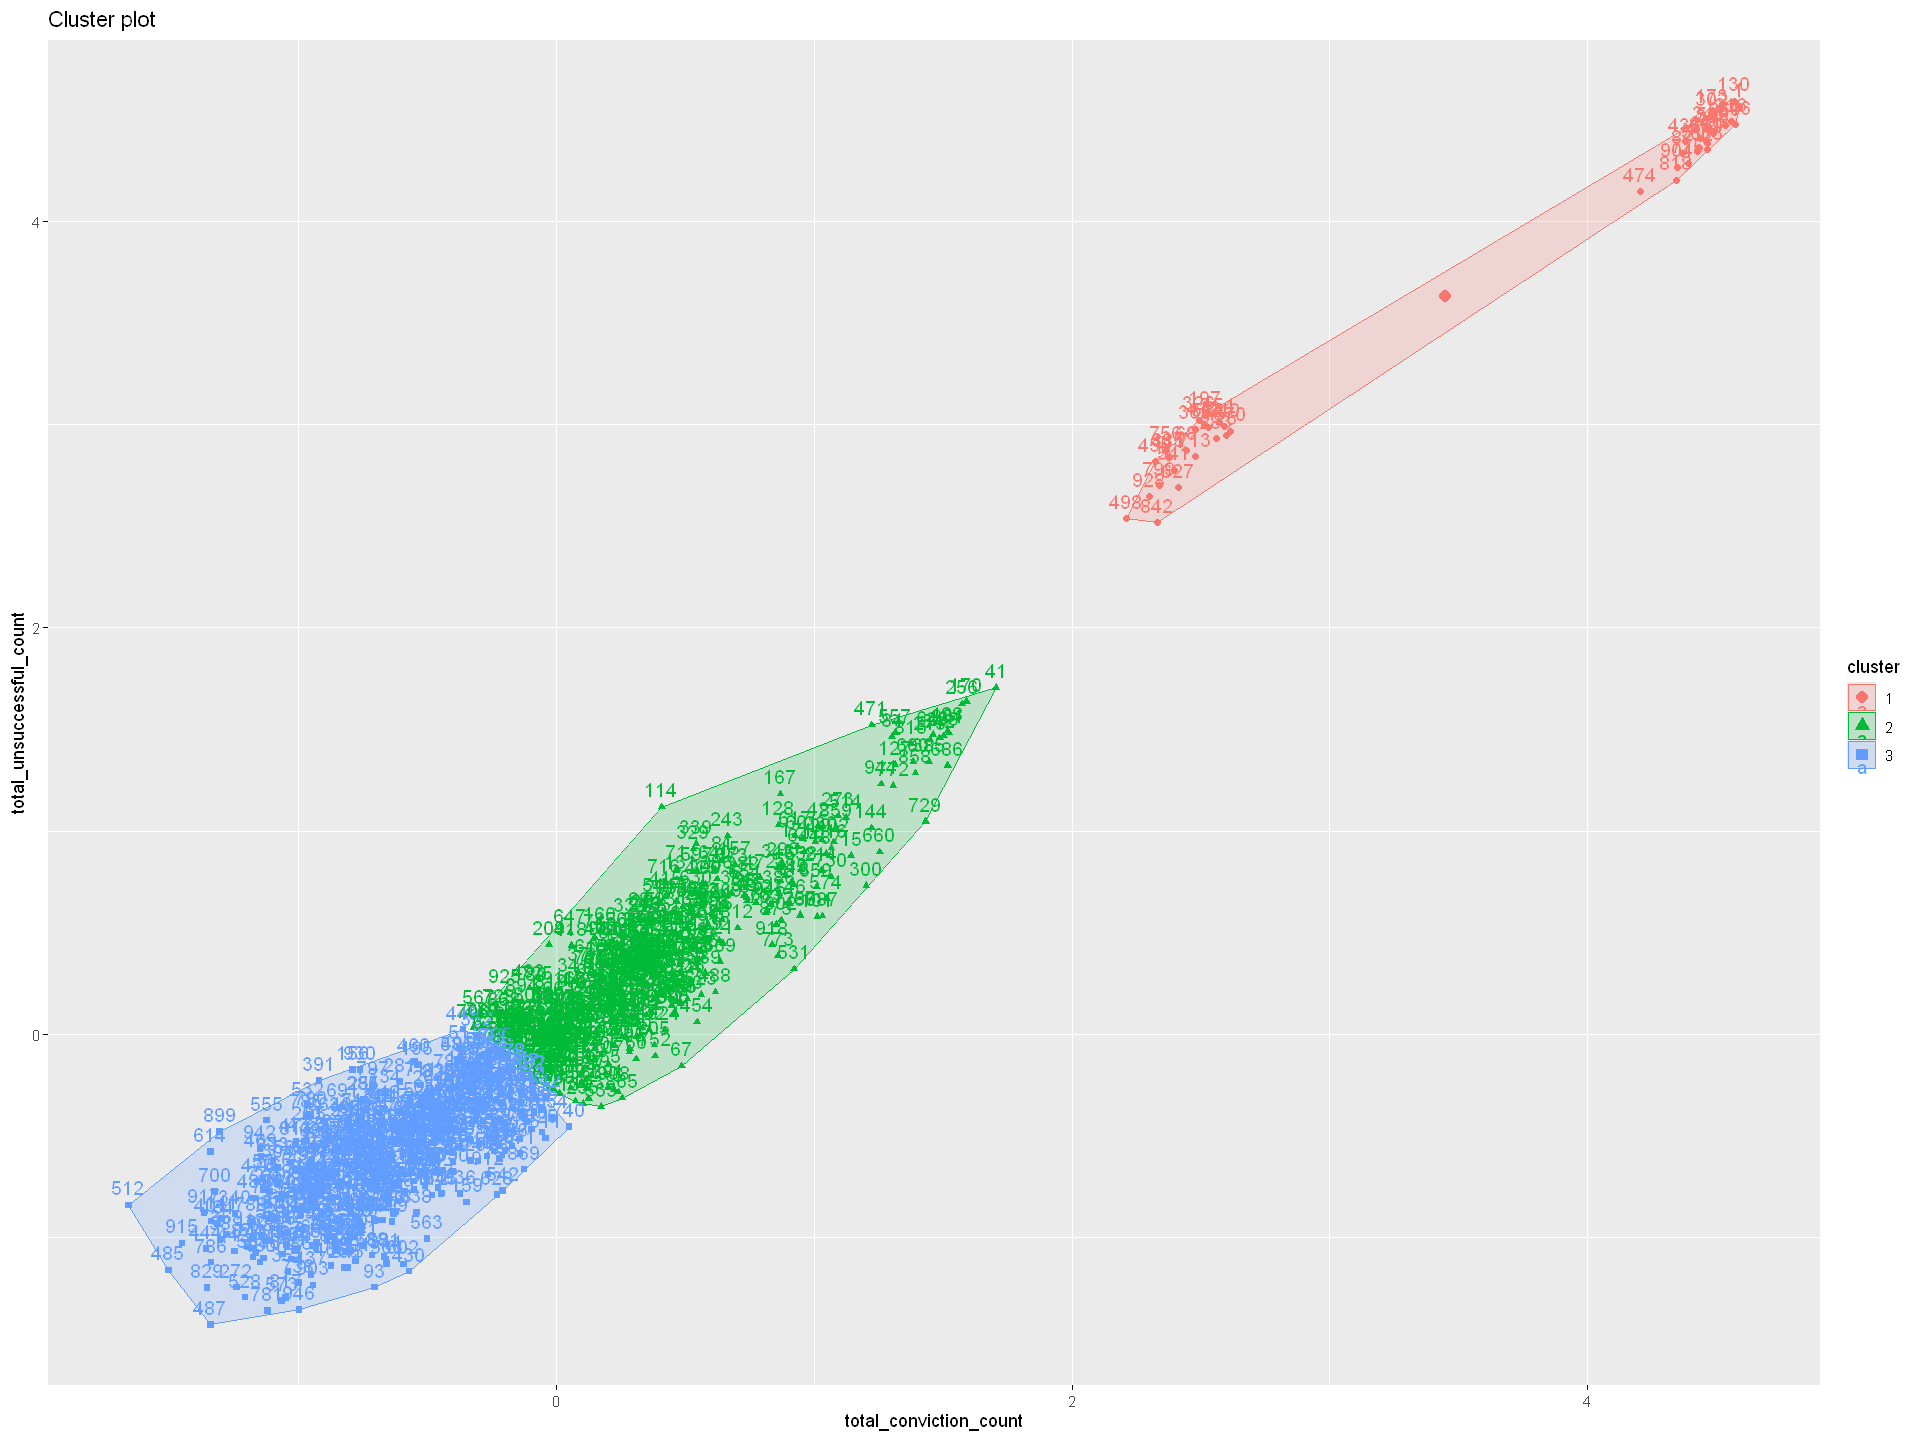

In [63]:
# K-means clustering

library(cluster)
library(fpc)

# Set seed for reproducibility
set.seed(123)

# KMeans model
kmeans_model <- kmeans(clustering_data_scaled, centers = 3, nstart = 25)
fviz_cluster(kmeans_model, data = clustering_data_scaled)

# Print number of clusters
cat("KMeans - Clusters:", length(unique(kmeans_model$cluster)), "\n")

# Cluster size count
cluster_counts <- table(kmeans_model$cluster)
cat("Number of rows in each cluster:\n")
print(cluster_counts)

# Evaluation: Silhouette analysis
sil_kmeans <- silhouette(kmeans_model$cluster, dist(clustering_data_scaled))
cat("KMeans - Avg Silhouette:", mean(sil_kmeans[, 3]), "\n")

# Calinski-Harabasz Index
calinski_harabasz <- cluster.stats(dist(clustering_data_scaled), kmeans_model$cluster)$ch
cat("KMeans - Calinski-Harabasz Index:", calinski_harabasz, "\n")


Hierarchical - Clusters: 3 
Number of rows in each cluster:
clusters_hc
  1   2   3 
 44 516 386 
Hierarchical - Avg Silhouette: 0.5360206 
Hierarchical - Calinski-Harabasz Index: 2323.611 


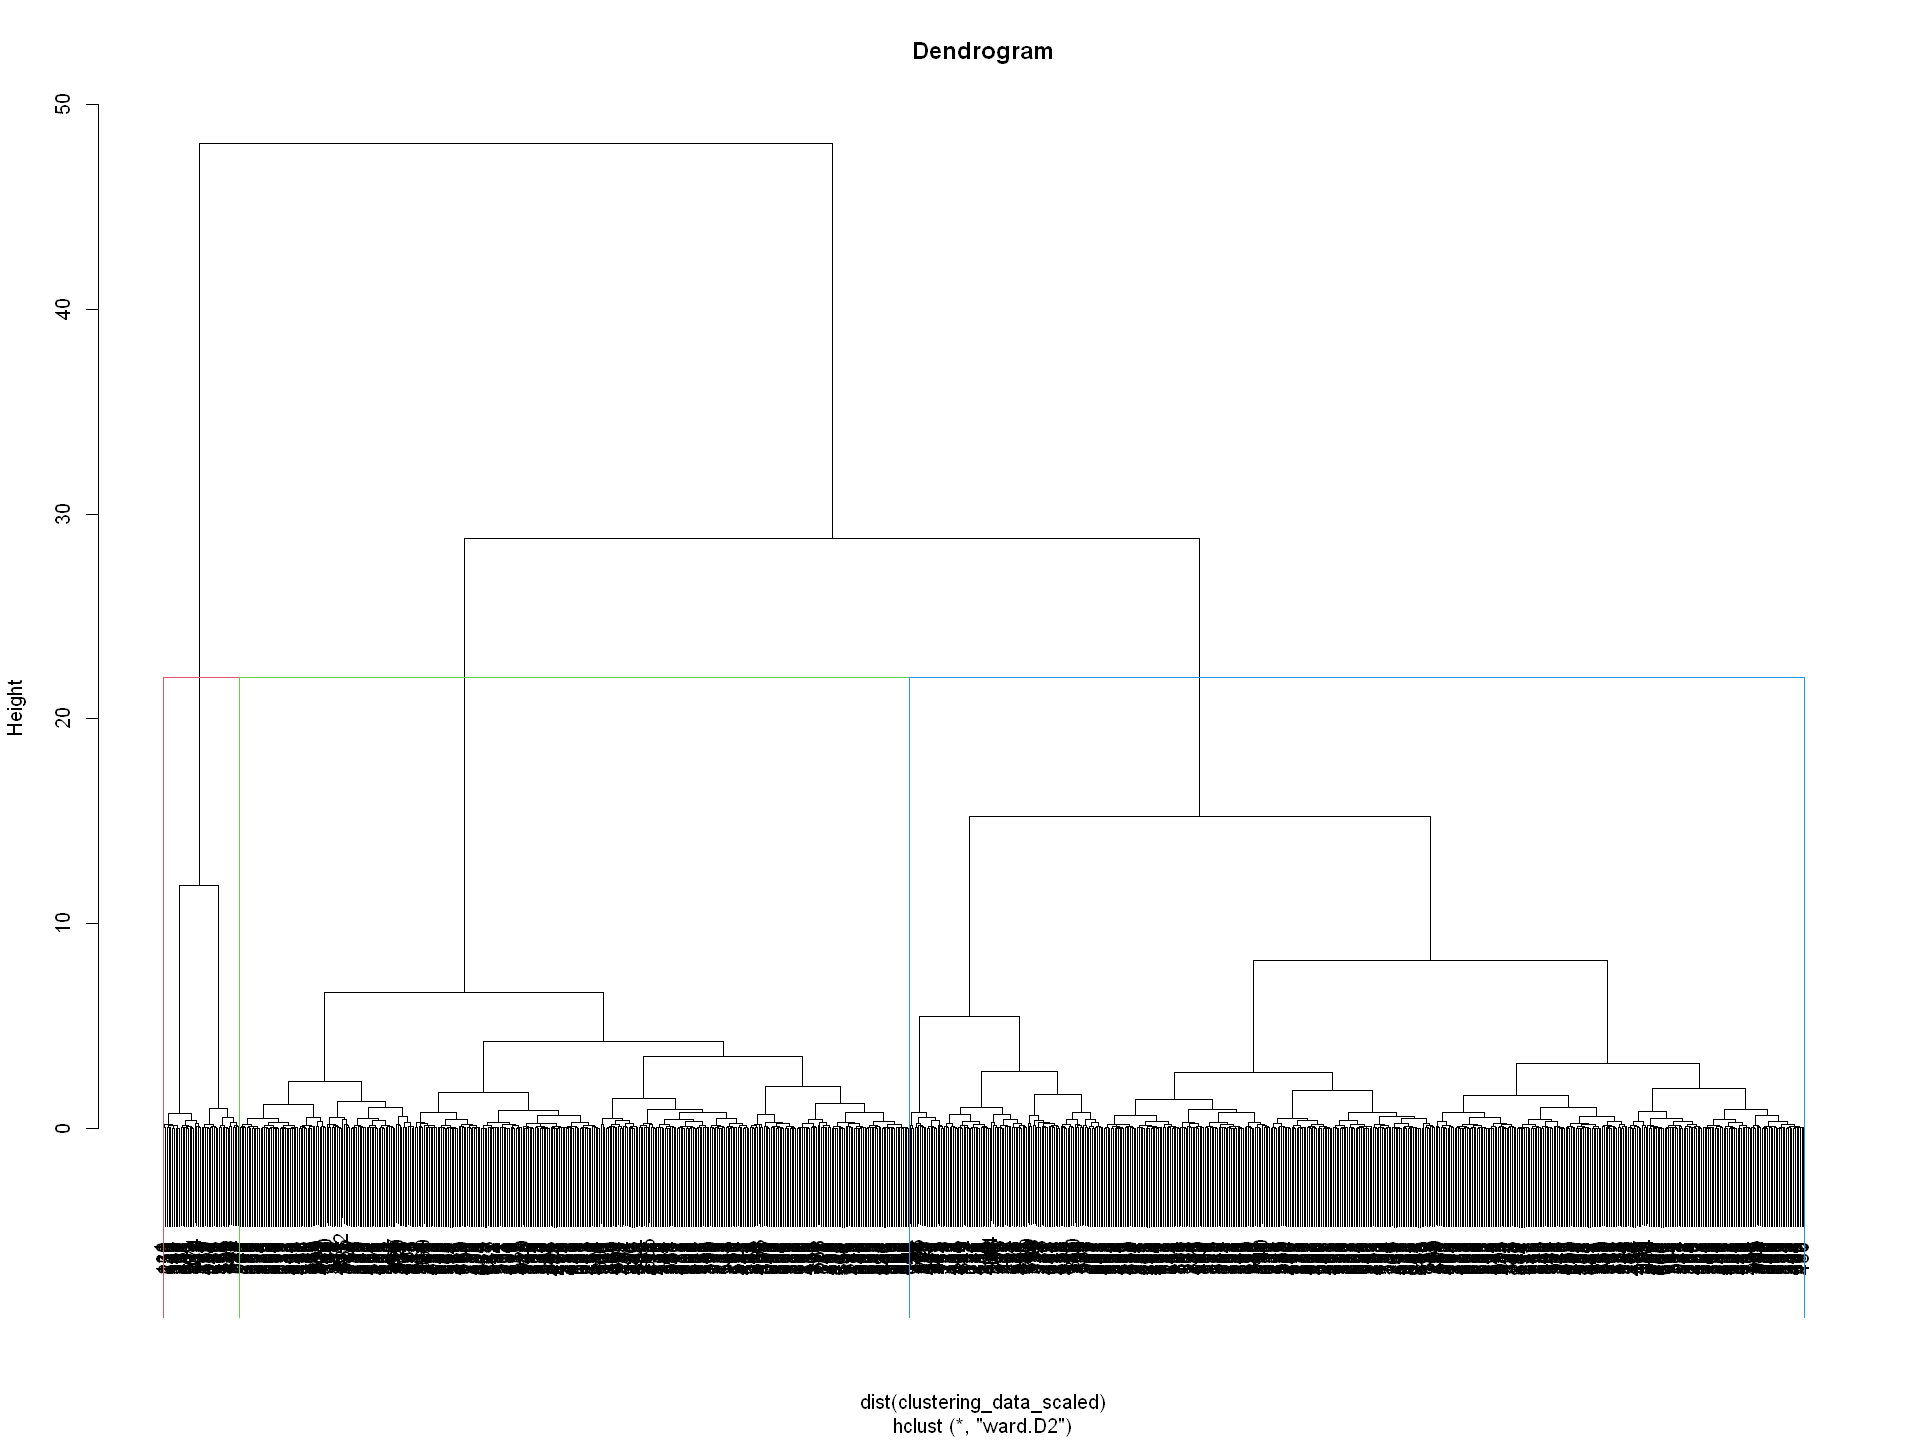

In [64]:
# Hierarchical Clustering

# Compute hierarchical clustering
hc <- hclust(dist(clustering_data_scaled), method = "ward.D2")

# Plot dendrogram with rectangles for k clusters
plot(hc, main = "Dendrogram")
rect.hclust(hc, k = 3, border = 2:4)

# Cut the tree to form 3 clusters
clusters_hc <- cutree(hc, k = 3)

# Print number of clusters
cat("Hierarchical - Clusters:", length(unique(clusters_hc)), "\n")

# Count rows in each cluster
cluster_counts_hc <- table(clusters_hc)
cat("Number of rows in each cluster:\n")
print(cluster_counts_hc)

# Silhouette analysis
sil_hc <- silhouette(clusters_hc, dist(clustering_data_scaled))
cat("Hierarchical - Avg Silhouette:", mean(sil_hc[, 3]), "\n")

# Calinski-Harabasz Index for Hierarchical Clustering
calinski_harabasz_hc <- cluster.stats(dist(clustering_data_scaled), clusters_hc)$ch
cat("Hierarchical - Calinski-Harabasz Index:", calinski_harabasz_hc, "\n")


Warning message:
"package 'mclust' was built under R version 4.4.3"
Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: 'mclust'


The following object is masked from 'package:purrr':

    map




---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 5
components: 

 log-likelihood   n df       BIC       ICL
      -787.8287 946 29 -1774.372 -2007.707

Clustering table:
  1   2   3   4   5 
 22 547 315  40  22 

GMM - Clusters: 5 
Number of rows in each cluster:

  1   2   3   4   5 
 22 547 315  40  22 
GMM - Avg Silhouette: 0.4635 
GMM - Calinski-Harabasz Index: 2027.891 


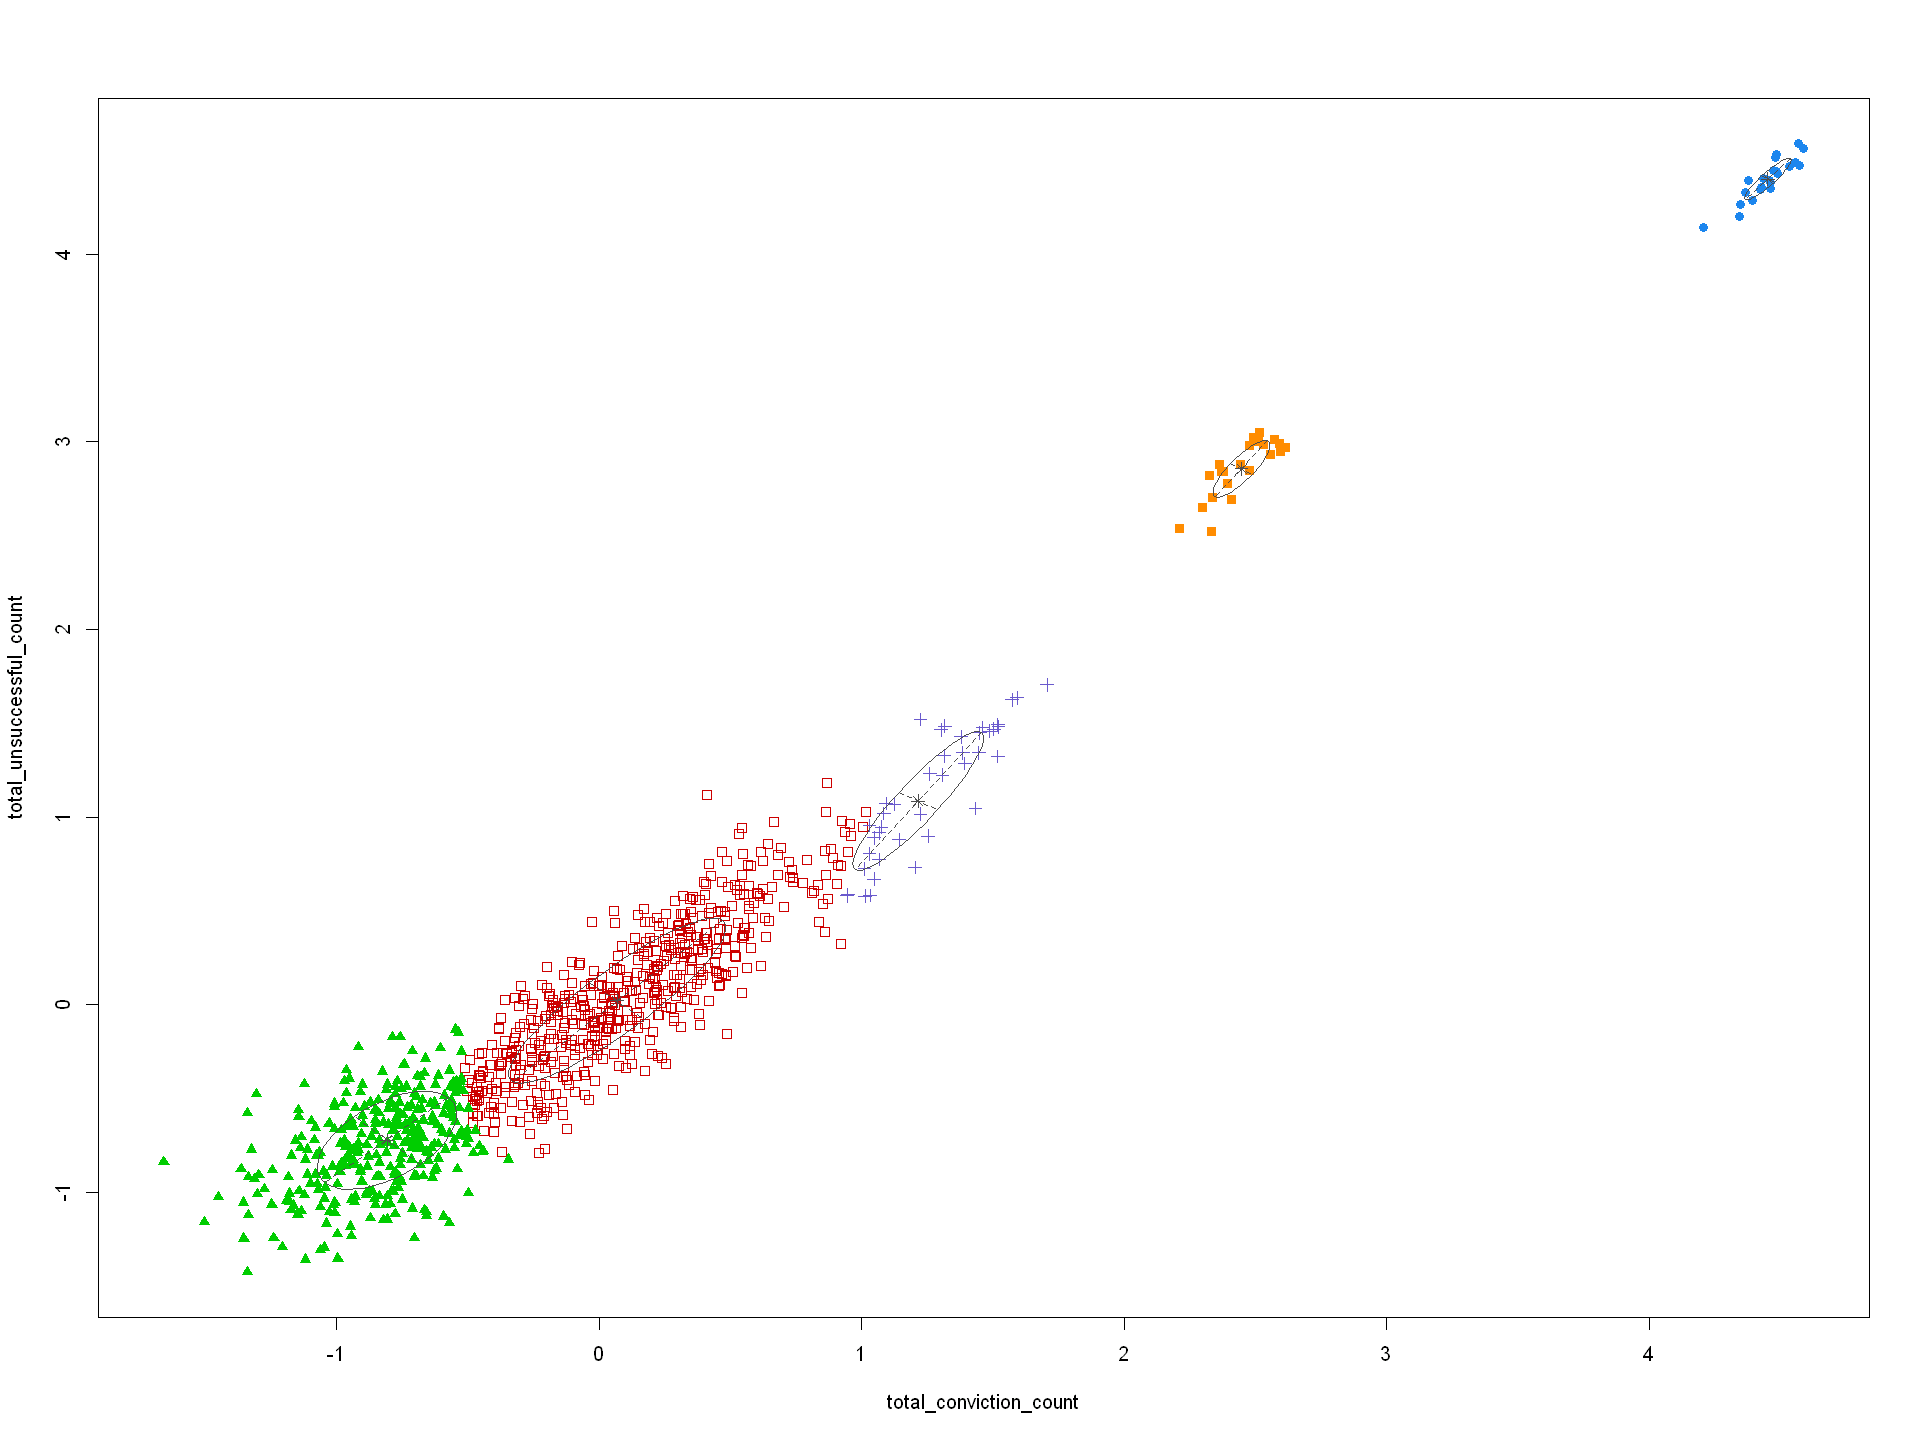

In [65]:
# Gaussian Mixture Model
library(mclust)
library(cluster)

# Fit GMM model
gmm_model <- Mclust(clustering_data_scaled)

# Summary and classification plot
summary(gmm_model)
plot(gmm_model, what = "classification")

# Number of clusters
num_clusters_gmm <- length(unique(gmm_model$classification))
cat("GMM - Clusters:", num_clusters_gmm, "\n")

# Count of rows in each cluster
cluster_counts_gmm <- table(gmm_model$classification)
cat("Number of rows in each cluster:\n")
print(cluster_counts_gmm)

# Silhouette Score
sil_gmm <- silhouette(gmm_model$classification, dist(clustering_data_scaled))
cat("GMM - Avg Silhouette:", round(mean(sil_gmm[, 3]), 4), "\n")

# Calinski-Harabasz Index for GMM
calinski_harabasz_gmm <- cluster.stats(dist(clustering_data_scaled), gmm_model$classification)$ch
cat("GMM - Calinski-Harabasz Index:", calinski_harabasz_gmm, "\n")


Agglomerative Clustering - Clusters: 3 
Number of rows in each cluster:
clusters
  1   2   3 
 44 199 703 
Agglomerative - Avg Silhouette: 0.492167 
Agglomerative - Calinski-Harabasz Index: 1903.734 


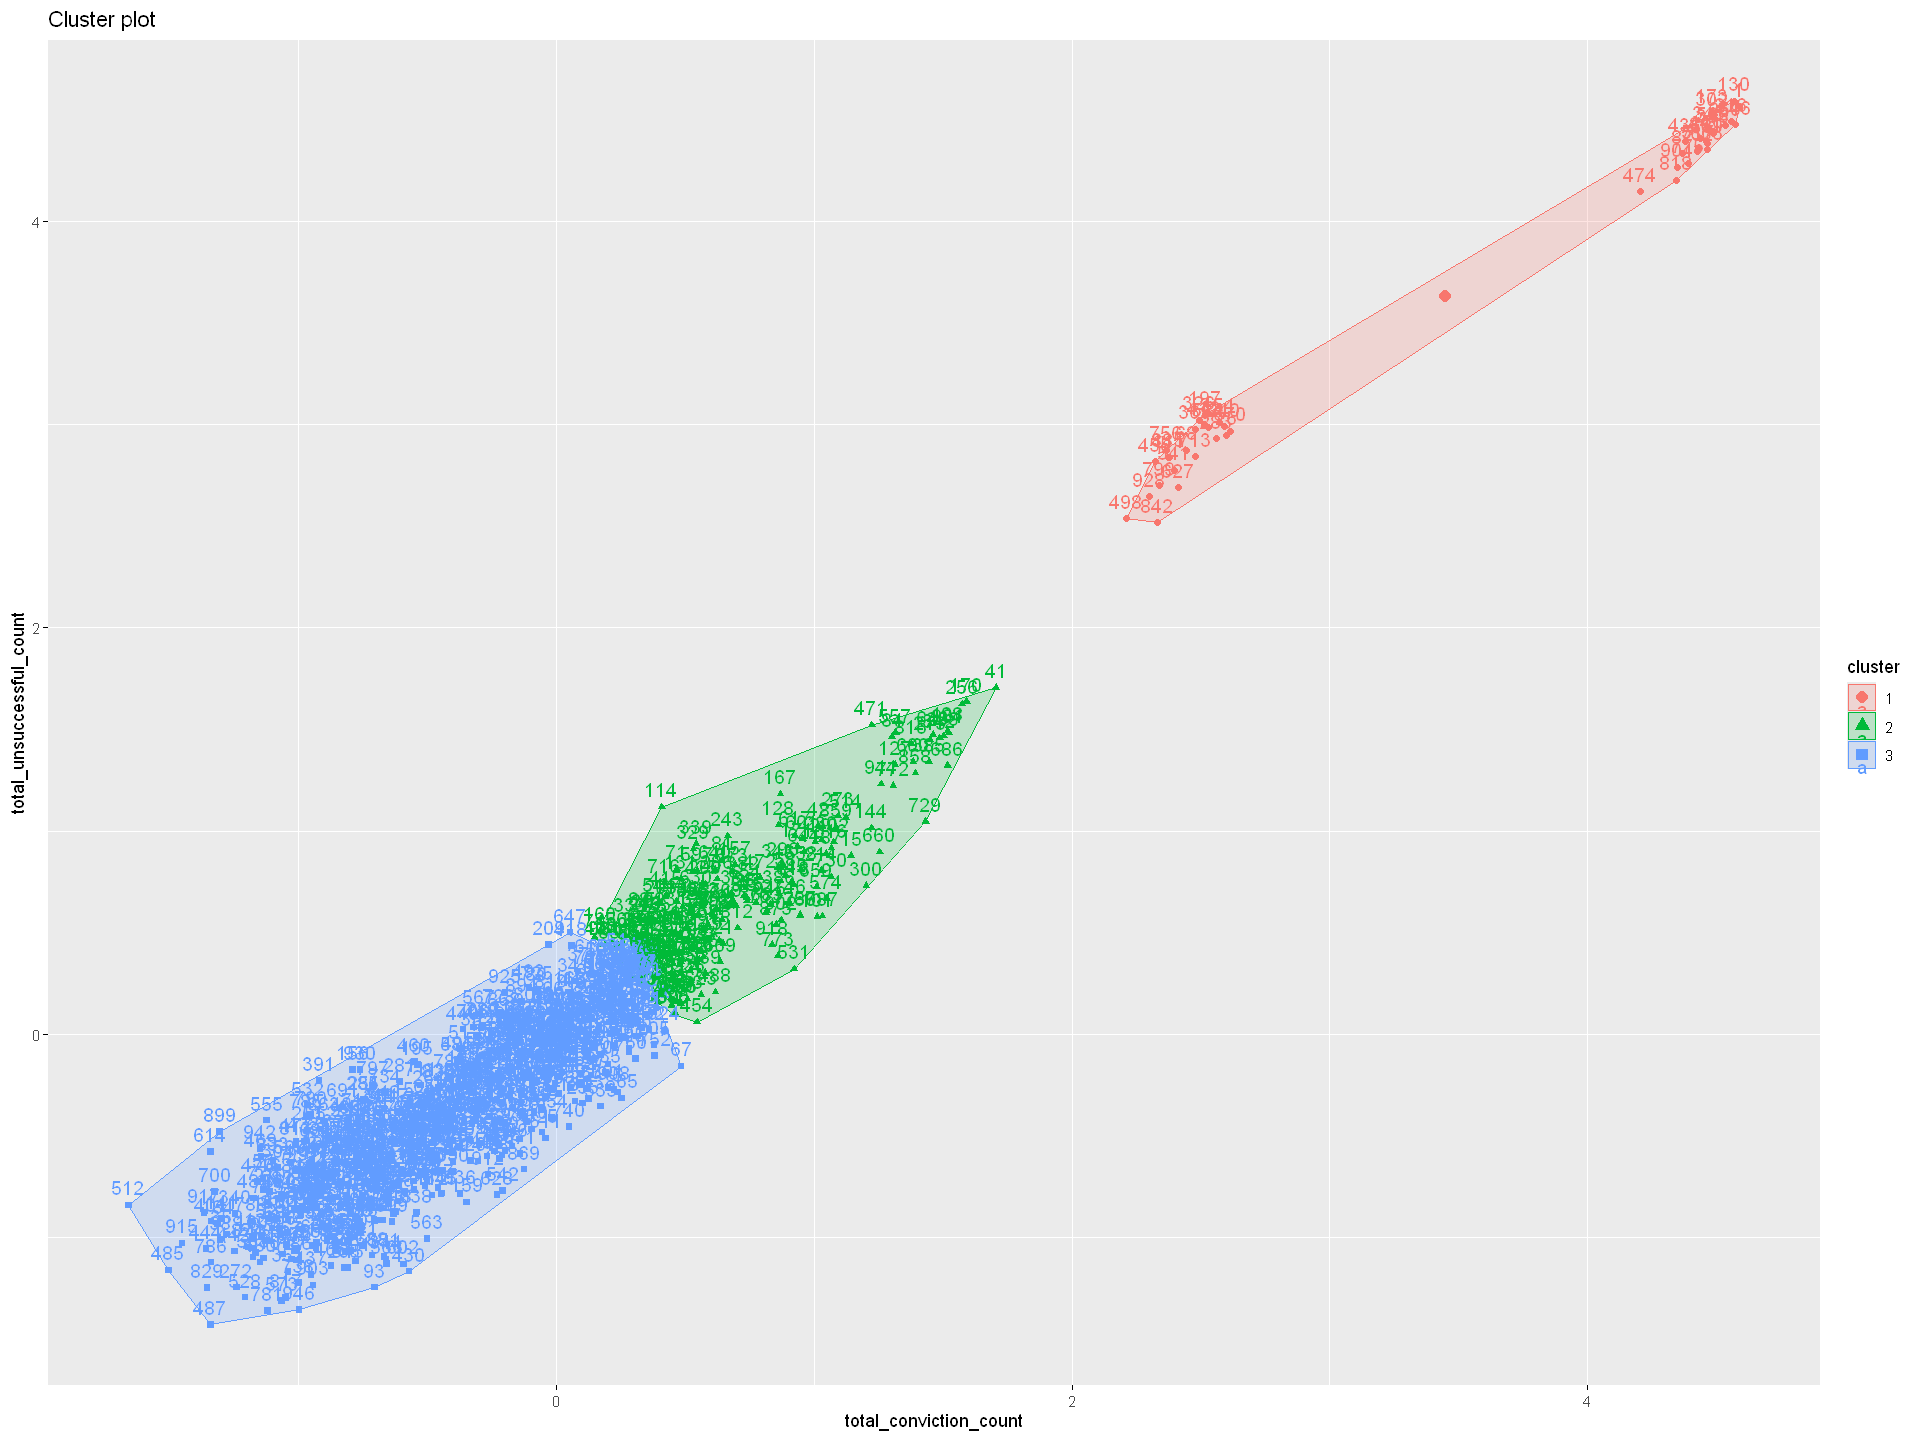

In [66]:
# Agglomerative Hierarchical Clustering

# load necessary packages
library(cluster)
library(fpc)
library(factoextra)

# Set seed for reproducibility
set.seed(123)

# Compute the distance matrix (Euclidean distance is commonly used)
dist_matrix <- dist(clustering_data_scaled)

# Perform Agglomerative Hierarchical Clustering using complete linkage
agglo_model <- hclust(dist_matrix, method = "complete")

# Cut the dendrogram to form clusters (e.g., cutting at 3 clusters)
clusters <- cutree(agglo_model, k = 3)

# Visualize clusters
fviz_cluster(list(data = clustering_data_scaled, cluster = clusters))

# Print number of clusters
cat("Agglomerative Clustering - Clusters:", length(unique(clusters)), "\n")

# Cluster size count
cluster_counts <- table(clusters)
cat("Number of rows in each cluster:\n")
print(cluster_counts)

# Evaluation: Silhouette analysis
sil_agglo <- silhouette(clusters, dist(clustering_data_scaled))
cat("Agglomerative - Avg Silhouette:", mean(sil_agglo[, 3]), "\n")

# Calinski-Harabasz Index
calinski_harabasz <- cluster.stats(dist(clustering_data_scaled), clusters)$ch
cat("Agglomerative - Calinski-Harabasz Index:", calinski_harabasz, "\n")



# CLASSIFICATION

### Hypothesis:

**" The distribution of convictions and unsuccessful cases across crime types can effectively differentiate categories into different legal success categories (Low, Medium, High)."**

H₀ (Null): Offense-specific conviction and unsuccessful rates do not significantly classify categories into different success categories.

H₁ (Alt): Offense-specific conviction and unsuccessful rates significantly contribute to the classification of success categories.

In [67]:
# Data Preparaton

#  Create Target Feature and Clean Data
data_clean <- data_featured %>%
  mutate(conviction_rate_percent = (total_conviction_count / total_crime_cases) * 100,
         success_category = case_when(
           conviction_rate_percent < 60 ~ "Low",
           conviction_rate_percent >= 60 & conviction_rate_percent <= 70 ~ "Medium",
           conviction_rate_percent > 70 ~ "High"
         )) %>%
  filter(!is.na(success_category)) %>%

  # Remove potential data leakage and irrelevant columns
  select(-Areas, -total_conviction_count, -total_unsuccessful_count, -total_crime_cases) %>%
  # Convert target to factor
  mutate(success_category = as.factor(success_category))


# Select Relevant Features for Modeling 
selected_features <- c(
  "number_of_burglary_convictions",
  "number_of_theft_and_handling_convictions",
  "number_of_sexual_offences_convictions",
  "number_of_drugs_offences_convictions",
  "success_category"
)

data_selected <- data_clean[, selected_features]

#  Split the Data into Training and Testing Sets

set.seed(42)
split_index <- createDataPartition(data_selected$success_category, p = 0.8, list = FALSE)
train_data <- data_selected[split_index, ]
test_data <- data_selected[-split_index, ]

#  Normalize Numeric Features (Centering and Scaling) 

scaler <- preProcess(train_data[, -ncol(train_data)], method = c("center", "scale"))

train_scaled <- predict(scaler, train_data[, -ncol(train_data)])
test_scaled <- predict(scaler, test_data[, -ncol(test_data)])

# Add target variable back after scaling
train_scaled$success_category <- train_data$success_category
test_scaled$success_category <- test_data$success_category

# Final Output Preview 
str(train_scaled)


tibble [895 × 5] (S3: tbl_df/tbl/data.frame)
 $ number_of_burglary_convictions          : num [1:895] 4.236 0.108 -0.804 -0.171 0.147 ...
 $ number_of_theft_and_handling_convictions: num [1:895] 4.646 0.4 -0.769 -0.178 0.243 ...
 $ number_of_sexual_offences_convictions   : num [1:895] 3.7987 0.6469 -0.3446 -0.0438 0.3646 ...
 $ number_of_drugs_offences_convictions    : num [1:895] 4.212 0.39 -0.801 -0.768 0.568 ...
 $ success_category                        : Factor w/ 3 levels "High","Low","Medium": 2 3 3 3 3 3 3 3 2 3 ...


## Hypothesis Testing for Classification

In [68]:
# Multivariate ANOVA (MANOVA)

# Define features for MANOVA
manova_features <- c("number_of_burglary_convictions",
                     "number_of_theft_and_handling_convictions",
                     "number_of_sexual_offences_convictions",
                     "number_of_drugs_offences_convictions")

# Build MANOVA formula dynamically
manova_formula <- as.formula(
  paste("cbind(", paste(manova_features, collapse = ", "), ") ~ success_category")
)

# Run MANOVA
manova_model <- manova(manova_formula, data = train_data)

# Summary using Wilks' Lambda
manova_summary <- summary(manova_model, test = "Wilks")
print(manova_summary)

# Extract test statistics
wilks_stats <- manova_summary$stats
p_value <- wilks_stats[1, "Pr(>F)"]
wilks_lambda <- wilks_stats[1, "Wilks"]

# Interpretation
cat("\nInterpretation:\n")
cat("Wilks' Lambda:", round(wilks_lambda, 4), "\n")
cat("p-value:", round(p_value, 4), "\n")

if (p_value < 0.05) {
  cat("\n Result: The p-value is less than 0.05, so we reject the null hypothesis (H₀).\n")
  cat("Conclusion: At least one of the offense-related features significantly differs across success categories.\n")
  cat("This implies that variation in crime types is likely related to how areas are classified by success level.\n")
} else {
  cat("Result: The p-value is greater than or equal to 0.05, so we fail to reject the null hypothesis (H₀).\n")
  cat("Conclusion: There is no statistically significant difference in the selected crime features across success categories.\n")
  cat("These features may not contribute meaningfully to distinguishing area success classifications.\n")
}



                  Df   Wilks approx F num Df den Df    Pr(>F)    
success_category   2 0.50814   89.533      8   1778 < 2.2e-16 ***
Residuals        892                                             
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Interpretation:
Wilks' Lambda: 0.5081 
p-value: 0 

 Result: The p-value is less than 0.05, so we reject the null hypothesis (H₀).
Conclusion: At least one of the offense-related features significantly differs across success categories.
This implies that variation in crime types is likely related to how areas are classified by success level.


In [69]:
# Chi-Square Tests on All Selected Columns

# Define selected numeric features to test
crime_features <- c("number_of_burglary_convictions",
                    "number_of_theft_and_handling_convictions",
                    "number_of_sexual_offences_convictions",
                    "number_of_drugs_offences_convictions")

# Loop through each feature and run Chi-square test with interpretation
for (feature in crime_features) {
  
  cat("\n          ==================          \n")
  cat("Chi-Square Test for:", feature, "\n")
  cat("           ==================           \n")
  
  # Bin the numeric variable into quartiles
  binned_var <- cut(
    train_data[[feature]],
    breaks = quantile(train_data[[feature]], probs = seq(0, 1, 0.25), na.rm = TRUE),
    include.lowest = TRUE
  )
  
  # Create contingency table
  contingency_table <- table(binned_var, train_data$success_category)
  
  # Run Chi-square test
  chi_result <- chisq.test(contingency_table)
  print(chi_result)
  
  # Interpretation
  cat("\nInterpretation:\n")
  cat("Chi-squared statistic:", round(chi_result$statistic, 4), "\n")
  cat("Degrees of freedom:", chi_result$parameter, "\n")
  cat("p-value:", round(chi_result$p.value, 4), "\n")
  
  if (chi_result$p.value < 0.05) {
    cat("\n Result: The p-value is less than 0.05, so we reject the null hypothesis (H₀).\n")
    cat("Conclusion: This feature (", feature, ") shows a statistically significant association with success category.\n")
  } else {
    cat("Result: The p-value is greater than or equal to 0.05, so we fail to reject the null hypothesis (H₀).\n")
    cat("Conclusion: This feature (", feature, ") does not show a significant relationship with success category.\n")
  }
}



Chi-Square Test for: number_of_burglary_convictions 

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 320.72, df = 6, p-value < 2.2e-16


Interpretation:
Chi-squared statistic: 320.7232 
Degrees of freedom: 6 
p-value: 0 

 Result: The p-value is less than 0.05, so we reject the null hypothesis (H₀).
Conclusion: This feature ( number_of_burglary_convictions ) shows a statistically significant association with success category.

Chi-Square Test for: number_of_theft_and_handling_convictions 

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 356.15, df = 6, p-value < 2.2e-16


Interpretation:
Chi-squared statistic: 356.1506 
Degrees of freedom: 6 
p-value: 0 

 Result: The p-value is less than 0.05, so we reject the null hypothesis (H₀).
Conclusion: This feature ( number_of_theft_and_handling_convictions ) shows a statistically significant association with success category.

Chi-Square Test for: number_of_sexual_offences_convictions 

	Pearson's Chi-squ

## Classification Predictive Modelling

In [70]:
# Classification report heatmap and Confusion Matrix 

# Required Libraries
library(caret)
library(ggplot2)
library(reshape2)
library(gridExtra)  # For side-by-side plotting

# Combined Visual Function
plot_classification_summary <- function(predictions, actuals, model_name = "Model") {
  
  # Generate confusion matrix
  cm <- confusionMatrix(predictions, actuals)
  by_class <- as.data.frame(cm$byClass)
  
  # Accuracy
  accuracy <- round(cm$overall["Accuracy"], 2)
  
  # Define class labels (update this if your factor levels are different)
  class_labels <- c("High", "Low", "Medium")

  # Multiclass case (assuming class_labels length matches your classes)
  report_df <- data.frame(
    Metric = c("precision", "recall", "f1-score"),
    t(round(t(by_class[, c("Precision", "Recall", "F1")]), 2))
  )
  report_df$Accuracy <- accuracy
  report_df$MacroAvg <- round(colMeans(by_class[, c("Precision", "Recall", "F1")], na.rm = TRUE), 2)
  
  # Classification Report Heatmap
  melted_report <- melt(report_df, id.vars = "Metric")

  # Assign class label names to match report_df columns
  col_names <- colnames(report_df)
  class_col_indices <- 2:(1 + length(class_labels))
  names_map <- setNames(class_labels, col_names[class_col_indices])
  
  heatmap1 <- ggplot(melted_report, aes(x = variable, y = Metric, fill = value)) +
    geom_tile(color = "white") +
    geom_text(aes(label = value), size = 7, fontface = "bold") +
    scale_fill_gradient(low = "#FFF5EB", high = "#E6550D") +
    labs(
      title = paste(model_name, "- Classification Report Heatmap"),
      x = NULL, y = NULL
    ) +
    scale_x_discrete(labels = function(x) ifelse(x %in% names(names_map), names_map[x], x)) +
    theme_minimal(base_size = 13)

  # Confusion Matrix Heatmap
  cm_df <- as.data.frame(cm$table)
  colnames(cm_df) <- c("Predicted", "Actual", "Freq")

  heatmap2 <- ggplot(cm_df, aes(x = Predicted, y = Actual, fill = Freq)) +
    geom_tile(color = "white") +
    geom_text(aes(label = Freq), size = 7, fontface = "bold") +
    scale_fill_gradient(low = "#FFF5EB", high = "#E6550D") +
    labs(
      title = paste(model_name, "- Confusion Matrix"),
      x = "Predicted Class", y = "Actual Class"
    ) +
    theme_minimal(base_size = 13)

  # Display side by side
  grid.arrange(heatmap1, heatmap2, ncol = 2)
}


Warning message:
"package 'gridExtra' was built under R version 4.4.3"

Attaching package: 'gridExtra'


The following object is masked from 'package:randomForest':

    combine


The following object is masked from 'package:dplyr':

    combine




In [71]:
# Logistic Regression

log_model <- train(success_category ~ ., data = train_scaled, method = "multinom", trControl = trainControl(method = "cv", number = 5))
log_pred <- predict(log_model, test_scaled)

# Confusion matrix
confusionMatrix(log_pred, test_scaled$success_category)


# weights:  18 (10 variable)
initial  value 787.705011 
iter  10 value 276.324998
final  value 273.583425 
converged
# weights:  18 (10 variable)
initial  value 787.705011 
iter  10 value 281.151322
final  value 277.605371 
converged
# weights:  18 (10 variable)
initial  value 787.705011 
iter  10 value 276.330410
final  value 273.587833 
converged
# weights:  18 (10 variable)
initial  value 786.606399 
iter  10 value 286.629918
final  value 284.705923 
converged
# weights:  18 (10 variable)
initial  value 786.606399 
iter  10 value 291.804083
final  value 288.856442 
converged
# weights:  18 (10 variable)
initial  value 786.606399 
iter  10 value 286.635506
final  value 284.710478 
converged
# weights:  18 (10 variable)
initial  value 785.507786 
iter  10 value 269.948396
final  value 268.546162 
converged
# weights:  18 (10 variable)
initial  value 785.507786 
iter  10 value 276.405779
iter  20 value 273.323472
iter  20 value 273.323472
iter  20 value 273.323472
final  value 273.3234

Confusion Matrix and Statistics

          Reference
Prediction High Low Medium
    High      4   0      4
    Low       0  16      2
    Medium   19  10    168

Overall Statistics
                                          
               Accuracy : 0.843           
                 95% CI : (0.7885, 0.8882)
    No Information Rate : 0.7803          
    P-Value [Acc > NIR] : 0.01222         
                                          
                  Kappa : 0.4726          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: High Class: Low Class: Medium
Sensitivity              0.17391    0.61538        0.9655
Specificity              0.98000    0.98985        0.4082
Pos Pred Value           0.50000    0.88889        0.8528
Neg Pred Value           0.91163    0.95122        0.7692
Prevalence               0.10314    0.11659        0.7803
Detection Rate           0.01794    0.07175        0.7534
Det

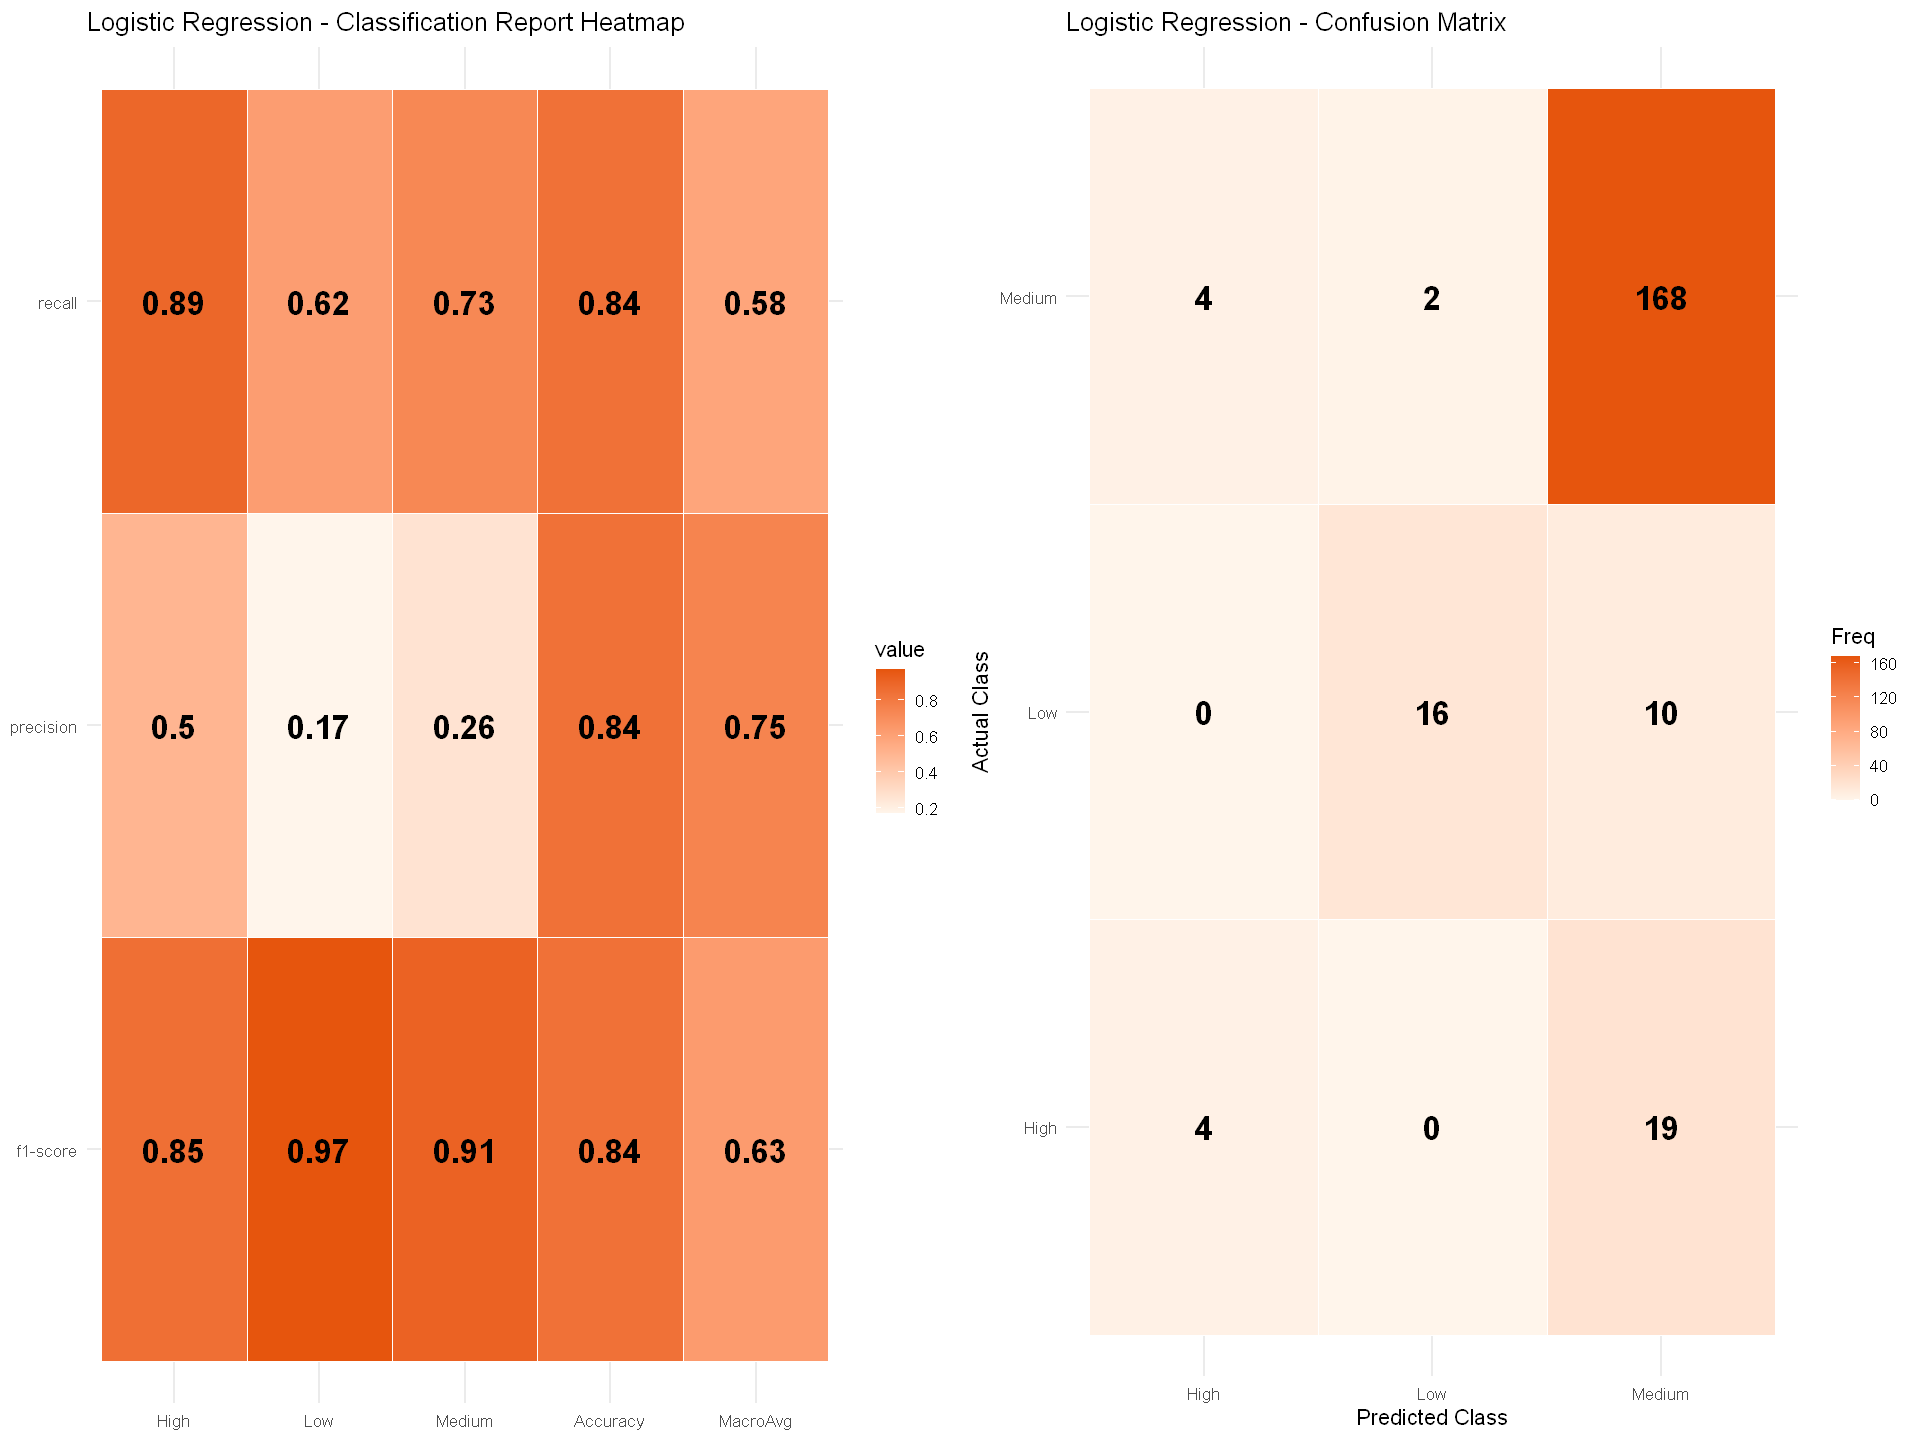

In [72]:
# Logistic Regression heatmaps

plot_classification_summary(log_pred, test_scaled$success_category, model_name = "Logistic Regression")


In [73]:
# Random Forest

rf_model <- train(success_category ~ ., data = train_scaled, method = "rf", trControl = trainControl(method = "cv", number = 5))
rf_pred <- predict(rf_model, test_scaled)

# Confusion matrix
confusionMatrix(rf_pred, test_scaled$success_category)


Confusion Matrix and Statistics

          Reference
Prediction High Low Medium
    High     12   0      4
    Low       0  16      1
    Medium   11  10    169

Overall Statistics
                                          
               Accuracy : 0.8834          
                 95% CI : (0.8338, 0.9224)
    No Information Rate : 0.7803          
    P-Value [Acc > NIR] : 5.168e-05       
                                          
                  Kappa : 0.6344          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: High Class: Low Class: Medium
Sensitivity              0.52174    0.61538        0.9713
Specificity              0.98000    0.99492        0.5714
Pos Pred Value           0.75000    0.94118        0.8895
Neg Pred Value           0.94686    0.95146        0.8485
Prevalence               0.10314    0.11659        0.7803
Detection Rate           0.05381    0.07175        0.7578
Det

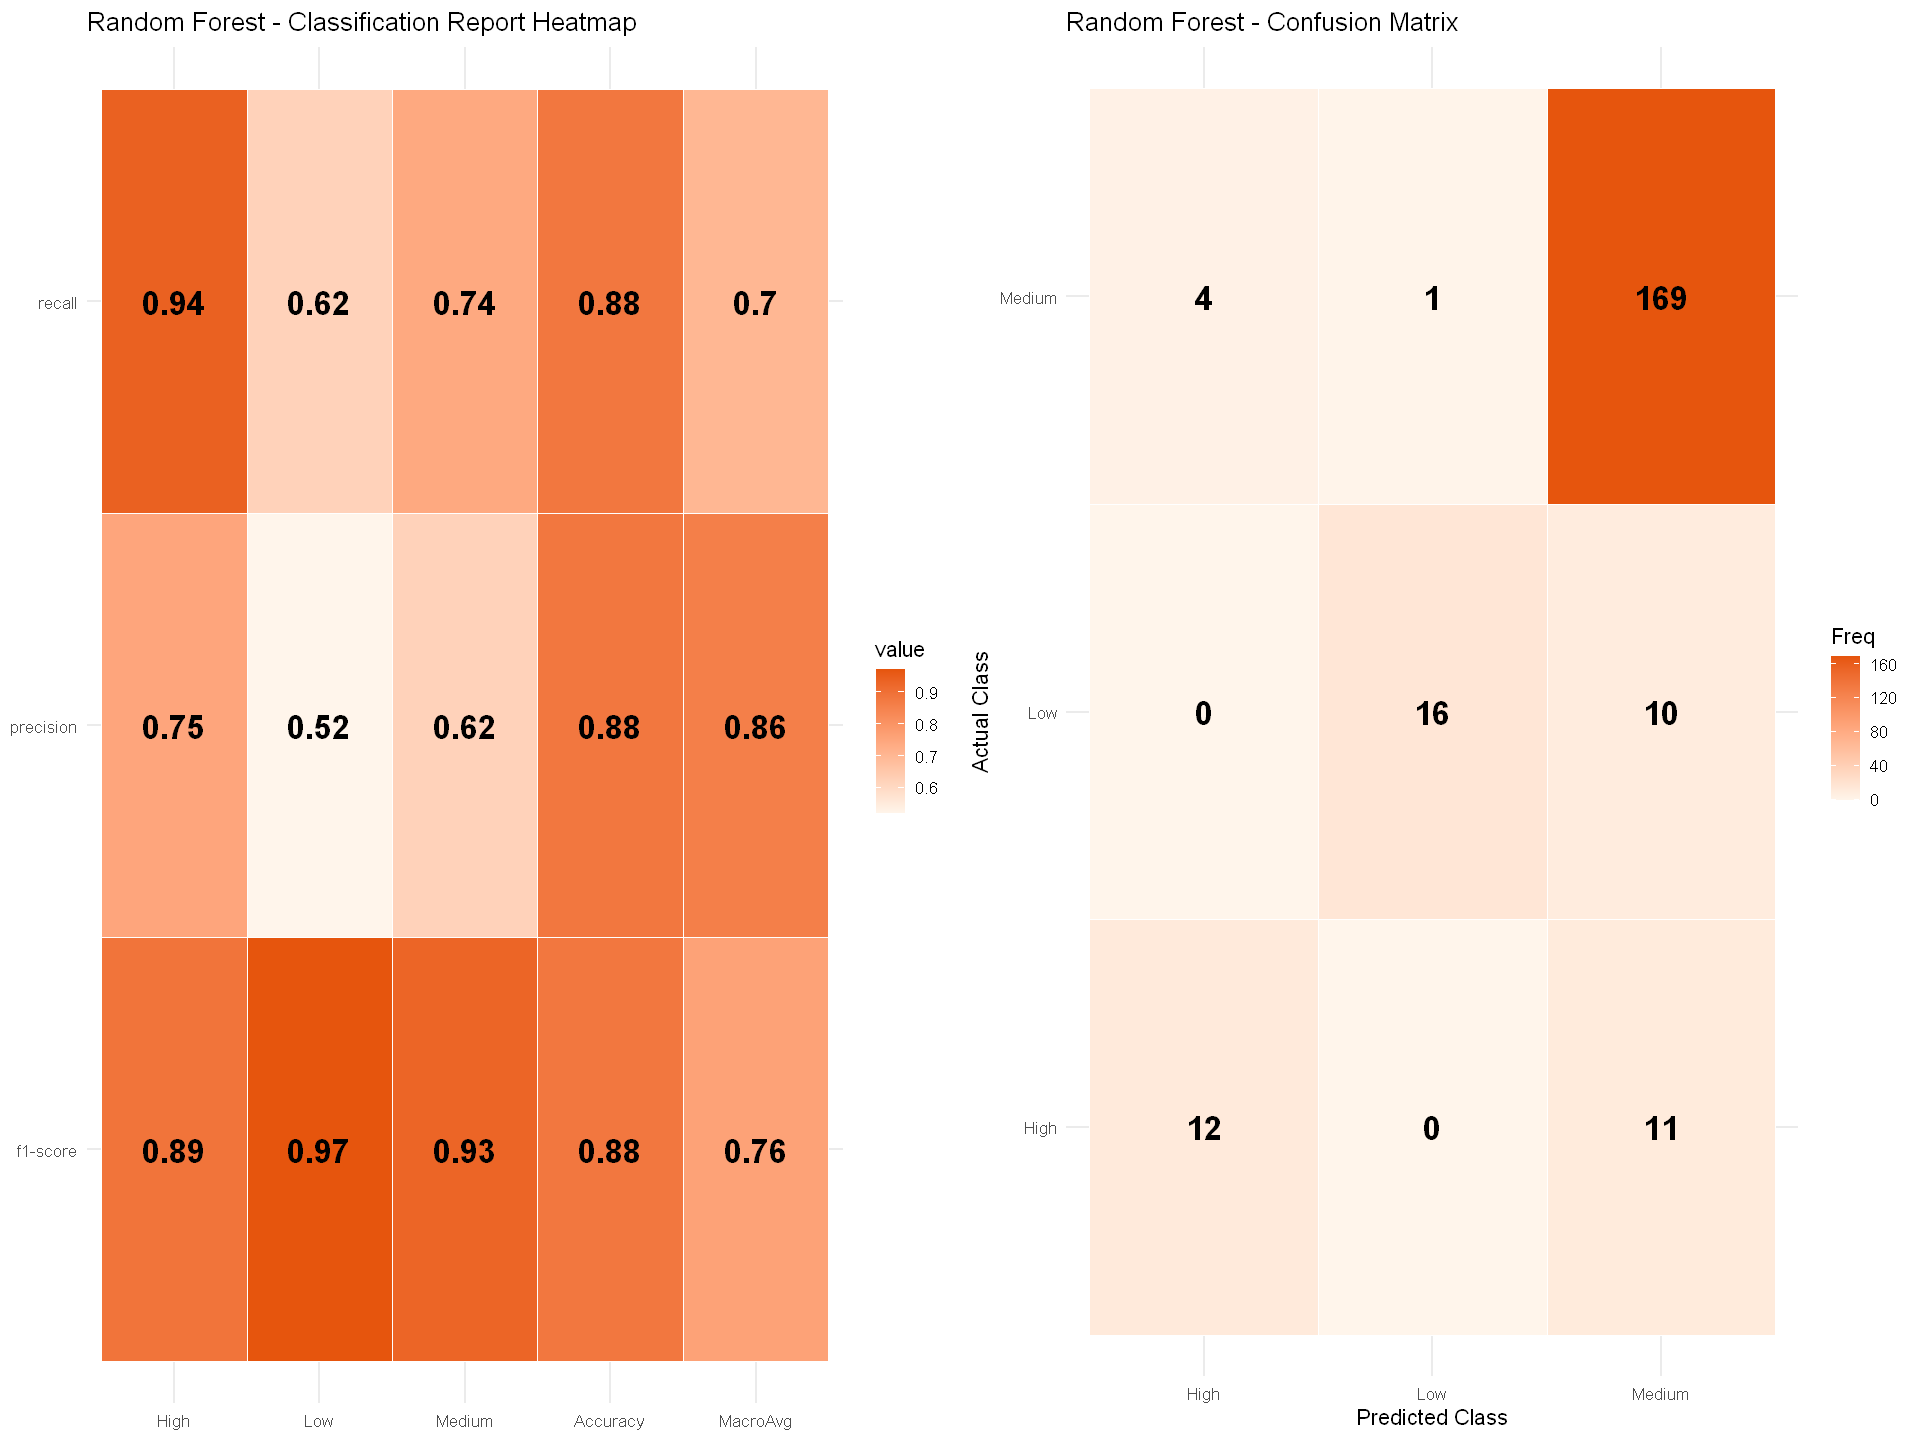

In [74]:
# Random Forest Heatmaps

plot_classification_summary(rf_pred, test_scaled$success_category, model_name = "Random Forest")

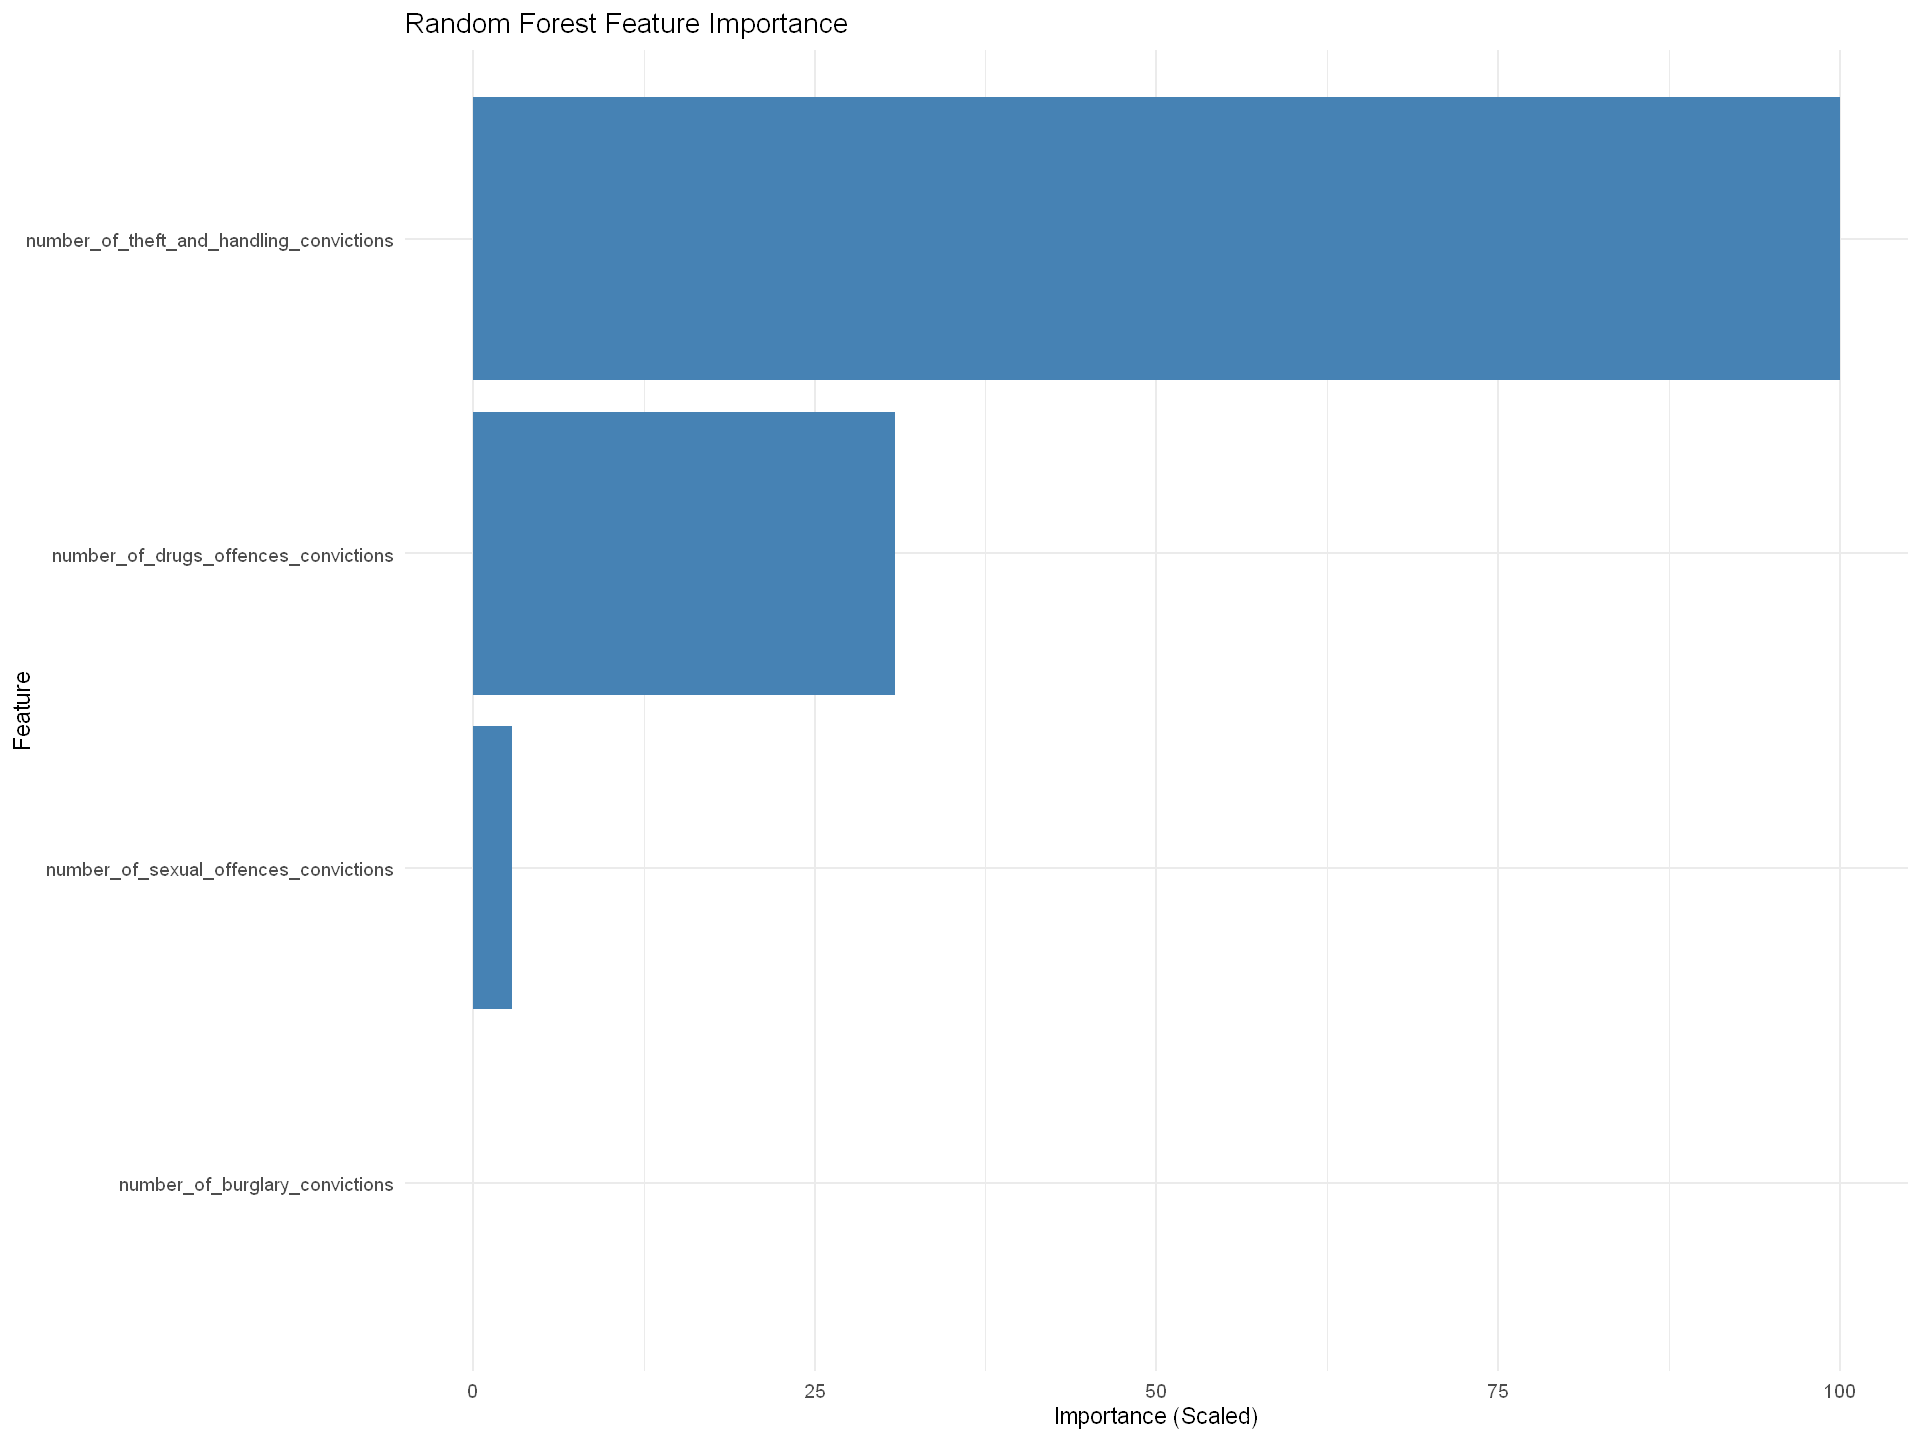

In [75]:
# Feature importance of Random Forest

# Load required libraries
library(caret)
library(ggplot2)

# Extract feature importance from the trained random forest model
rf_importance <- varImp(rf_model, scale = TRUE)

# Convert to data frame for plotting
importance_df <- as.data.frame(rf_importance$importance)
importance_df$Feature <- rownames(importance_df)
importance_df <- importance_df %>%
  arrange(desc(Overall)) %>%
  slice(1:20)  # Top 20 features (adjust if needed)

# Plot the feature importance
ggplot(importance_df, aes(x = reorder(Feature, Overall), y = Overall)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(
    title = "Random Forest Feature Importance",
    x = "Feature",
    y = "Importance (Scaled)"
  ) +
  theme_minimal(base_size = 14)


In [76]:
# Support Vector Machine (SVM)

library(e1071)
library(kernlab)

svm_model <- train(success_category ~ ., data = train_scaled, method = "svmLinear", trControl = trainControl(method = "cv", number = 5))
svm_pred <- predict(svm_model, test_scaled)

# Confusion matrix
confusionMatrix(svm_pred, test_scaled$success_category)



Attaching package: 'kernlab'


The following object is masked from 'package:purrr':

    cross


The following object is masked from 'package:ggplot2':

    alpha




Confusion Matrix and Statistics

          Reference
Prediction High Low Medium
    High      0   0      0
    Low       0  15      1
    Medium   23  11    173

Overall Statistics
                                          
               Accuracy : 0.843           
                 95% CI : (0.7885, 0.8882)
    No Information Rate : 0.7803          
    P-Value [Acc > NIR] : 0.01222         
                                          
                  Kappa : 0.4129          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: High Class: Low Class: Medium
Sensitivity               0.0000    0.57692        0.9943
Specificity               1.0000    0.99492        0.3061
Pos Pred Value               NaN    0.93750        0.8357
Neg Pred Value            0.8969    0.94686        0.9375
Prevalence                0.1031    0.11659        0.7803
Detection Rate            0.0000    0.06726        0.7758
Det

Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_text()`)."


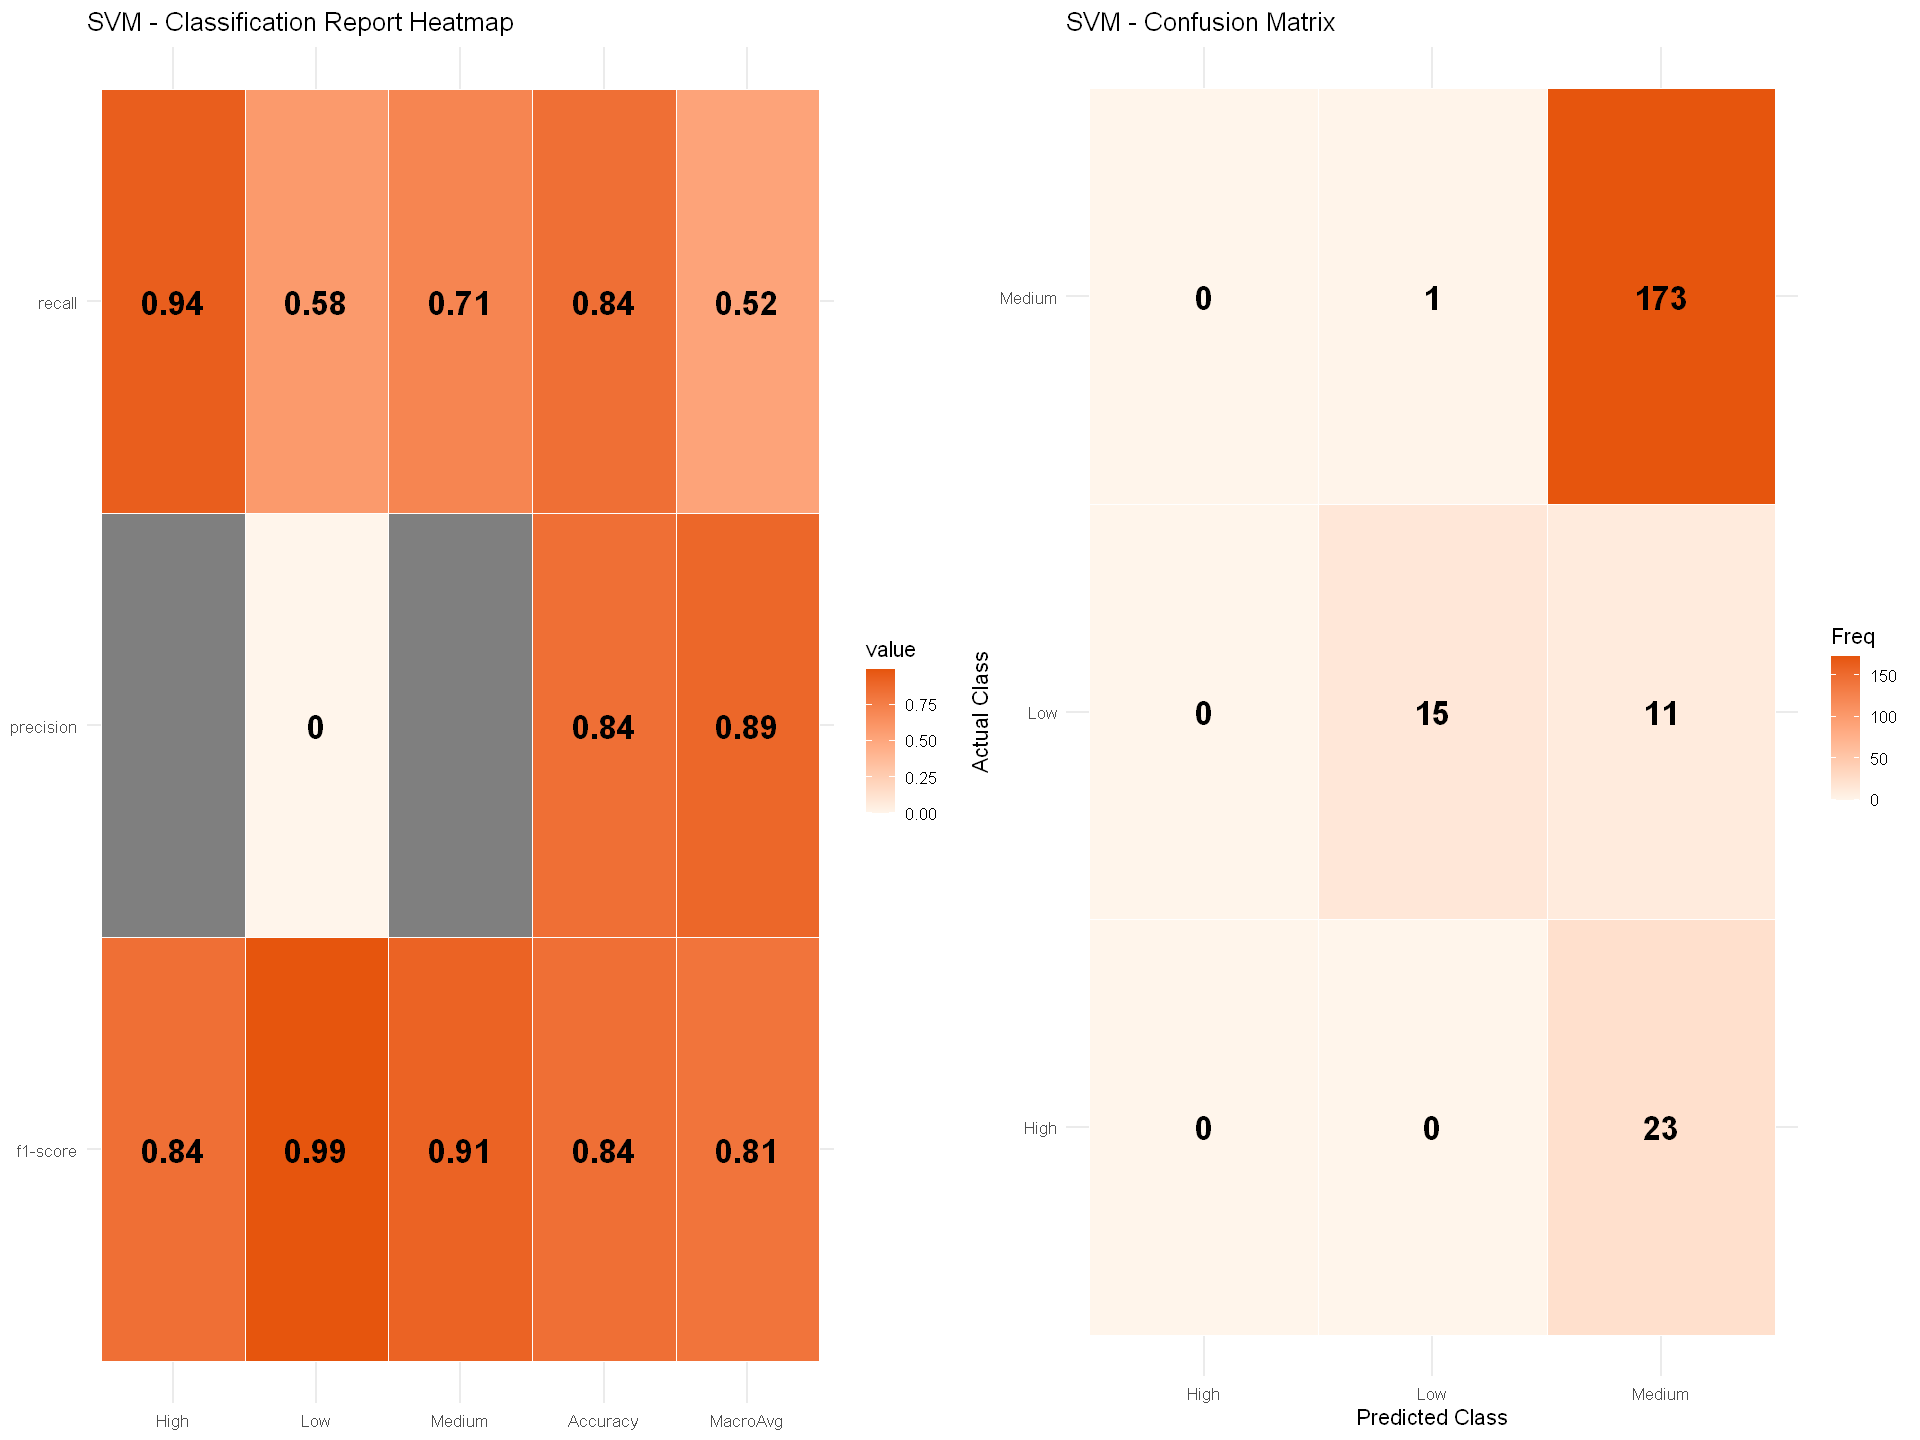

In [77]:
# Support Vector Machine Heatmaps

plot_classification_summary(svm_pred, test_scaled$success_category, model_name = "SVM")


In [78]:
# XGBoost

set.seed(123)
xgb_model <- train(success_category ~ ., data = train_scaled, method = "xgbTree", trControl = trainControl(method = "cv", number = 5))
xgb_pred <- predict(xgb_model, test_scaled)
confusionMatrix(xgb_pred, test_scaled$success_category)


[07:24:16] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[07:24:16] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[07:24:17] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[07:24:17] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[07:24:17] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[07:24:17] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[07:24:18] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[07:24:18] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[07:24:19] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[07:24:19] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is dep

Confusion Matrix and Statistics

          Reference
Prediction High Low Medium
    High     11   1      6
    Low       0  17      2
    Medium   12   8    166

Overall Statistics
                                          
               Accuracy : 0.87            
                 95% CI : (0.8186, 0.9111)
    No Information Rate : 0.7803          
    P-Value [Acc > NIR] : 0.0004427       
                                          
                  Kappa : 0.607           
                                          
 Mcnemar's Test P-Value : 0.0858011       

Statistics by Class:

                     Class: High Class: Low Class: Medium
Sensitivity              0.47826    0.65385        0.9540
Specificity              0.96500    0.98985        0.5918
Pos Pred Value           0.61111    0.89474        0.8925
Neg Pred Value           0.94146    0.95588        0.7838
Prevalence               0.10314    0.11659        0.7803
Detection Rate           0.04933    0.07623        0.7444
Det

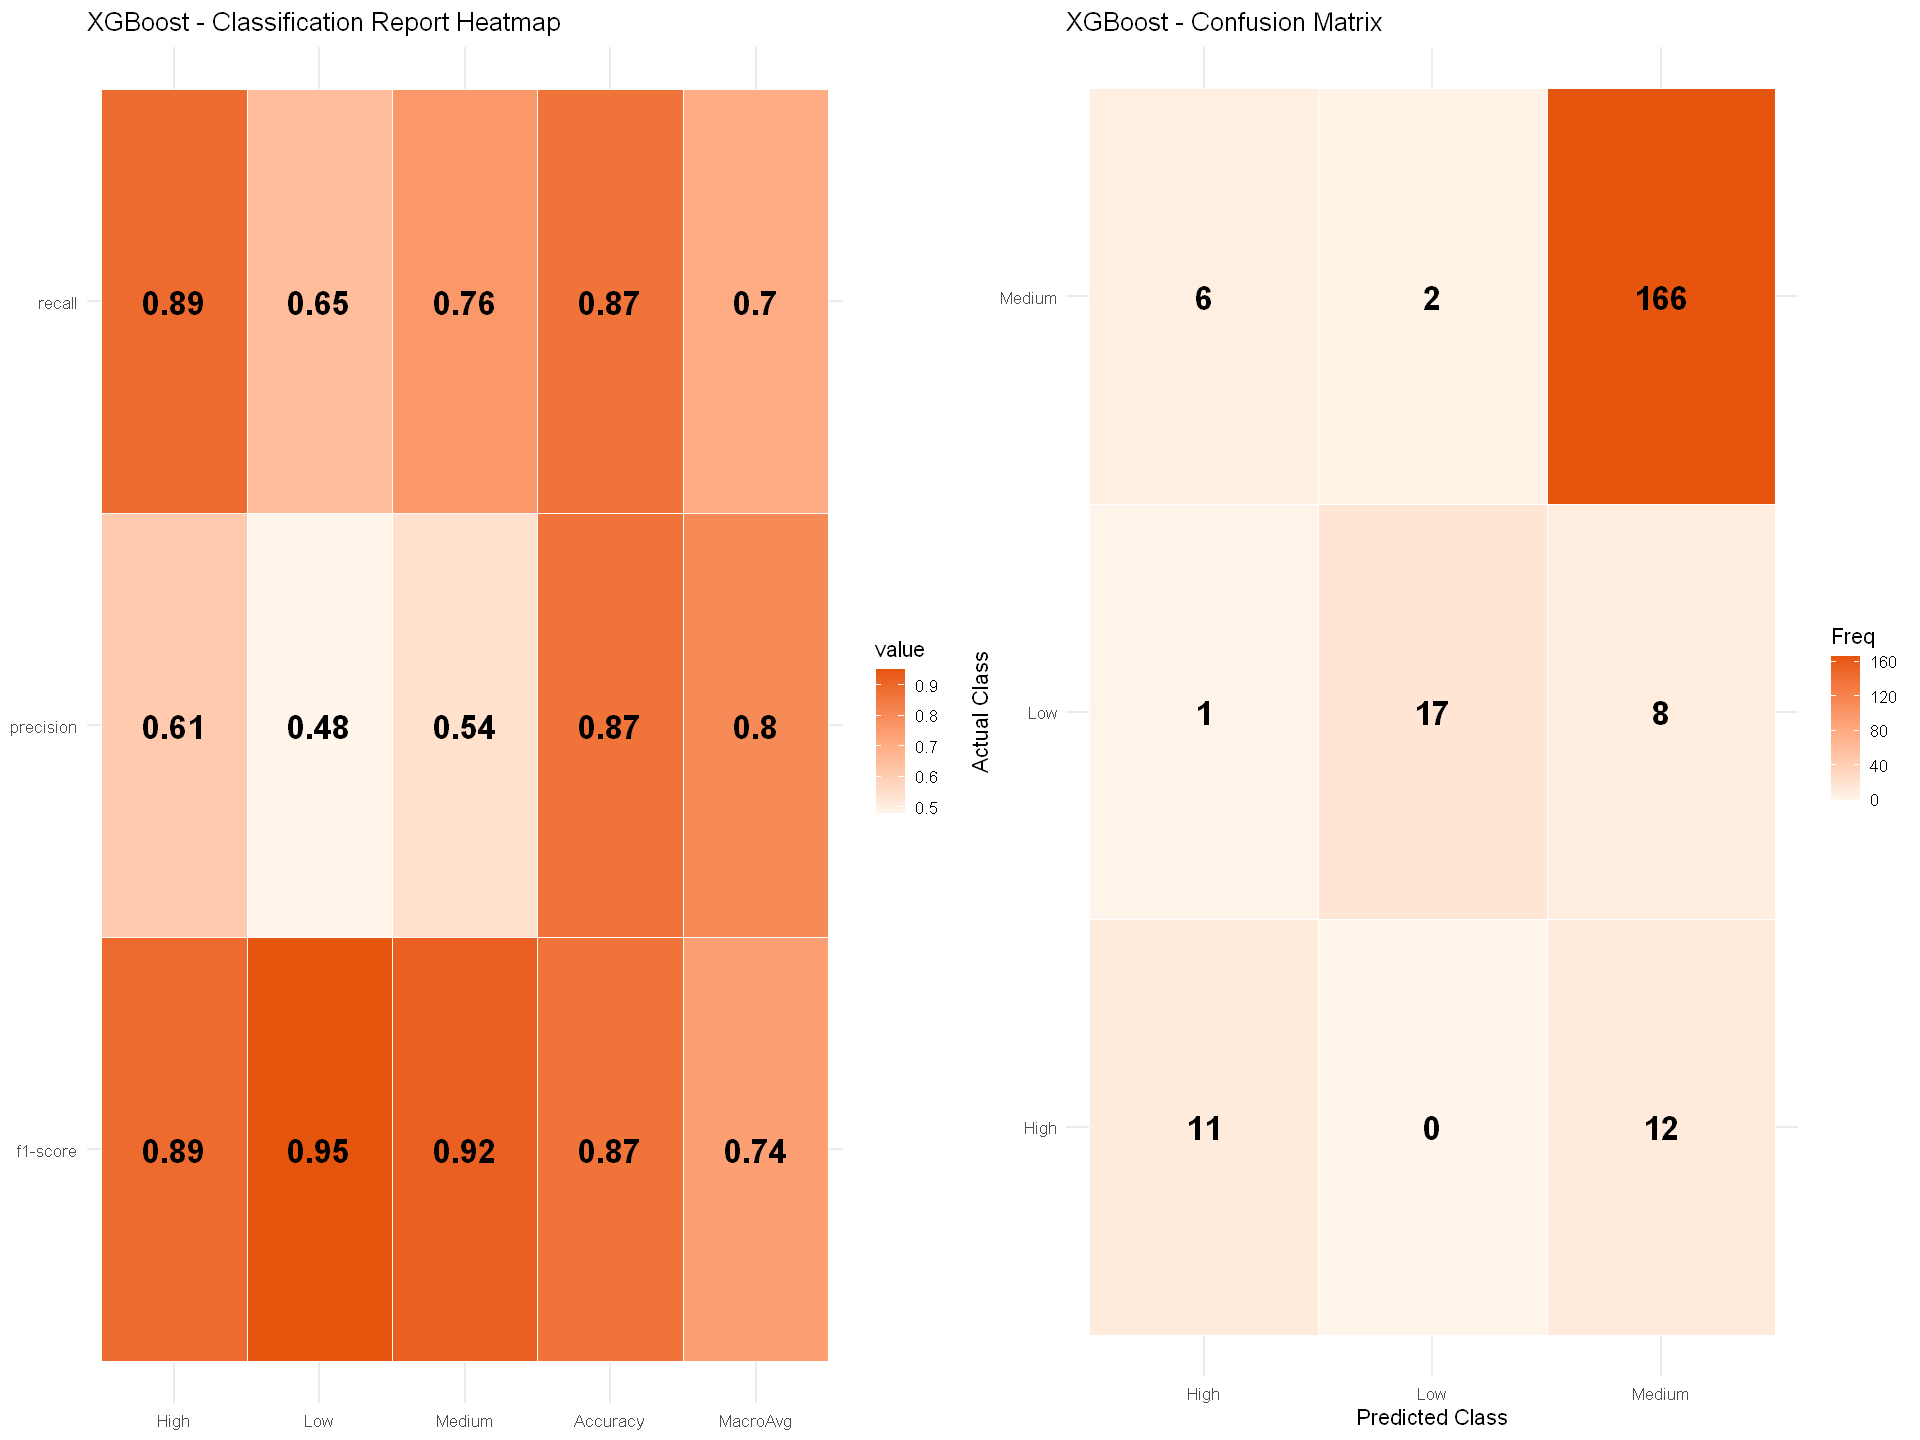

In [79]:
# XGBoost Heatmaps

plot_classification_summary(xgb_pred, test_scaled$success_category, model_name = "XGBoost")